In [3]:
#git clone git@github.com:Megvii-BaseDetection/YOLOX.git
#cd YOLOX
#pip3 install -v -e .  # or  python3 setup.py develop

In [4]:
!pip install --upgrade google-cloud-vision
!pip install --upgrade google-cloud-language

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 383 kB 8.4 MB/s            
     |████████████████████████████████| 46 kB 6.1 MB/s             
     |████████████████████████████████| 114 kB 18.8 MB/s            
     |████████████████████████████████| 211 kB 45.0 MB/s            
     |████████████████████████████████| 4.4 MB 40.3 MB/s            
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.46.1
    Uninstalling grpcio-1.46.1:
      Successfully uninstalled grpcio-1.46.1
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 82 kB 607 kB/s             


Roboflow 툴을 활용하여 직접 labeling 한 데이터 가져와서 폴더에 저장 

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k8EzAFxfxWD1RxqVSzzI")
project = rf.workspace("deep-ksl1a").project("all-luvfv")
dataset = project.version(1).download("voc")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to all-1 in voc:: 100%|██████████| 1909/1909 [00:00<00:00, 3407.80it/s]


# OCR

In [14]:
import os

# Imports Credential File:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "wide-bivouac-345318-5a4b16b06dc4.json"

In [16]:
#!/usr/bin/env python

# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""Outlines document text given an image.
Example:
    python doctext.py resources/text_menu.jpg
"""
# [START vision_document_text_tutorial]
# [START vision_document_text_tutorial_imports]
import argparse
from enum import Enum
import io

from google.cloud import vision
from PIL import Image, ImageDraw
# [END vision_document_text_tutorial_imports]


class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5


def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon(
            [
                bound.vertices[0].x,
                bound.vertices[0].y,
                bound.vertices[1].x,
                bound.vertices[1].y,
                bound.vertices[2].x,
                bound.vertices[2].y,
                bound.vertices[3].x,
                bound.vertices[3].y,
            ],
            None,
            color,
        )
    return image


# [START vision_document_text_tutorial_detect_bounds]
def get_document_bounds(image_file, feature):
    """Returns document bounds given an image."""
    client = vision.ImageAnnotatorClient()

    bounds = []

    with io.open(image_file, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.document_text_detection(image=image)
    document = response.full_text_annotation

    # Collect specified feature bounds by enumerating all document features
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if feature == FeatureType.SYMBOL:
                            bounds.append(symbol.bounding_box)

                    if feature == FeatureType.WORD:
                        bounds.append(word.bounding_box)

                if feature == FeatureType.PARA:
                    bounds.append(paragraph.bounding_box)

            if feature == FeatureType.BLOCK:
                bounds.append(block.bounding_box)

    # The list `bounds` contains the coordinates of the bounding boxes.
    return bounds
# [END vision_document_text_tutorial_detect_bounds]


def render_doc_text(filein, fileout):
    image = Image.open(filein)
    bounds = get_document_bounds(filein, FeatureType.BLOCK)
    draw_boxes(image, bounds, "blue")
    bounds = get_document_bounds(filein, FeatureType.PARA)
    draw_boxes(image, bounds, "red")
    bounds = get_document_bounds(filein, FeatureType.WORD)
    draw_boxes(image, bounds, "yellow")

    if fileout != 0:
        image.save(fileout)
    else:
        image.show()

In [17]:
import csv

filename = "subwaydetection.csv"
f = open(filename,'w', encoding='utf-8-sig', newline='')
writer_csv = csv.writer(f, delimiter=' ')

In [18]:
file_exit_list = os.listdir('OCR/지하철나가는곳_img')
file_transform_list = os.listdir('OCR/지하철갈아타는곳_img')
file_list = os.listdir('OCR/final_test_img')

In [26]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()
AccCNT = 0 

for num in range(len(file_exit_list)):

# The name of the image file to annotate
  file_name = 'OCR/지하철나가는곳_img/{}'.format(file_exit_list[num])

# Loads the image into memory
  with io.open(file_name, 'rb') as image_file:
      content = image_file.read()
        
  image = vision.Image(content=content)

# Performs label detection on the image file
  response_text = client.text_detection(image=image)
  texts = response_text.text_annotations

  textlist = list()

  for text in texts:
      textlist.append(text.description)
        
  Filename = file_exit_list[num]
 
  writer_csv.writerow([Filename, textlist])
    
  if "나가는" in textlist[0]:
    AccCNT += 1 
  else:
    print(Filename,'\n', textlist[0],'\n\n')   

exit190.jpg 
 ROHKE
Alch
cassend
Estou
→ 


exit176.jpg 
 个
張c高
Way out
FREED 


exit116.jpg 
 (28)
He 1
출구
Exit o
******
RECHER
국
34567
8 9 10 11 12 


exit90.jpg 
 謝
Tracks
WE
是天
80
Exit
177
日日
7
个 


exit25.jpg 
 GUER Way Out # 


exit278.jpg 
 *
EFFE
VEETT WELL
sithaiyya s
Exit ] JEEWIF
..... 


exit31.jpg 
 ㅁ
v 


exit207.jpg 
 나오는 곳
한 타는 곳
12
Ma 


exit233.jpg 
 *** 123 ↑
곳
GOOD
DODD
DDDD
Hom 


exit157.jpg 
 C
응암 봉화산
Sungen
1
BAD
FEM
출구 Ext
DEFE
(3) 기
5678
SITE
← NGSAE 


exit156.jpg 
 ↑
2 고척스카이돔 동양미래대학
Gorheck Sky Dome
구로소방서 · 구로성심병원
Guru Fire Station Gun Sung Hospital
Dongyang Mirae University
1-6.
나기
Exit 


exit24.jpg 
 ✓ch
C
pad 


exit152.jpg 
 Exit
나
동원초·중학교
중랑캠핑숲
A
Esche Bixion& ciobloisio A 2 


exit67.jpg 
 17
HAME
2
the
Elch 


exit17.jpg 
 ΕΠΙΤΟ 


exit266.jpg 
 TH
因➔
+244
địch 


exit51.jpg 
 Exit 




ServiceUnavailable: 503 502:Bad Gateway

In [20]:
for num in range(len(file_transform_list)):

# The name of the image file to annotate
  file_name = 'OCR/지하철갈아타는곳_img/{}'.format(file_transform_list[num])

# Loads the image into memory
  with io.open(file_name, 'rb') as image_file:
      content = image_file.read()

  image = vision.Image(content=content)

# Performs label detection on the image file
  response_text = client.text_detection(image=image)
  texts = response_text.text_annotations

  textlist = list()

  for text in texts:
      textlist.append(text.description)
        
  Filename = file_transform_list[num]
 
  writer_csv.writerow([Filename, textlist])

  if "갈아" in textlist[0]:
    AccCNT += 1

In [21]:
print("나가는 곳 img 갯수 :",len(file_exit_list))
print("갈아타는 곳 img 갯수 :",len(file_transform_list))
print("OCR O:",AccCNT)

image_num = len(file_transform_list) + len(file_exit_list)

AccCNT/image_num

나가는 곳 img 갯수 : 284
갈아타는 곳 img 갯수 : 110
OCR O: 359


0.9111675126903553

In [22]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

for num in range(len(file_list)):

# The name of the image file to annotate
  file_name = 'OCR/final_test_img/{}'.format(file_list[num])

# Loads the image into memory
  with io.open(file_name, 'rb') as image_file:
      content = image_file.read()

  image = vision.Image(content=content)

# Performs label detection on the image file
  response_text = client.text_detection(image=image)
  texts = response_text.text_annotations

  textlist = list()
  Filename = file_list[num]

  for text in texts:
      textlist.append(text.description)
        
  render_doc_text(file_name, 'OCR_{}'.format(Filename))
    
  print(Filename,":",textlist[0],'\n')

mix1.jpg : 乘車場
리베이터
ator
위로
+
1
용산(동작)
인천-천안
-
AR
23
신창·동인천(급행)
Sinchang
DongIncheon
新昌
비
빨리베이터
DA
20
^
엘리베이 

mix4.jpg : 나가는 곳
Way out o
힐스테이트 삼송역 힐스몰 스타필드
.
Hillstate Samsong st
Hills Mall
Starfield
엘리베이터
个 

mix6.jpg : INDE
v
V 56 나가는 곳
Exit
AED
클리베이터
타는 곳 판교 경기광주 이천 여주 경강선
Gyeonggang
Tracks U
Pangyo GyeonggiGwangju
Icheon
Yeoju
000
1122
→
138
①
경성산
노티는 곳
Tis
원 경기광주이천여주 

mix3.jpg : 나가는 곳
Way out
出口
n
인천국제공항
Incheon Int'l Airport
CNN· 

mix7.jpg : 기자단 출동
4 통일로방면 광역환승센터
To Tongilo
AreanCam
나가는 곳
은평뉴타운10단지
Enpyeong New Town Apts Comple 10
← 55m
个35m
Exit
오디
지하철 표지판은 어떻게 되어 있을까?
서울시 지하철 안내표지판 알아보기 

mix5.jpg : 8
서울역
파운데
1
사실
갈아타는 곳
Transfer to Line 1
15
리
LE
어하는 

mix2.jpg : - 3호선 갈아타는 곳
TH
사진을
타실때
열차에 타살 때
B1
Battl 



In [15]:
!ls

LICENSE        datasets		   requirements.txt  yolox.egg-info
MANIFEST.in    demo		   setup.cfg	     yolox_s.pth
README.md      docs		   setup.py	     yolox_x.pth.csupload
YOLOX_outputs  exps		   tests
assets	       hubconf.py	   tools
build	       out_train.py.ipynb  yolox


In [2]:
!nvidia-smi

Sat May 21 00:41:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    59W / 149W |      0MiB / 11441MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# YOLOX-s 

In [5]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -o -c ./yolox_s.pth

1
2022-05-21 00:44:49 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./yolox_s.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-05-21 00:44:49 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├───────────────────┼─────────────────

2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.running_var is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark3.0.conv.we

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.running_var is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv2.conv.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv2.bn.w

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_mean in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_mean in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_var in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_var in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv1.conv.weight in checkpoint is torch.Size([128, 128, 1, 1]), while shape of backbone.backbone.dark4.1.m.2.conv1.conv.weight in model is torch.Size([256, 256, 1, 1]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv1.bn.weight in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.2.conv1.bn.weight in mode

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.weight in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.weight in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.bias in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.bias in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.running_mean in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.running_mean in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.running_var in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.running_var in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.bac

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.conv.weight in checkpoint is torch.Size([128, 128, 1, 1]), while shape of backbone.C3_p4.m.0.conv1.conv.weight in model is torch.Size([256, 256, 1, 1]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.bn.weight in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.m.0.conv1.bn.weight in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.bn.bias in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.m.0.conv1.bn.bias in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.bn.running_mean in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.m.0.conv1.bn.running_mean in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv1.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.conv.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.running_var is not in the ckpt. Please double check and see if this is d

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.weight in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.weight in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.bias in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.bias in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.running_mean in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.running_mean in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.running_var in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.running_var in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv2

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.weight in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.weight in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.bias in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.bias in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.running_mean in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.running_mean in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.running_var in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.running_var in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.1.conv.weight in checkpoint is torch.Size([128, 128, 3,

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-21 00:44:55 | INFO     | yolox.core.trainer:155 - init prefetcher, this might take one minute or less...
2022-05-21 00:45:02 | INFO     | yolox.core.trainer:191 - Training start...
2022-05-21 00:45:02 | INFO     | yolox.core.trainer:192 - 
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_r

2022-05-21 00:45:19 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 10/208, mem: 9733Mb, iter_time: 1.633s, data_time: 0.007s, total_loss: 71.7, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 65.7, cls_loss: 2.2, lr: 2.889e-06, size: 416, ETA: 9:25:40
2022-05-21 00:45:43 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 20/208, mem: 9733Mb, iter_time: 2.406s, data_time: 0.009s, total_loss: 81.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 75.3, cls_loss: 2.2, lr: 1.156e-05, size: 544, ETA: 11:39:20
2022-05-21 00:45:53 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 30/208, mem: 9733Mb, iter_time: 1.073s, data_time: 0.008s, total_loss: 24.5, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 18.5, cls_loss: 2.3, lr: 2.600e-05, size: 288, ETA: 9:49:50
2022-05-21 00:46:05 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 40/208, mem: 9733Mb, iter_time: 1.195s, data_time: 0.007s, total_loss: 27.5, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 21.5, cls_loss: 2.2, lr: 4.623e-05, siz

2022-05-21 00:50:58 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 80/208, mem: 9733Mb, iter_time: 1.100s, data_time: 0.009s, total_loss: 10.8, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 5.5, cls_loss: 1.6, lr: 1.250e-03, size: 384, ETA: 7:00:49
2022-05-21 00:51:09 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 90/208, mem: 9733Mb, iter_time: 1.090s, data_time: 0.009s, total_loss: 10.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.6, lr: 1.250e-03, size: 416, ETA: 6:59:00
2022-05-21 00:51:25 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 100/208, mem: 9733Mb, iter_time: 1.567s, data_time: 0.008s, total_loss: 10.8, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 5.6, cls_loss: 1.4, lr: 1.250e-03, size: 544, ETA: 7:02:34
2022-05-21 00:51:38 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 110/208, mem: 9733Mb, iter_time: 1.315s, data_time: 0.009s, total_loss: 10.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 5.3, cls_loss: 1.4, lr: 1.250e-03, size: 

2022-05-21 00:56:44 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 150/208, mem: 9733Mb, iter_time: 0.767s, data_time: 0.011s, total_loss: 9.7, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.9, cls_loss: 1.3, lr: 1.249e-03, size: 320, ETA: 6:55:20
2022-05-21 00:56:52 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 160/208, mem: 9733Mb, iter_time: 0.788s, data_time: 0.009s, total_loss: 10.7, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 5.7, cls_loss: 1.2, lr: 1.249e-03, size: 320, ETA: 6:52:32
2022-05-21 00:57:00 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 170/208, mem: 9733Mb, iter_time: 0.885s, data_time: 0.008s, total_loss: 9.8, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 5.1, cls_loss: 1.3, lr: 1.249e-03, size: 384, ETA: 6:50:22
2022-05-21 00:57:13 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 180/208, mem: 9733Mb, iter_time: 1.210s, data_time: 0.010s, total_loss: 9.9, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 5.2, cls_loss: 1.3, lr: 1.249e-03, size: 5

2022-05-21 01:01:56 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 10/208, mem: 9733Mb, iter_time: 1.464s, data_time: 0.008s, total_loss: 8.9, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.6, cls_loss: 1.0, lr: 1.246e-03, size: 256, ETA: 6:36:38
2022-05-21 01:02:02 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 20/208, mem: 9733Mb, iter_time: 0.660s, data_time: 0.008s, total_loss: 9.7, iou_loss: 3.6, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.1, lr: 1.246e-03, size: 352, ETA: 6:34:21
2022-05-21 01:02:12 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 30/208, mem: 9733Mb, iter_time: 0.999s, data_time: 0.009s, total_loss: 10.0, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 5.7, cls_loss: 1.1, lr: 1.246e-03, size: 512, ETA: 6:33:26
2022-05-21 01:02:25 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 40/208, mem: 9733Mb, iter_time: 1.297s, data_time: 0.009s, total_loss: 9.0, iou_loss: 3.5, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.0, lr: 1.246e-03, size: 384, 

2022-05-21 01:07:08 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 80/208, mem: 9733Mb, iter_time: 0.947s, data_time: 0.009s, total_loss: 9.0, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.1, lr: 1.242e-03, size: 384, ETA: 6:24:37
2022-05-21 01:07:26 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 90/208, mem: 9733Mb, iter_time: 1.802s, data_time: 0.009s, total_loss: 9.4, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.3, lr: 1.242e-03, size: 576, ETA: 6:26:15
2022-05-21 01:07:38 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 100/208, mem: 9733Mb, iter_time: 1.216s, data_time: 0.009s, total_loss: 9.3, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.1, lr: 1.242e-03, size: 448, ETA: 6:26:10
2022-05-21 01:07:55 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 110/208, mem: 9733Mb, iter_time: 1.676s, data_time: 0.009s, total_loss: 9.0, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.8, cls_loss: 0.9, lr: 1.242e-03, size: 544,

2022-05-21 01:12:21 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 150/208, mem: 9733Mb, iter_time: 1.302s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 0.8, lr: 1.236e-03, size: 512, ETA: 6:15:38
2022-05-21 01:12:31 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 160/208, mem: 9733Mb, iter_time: 1.005s, data_time: 0.009s, total_loss: 8.3, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 0.9, lr: 1.236e-03, size: 352, ETA: 6:15:05
2022-05-21 01:12:41 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 170/208, mem: 9733Mb, iter_time: 0.939s, data_time: 0.008s, total_loss: 7.7, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.236e-03, size: 384, ETA: 6:14:23
2022-05-21 01:12:53 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 180/208, mem: 9733Mb, iter_time: 1.268s, data_time: 0.010s, total_loss: 8.6, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 1.0, lr: 1.236e-03, size: 48

2022-05-21 01:17:51 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 10/208, mem: 9733Mb, iter_time: 1.553s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 4.2, cls_loss: 0.9, lr: 1.229e-03, size: 576, ETA: 6:11:06
2022-05-21 01:18:05 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 20/208, mem: 9733Mb, iter_time: 1.372s, data_time: 0.009s, total_loss: 8.3, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 1.1, lr: 1.229e-03, size: 288, ETA: 6:11:18
2022-05-21 01:18:13 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 30/208, mem: 9733Mb, iter_time: 0.794s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.8, cls_loss: 0.9, lr: 1.229e-03, size: 352, ETA: 6:10:25
2022-05-21 01:18:22 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 40/208, mem: 9733Mb, iter_time: 0.924s, data_time: 0.009s, total_loss: 7.8, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.9, cls_loss: 0.9, lr: 1.229e-03, size: 384, E

2022-05-21 01:23:19 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 80/208, mem: 9733Mb, iter_time: 1.058s, data_time: 0.009s, total_loss: 7.5, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.9, lr: 1.221e-03, size: 544, ETA: 6:06:02
2022-05-21 01:23:36 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 90/208, mem: 9733Mb, iter_time: 1.703s, data_time: 0.009s, total_loss: 8.2, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 0.9, lr: 1.221e-03, size: 576, ETA: 6:06:42
2022-05-21 01:23:53 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 100/208, mem: 9733Mb, iter_time: 1.685s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 0.9, lr: 1.220e-03, size: 448, ETA: 6:07:20
2022-05-21 01:24:05 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 110/208, mem: 9733Mb, iter_time: 1.193s, data_time: 0.009s, total_loss: 9.1, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.0, lr: 1.220e-03, size: 

2022-05-21 01:28:03 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 90/208, mem: 9733Mb, iter_time: 0.907s, data_time: 0.008s, total_loss: 7.2, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.8, lr: 1.213e-03, size: 352, ETA: 6:01:53
2022-05-21 01:28:10 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 100/208, mem: 9733Mb, iter_time: 0.727s, data_time: 0.009s, total_loss: 7.4, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.9, lr: 1.213e-03, size: 288, ETA: 6:01:03
2022-05-21 01:28:16 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 110/208, mem: 9733Mb, iter_time: 0.597s, data_time: 0.010s, total_loss: 7.7, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.213e-03, size: 256, ETA: 6:00:04
2022-05-21 01:28:24 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 120/208, mem: 9733Mb, iter_time: 0.785s, data_time: 0.009s, total_loss: 6.9, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.7, lr: 1.212e-03, size:

2022-05-21 01:33:00 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 160/208, mem: 9733Mb, iter_time: 1.442s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 0.9, lr: 1.202e-03, size: 512, ETA: 5:52:42
2022-05-21 01:33:10 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 170/208, mem: 9733Mb, iter_time: 1.039s, data_time: 0.008s, total_loss: 8.5, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.4, cls_loss: 0.9, lr: 1.202e-03, size: 384, ETA: 5:52:22
2022-05-21 01:33:26 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 180/208, mem: 9733Mb, iter_time: 1.630s, data_time: 0.009s, total_loss: 8.5, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 1.0, lr: 1.202e-03, size: 576, ETA: 5:52:46
2022-05-21 01:33:36 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 190/208, mem: 9733Mb, iter_time: 0.944s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.8, lr: 1.201e-03, size

2022-05-21 01:38:24 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 20/208, mem: 9733Mb, iter_time: 0.990s, data_time: 0.008s, total_loss: 7.2, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.8, lr: 1.190e-03, size: 416, ETA: 5:47:31
2022-05-21 01:38:38 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 30/208, mem: 9733Mb, iter_time: 1.388s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.9, cls_loss: 0.8, lr: 1.190e-03, size: 576, ETA: 5:47:35
2022-05-21 01:38:53 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 40/208, mem: 9733Mb, iter_time: 1.564s, data_time: 0.009s, total_loss: 7.4, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.8, lr: 1.189e-03, size: 448, ETA: 5:47:50
2022-05-21 01:39:06 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 50/208, mem: 9733Mb, iter_time: 1.285s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.189e-03, size: 51

2022-05-21 01:43:53 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 90/208, mem: 9733Mb, iter_time: 0.851s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.7, lr: 1.177e-03, size: 416, ETA: 5:42:47
2022-05-21 01:44:05 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 100/208, mem: 9733Mb, iter_time: 1.176s, data_time: 0.009s, total_loss: 7.1, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.8, lr: 1.176e-03, size: 512, ETA: 5:42:37
2022-05-21 01:44:18 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 110/208, mem: 9733Mb, iter_time: 1.286s, data_time: 0.009s, total_loss: 7.6, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 0.8, lr: 1.176e-03, size: 352, ETA: 5:42:33
2022-05-21 01:44:29 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 120/208, mem: 9733Mb, iter_time: 1.063s, data_time: 0.009s, total_loss: 7.5, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.8, lr: 1.175e-03, size:

2022-05-21 01:49:18 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 160/208, mem: 9733Mb, iter_time: 1.800s, data_time: 0.009s, total_loss: 7.8, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 0.7, lr: 1.162e-03, size: 576, ETA: 5:37:30
2022-05-21 01:49:32 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 170/208, mem: 9733Mb, iter_time: 1.384s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.8, lr: 1.161e-03, size: 512, ETA: 5:37:31
2022-05-21 01:49:40 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 180/208, mem: 9733Mb, iter_time: 0.782s, data_time: 0.008s, total_loss: 6.9, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.8, lr: 1.161e-03, size: 320, ETA: 5:36:59
2022-05-21 01:49:47 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 190/208, mem: 9733Mb, iter_time: 0.726s, data_time: 0.009s, total_loss: 7.6, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.8, lr: 1.160e-03, size

2022-05-21 01:54:01 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 20/208, mem: 9733Mb, iter_time: 1.392s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 1.146e-03, size: 576, ETA: 5:28:54
2022-05-21 01:54:18 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 30/208, mem: 9733Mb, iter_time: 1.723s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 1.145e-03, size: 544, ETA: 5:29:11
2022-05-21 01:54:29 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 40/208, mem: 9733Mb, iter_time: 1.103s, data_time: 0.008s, total_loss: 7.4, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.9, lr: 1.144e-03, size: 288, ETA: 5:28:57
2022-05-21 01:54:39 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 50/208, mem: 9733Mb, iter_time: 0.957s, data_time: 0.009s, total_loss: 7.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.7, lr: 1.144e-03, size: 41

2022-05-21 01:59:30 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 90/208, mem: 9733Mb, iter_time: 1.387s, data_time: 0.008s, total_loss: 6.9, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.8, lr: 1.128e-03, size: 384, ETA: 5:24:11
2022-05-21 01:59:39 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 100/208, mem: 9733Mb, iter_time: 0.945s, data_time: 0.010s, total_loss: 6.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.128e-03, size: 352, ETA: 5:23:51
2022-05-21 01:59:50 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 110/208, mem: 9733Mb, iter_time: 1.081s, data_time: 0.009s, total_loss: 6.4, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.127e-03, size: 480, ETA: 5:23:37
2022-05-21 02:00:01 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 120/208, mem: 9733Mb, iter_time: 1.044s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.7, lr: 1.126e-03, size:

2022-05-21 02:04:55 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 160/208, mem: 9733Mb, iter_time: 0.949s, data_time: 0.009s, total_loss: 7.6, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.9, lr: 1.110e-03, size: 416, ETA: 5:19:08
2022-05-21 02:05:07 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 170/208, mem: 9733Mb, iter_time: 1.175s, data_time: 0.009s, total_loss: 6.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.109e-03, size: 512, ETA: 5:18:57
2022-05-21 02:05:21 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 180/208, mem: 9733Mb, iter_time: 1.446s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 1.108e-03, size: 544, ETA: 5:18:58
2022-05-21 02:05:36 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 190/208, mem: 9733Mb, iter_time: 1.487s, data_time: 0.009s, total_loss: 7.4, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 1.0, lr: 1.108e-03, size

2022-05-21 02:09:56 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 180/208, mem: 9733Mb, iter_time: 0.765s, data_time: 0.010s, total_loss: 7.2, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.3, cls_loss: 0.8, lr: 1.094e-03, size: 288, ETA: 5:15:52
2022-05-21 02:10:02 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 190/208, mem: 9733Mb, iter_time: 0.593s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 1.093e-03, size: 256, ETA: 5:15:19
2022-05-21 02:10:19 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 200/208, mem: 9733Mb, iter_time: 1.685s, data_time: 0.008s, total_loss: 6.4, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.092e-03, size: 544, ETA: 5:15:28
2022-05-21 02:10:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:10:27 | INFO     | yolox.core.trainer:203 - ---> start train epoch22
2022-05-21 02:10:39 | INFO     | yolox.core.traine

2022-05-21 02:15:05 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 40/208, mem: 9733Mb, iter_time: 0.630s, data_time: 0.009s, total_loss: 6.4, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.8, lr: 1.073e-03, size: 256, ETA: 5:09:44
2022-05-21 02:15:18 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 50/208, mem: 9733Mb, iter_time: 1.338s, data_time: 0.010s, total_loss: 7.3, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.8, cls_loss: 0.8, lr: 1.072e-03, size: 576, ETA: 5:09:39
2022-05-21 02:15:30 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 60/208, mem: 9733Mb, iter_time: 1.156s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.7, lr: 1.072e-03, size: 288, ETA: 5:09:28
2022-05-21 02:15:37 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 70/208, mem: 9733Mb, iter_time: 0.759s, data_time: 0.009s, total_loss: 7.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.8, lr: 1.071e-03, size: 32

2022-05-21 02:20:42 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 110/208, mem: 9733Mb, iter_time: 1.754s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.051e-03, size: 544, ETA: 5:05:15
2022-05-21 02:20:56 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 120/208, mem: 9733Mb, iter_time: 1.383s, data_time: 0.008s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 1.051e-03, size: 384, ETA: 5:05:11
2022-05-21 02:21:05 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 130/208, mem: 9733Mb, iter_time: 0.882s, data_time: 0.008s, total_loss: 6.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.050e-03, size: 320, ETA: 5:04:51
2022-05-21 02:21:17 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 140/208, mem: 9733Mb, iter_time: 1.188s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.049e-03, size

2022-05-21 02:26:26 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 180/208, mem: 9733Mb, iter_time: 1.679s, data_time: 0.009s, total_loss: 7.4, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.029e-03, size: 544, ETA: 5:01:00
2022-05-21 02:26:43 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 190/208, mem: 9733Mb, iter_time: 1.702s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 1.028e-03, size: 576, ETA: 5:01:05
2022-05-21 02:27:01 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 200/208, mem: 9733Mb, iter_time: 1.776s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.027e-03, size: 544, ETA: 5:01:12
2022-05-21 02:27:14 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:27:17 | INFO     | yolox.core.trainer:203 - ---> start train epoch26
2022-05-21 02:27:30 | INFO     | yolox.core.traine

2022-05-21 02:31:52 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 40/208, mem: 9733Mb, iter_time: 0.817s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 1.005e-03, size: 320, ETA: 4:55:46
2022-05-21 02:32:07 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 50/208, mem: 9733Mb, iter_time: 1.497s, data_time: 0.008s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.005e-03, size: 544, ETA: 4:55:44
2022-05-21 02:32:16 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 60/208, mem: 9733Mb, iter_time: 0.912s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.004e-03, size: 288, ETA: 4:55:26
2022-05-21 02:32:24 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 70/208, mem: 9733Mb, iter_time: 0.770s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.003e-03, size: 32

2022-05-21 02:37:30 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 110/208, mem: 9733Mb, iter_time: 0.910s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 9.810e-04, size: 352, ETA: 4:51:02
2022-05-21 02:37:42 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 120/208, mem: 9733Mb, iter_time: 1.195s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 9.801e-04, size: 512, ETA: 4:50:51
2022-05-21 02:37:51 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 130/208, mem: 9733Mb, iter_time: 0.908s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.8, lr: 9.792e-04, size: 256, ETA: 4:50:33
2022-05-21 02:38:03 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 140/208, mem: 9733Mb, iter_time: 1.242s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 9.783e-04, size

2022-05-21 02:42:56 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 180/208, mem: 9733Mb, iter_time: 0.588s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.557e-04, size: 256, ETA: 4:45:44
2022-05-21 02:43:02 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 190/208, mem: 9733Mb, iter_time: 0.591s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 9.548e-04, size: 256, ETA: 4:45:18
2022-05-21 02:43:11 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 200/208, mem: 9733Mb, iter_time: 0.909s, data_time: 0.009s, total_loss: 7.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.8, lr: 9.539e-04, size: 512, ETA: 4:45:01
2022-05-21 02:43:23 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:43:25 | INFO     | yolox.core.trainer:203 - ---> start train epoch30
2022-05-21 02:43:41 | INFO     | yolox.core.traine

2022-05-21 02:47:13 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:47:14 | INFO     | yolox.core.trainer:203 - ---> start train epoch31
2022-05-21 02:47:33 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 10/208, mem: 9733Mb, iter_time: 1.804s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 9.327e-04, size: 576, ETA: 4:39:43
2022-05-21 02:47:42 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 20/208, mem: 9733Mb, iter_time: 0.907s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 9.318e-04, size: 352, ETA: 4:39:25
2022-05-21 02:47:48 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 30/208, mem: 9733Mb, iter_time: 0.594s, data_time: 0.009s, total_loss: 5.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 9.309e-04, size: 256, ETA: 4:39:01
2022-05-21 02:48:04 | INFO     | yolox.core.trainer:2

2022-05-21 02:52:42 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 70/208, mem: 9733Mb, iter_time: 0.943s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 9.071e-04, size: 384, ETA: 4:34:28
2022-05-21 02:52:54 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 80/208, mem: 9733Mb, iter_time: 1.268s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.6, lr: 9.061e-04, size: 480, ETA: 4:34:19
2022-05-21 02:53:03 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 90/208, mem: 9733Mb, iter_time: 0.897s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 9.052e-04, size: 320, ETA: 4:34:02
2022-05-21 02:53:11 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 100/208, mem: 9733Mb, iter_time: 0.736s, data_time: 0.008s, total_loss: 5.9, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 9.042e-04, size: 2

2022-05-21 02:57:57 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 140/208, mem: 9733Mb, iter_time: 1.294s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 8.799e-04, size: 544, ETA: 4:28:51
2022-05-21 02:58:11 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 150/208, mem: 9733Mb, iter_time: 1.399s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 8.789e-04, size: 448, ETA: 4:28:45
2022-05-21 02:58:20 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 160/208, mem: 9733Mb, iter_time: 0.844s, data_time: 0.009s, total_loss: 6.6, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 8.779e-04, size: 256, ETA: 4:28:27
2022-05-21 02:58:26 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 170/208, mem: 9733Mb, iter_time: 0.679s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 8.769e-04, size

2022-05-21 03:03:24 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 03:03:26 | INFO     | yolox.core.trainer:203 - ---> start train epoch35
2022-05-21 03:03:40 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 10/208, mem: 9733Mb, iter_time: 1.380s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.8, lr: 8.513e-04, size: 480, ETA: 4:23:37
2022-05-21 03:03:52 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 20/208, mem: 9733Mb, iter_time: 1.265s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 8.503e-04, size: 352, ETA: 4:23:28
2022-05-21 03:04:03 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 30/208, mem: 9733Mb, iter_time: 1.063s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 8.493e-04, size: 544, ETA: 4:23:15
2022-05-21 03:04:19 | INFO     | yolox.core.trainer:2

2022-05-21 03:08:56 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 70/208, mem: 9733Mb, iter_time: 0.785s, data_time: 0.009s, total_loss: 5.9, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 8.241e-04, size: 320, ETA: 4:18:38
2022-05-21 03:09:08 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 80/208, mem: 9733Mb, iter_time: 1.121s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 8.231e-04, size: 416, ETA: 4:18:25
2022-05-21 03:09:20 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 90/208, mem: 9733Mb, iter_time: 1.212s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 8.221e-04, size: 448, ETA: 4:18:15
2022-05-21 03:09:27 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 100/208, mem: 9733Mb, iter_time: 0.723s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.8, lr: 8.210e-04, size: 2

2022-05-21 03:13:44 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 140/208, mem: 9733Mb, iter_time: 1.231s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 7.954e-04, size: 480, ETA: 4:12:15
2022-05-21 03:13:53 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 150/208, mem: 9733Mb, iter_time: 0.844s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.8, lr: 7.944e-04, size: 288, ETA: 4:11:59
2022-05-21 03:14:05 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 160/208, mem: 9733Mb, iter_time: 1.240s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.934e-04, size: 480, ETA: 4:11:49
2022-05-21 03:14:19 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 170/208, mem: 9733Mb, iter_time: 1.377s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 7.923e-04, size

2022-05-21 03:19:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 03:19:27 | INFO     | yolox.core.trainer:203 - ---> start train epoch39
2022-05-21 03:19:40 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 10/208, mem: 9733Mb, iter_time: 1.253s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 7.656e-04, size: 416, ETA: 4:07:23
2022-05-21 03:19:49 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 20/208, mem: 9733Mb, iter_time: 0.908s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 7.645e-04, size: 256, ETA: 4:07:07
2022-05-21 03:20:00 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 30/208, mem: 9733Mb, iter_time: 1.078s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 7.635e-04, size: 576, ETA: 4:06:55
2022-05-21 03:20:15 | INFO     | yolox.core.trainer:2

2022-05-21 03:24:54 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 70/208, mem: 9733Mb, iter_time: 1.211s, data_time: 0.010s, total_loss: 4.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 7.373e-04, size: 448, ETA: 4:02:18
2022-05-21 03:25:05 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 80/208, mem: 9733Mb, iter_time: 1.154s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 7.363e-04, size: 288, ETA: 4:02:06
2022-05-21 03:25:14 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 90/208, mem: 9733Mb, iter_time: 0.854s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.9, lr: 7.352e-04, size: 512, ETA: 4:01:50
2022-05-21 03:25:28 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 100/208, mem: 9733Mb, iter_time: 1.444s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 7.342e-04, size: 5

2022-05-21 03:29:23 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 90/208, mem: 9733Mb, iter_time: 0.725s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 7.132e-04, size: 288, ETA: 3:57:34
2022-05-21 03:29:30 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 100/208, mem: 9733Mb, iter_time: 0.723s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 7.121e-04, size: 288, ETA: 3:57:16
2022-05-21 03:29:43 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 110/208, mem: 9733Mb, iter_time: 1.213s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 7.110e-04, size: 448, ETA: 3:57:06
2022-05-21 03:29:55 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 120/208, mem: 9733Mb, iter_time: 1.210s, data_time: 0.008s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 7.100e-04, size:

2022-05-21 03:34:42 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 160/208, mem: 9733Mb, iter_time: 1.529s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 6.836e-04, size: 544, ETA: 3:52:09
2022-05-21 03:34:51 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 170/208, mem: 9733Mb, iter_time: 0.960s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 6.825e-04, size: 320, ETA: 3:51:54
2022-05-21 03:35:04 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 180/208, mem: 9733Mb, iter_time: 1.263s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 6.814e-04, size: 512, ETA: 3:51:45
2022-05-21 03:35:20 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 190/208, mem: 9733Mb, iter_time: 1.619s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 6.804e-04, size

2022-05-21 03:40:07 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 20/208, mem: 9733Mb, iter_time: 0.856s, data_time: 0.009s, total_loss: 6.5, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 6.541e-04, size: 288, ETA: 3:46:56
2022-05-21 03:40:14 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 30/208, mem: 9733Mb, iter_time: 0.722s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 6.530e-04, size: 288, ETA: 3:46:38
2022-05-21 03:40:26 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 40/208, mem: 9733Mb, iter_time: 1.155s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 6.520e-04, size: 576, ETA: 3:46:27
2022-05-21 03:40:39 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 50/208, mem: 9733Mb, iter_time: 1.347s, data_time: 0.010s, total_loss: 6.5, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.7, lr: 6.509e-04, size: 25

2022-05-21 03:45:30 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 90/208, mem: 9733Mb, iter_time: 1.376s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 6.245e-04, size: 480, ETA: 3:41:36
2022-05-21 03:45:43 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 100/208, mem: 9733Mb, iter_time: 1.297s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 6.234e-04, size: 416, ETA: 3:41:26
2022-05-21 03:45:55 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 110/208, mem: 9733Mb, iter_time: 1.249s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 6.223e-04, size: 576, ETA: 3:41:16
2022-05-21 03:46:12 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 120/208, mem: 9733Mb, iter_time: 1.681s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 6.213e-04, size:

2022-05-21 03:50:46 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 160/208, mem: 9733Mb, iter_time: 0.902s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 5.949e-04, size: 352, ETA: 3:36:09
2022-05-21 03:50:55 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 170/208, mem: 9733Mb, iter_time: 0.901s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 5.938e-04, size: 352, ETA: 3:35:55
2022-05-21 03:51:12 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 180/208, mem: 9733Mb, iter_time: 1.680s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.927e-04, size: 544, ETA: 3:35:49
2022-05-21 03:51:29 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 190/208, mem: 9733Mb, iter_time: 1.678s, data_time: 0.008s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 5.917e-04, size

2022-05-21 03:56:00 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 20/208, mem: 9733Mb, iter_time: 1.351s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 5.656e-04, size: 416, ETA: 3:30:43
2022-05-21 03:56:10 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 30/208, mem: 9733Mb, iter_time: 0.996s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 5.646e-04, size: 352, ETA: 3:30:29
2022-05-21 03:56:18 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 40/208, mem: 9733Mb, iter_time: 0.798s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 5.635e-04, size: 288, ETA: 3:30:14
2022-05-21 03:56:28 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 50/208, mem: 9733Mb, iter_time: 0.965s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.625e-04, size: 41

2022-05-21 04:01:15 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 90/208, mem: 9733Mb, iter_time: 1.756s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.364e-04, size: 544, ETA: 3:25:15
2022-05-21 04:01:30 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 100/208, mem: 9733Mb, iter_time: 1.575s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 5.354e-04, size: 512, ETA: 3:25:08
2022-05-21 04:01:41 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 110/208, mem: 9733Mb, iter_time: 1.070s, data_time: 0.008s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 5.343e-04, size: 256, ETA: 3:24:56
2022-05-21 04:01:49 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 120/208, mem: 9733Mb, iter_time: 0.738s, data_time: 0.008s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 5.333e-04, size:

2022-05-21 04:06:16 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 160/208, mem: 9733Mb, iter_time: 0.871s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.8, lr: 5.075e-04, size: 288, ETA: 3:19:35
2022-05-21 04:06:24 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 170/208, mem: 9733Mb, iter_time: 0.808s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 5.065e-04, size: 416, ETA: 3:19:21
2022-05-21 04:06:36 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 180/208, mem: 9733Mb, iter_time: 1.167s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 5.055e-04, size: 512, ETA: 3:19:09
2022-05-21 04:06:49 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 190/208, mem: 9733Mb, iter_time: 1.266s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 5.044e-04, size

2022-05-21 04:10:54 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 180/208, mem: 9733Mb, iter_time: 0.783s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 4.841e-04, size: 320, ETA: 3:15:10
2022-05-21 04:11:02 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 190/208, mem: 9733Mb, iter_time: 0.728s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 4.831e-04, size: 288, ETA: 3:14:54
2022-05-21 04:11:11 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 200/208, mem: 9733Mb, iter_time: 0.906s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 4.821e-04, size: 352, ETA: 3:14:41
2022-05-21 04:11:22 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:11:24 | INFO     | yolox.core.trainer:203 - ---> start train epoch52
2022-05-21 04:11:34 | INFO     | yolox.core.traine

2022-05-21 04:16:22 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 40/208, mem: 9733Mb, iter_time: 1.635s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 4.561e-04, size: 576, ETA: 3:10:00
2022-05-21 04:16:37 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 50/208, mem: 9733Mb, iter_time: 1.531s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 4.551e-04, size: 480, ETA: 3:09:52
2022-05-21 04:16:47 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 60/208, mem: 9733Mb, iter_time: 0.975s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 4.541e-04, size: 288, ETA: 3:09:39
2022-05-21 04:17:01 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 70/208, mem: 9733Mb, iter_time: 1.369s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 4.531e-04, size: 57

2022-05-21 04:21:35 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 110/208, mem: 9733Mb, iter_time: 1.173s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 4.284e-04, size: 352, ETA: 3:04:34
2022-05-21 04:21:47 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 120/208, mem: 9733Mb, iter_time: 1.213s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 4.275e-04, size: 544, ETA: 3:04:23
2022-05-21 04:22:01 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 130/208, mem: 9733Mb, iter_time: 1.371s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 4.265e-04, size: 352, ETA: 3:04:13
2022-05-21 04:22:12 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 140/208, mem: 9733Mb, iter_time: 1.084s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 4.255e-04, size

2022-05-21 04:26:32 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 180/208, mem: 9733Mb, iter_time: 0.988s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 4.013e-04, size: 576, ETA: 2:58:56
2022-05-21 04:26:49 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 190/208, mem: 9733Mb, iter_time: 1.623s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 4.004e-04, size: 352, ETA: 2:58:48
2022-05-21 04:26:59 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 200/208, mem: 9733Mb, iter_time: 1.060s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.6, lr: 3.994e-04, size: 544, ETA: 2:58:36
2022-05-21 04:27:13 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:27:15 | INFO     | yolox.core.trainer:203 - ---> start train epoch56
2022-05-21 04:27:24 | INFO     | yolox.core.traine

2022-05-21 04:31:52 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 40/208, mem: 9733Mb, iter_time: 1.620s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.750e-04, size: 544, ETA: 2:53:39
2022-05-21 04:32:03 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 50/208, mem: 9733Mb, iter_time: 1.093s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 3.741e-04, size: 384, ETA: 2:53:27
2022-05-21 04:32:14 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 60/208, mem: 9733Mb, iter_time: 1.113s, data_time: 0.010s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 3.732e-04, size: 416, ETA: 2:53:16
2022-05-21 04:32:27 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 70/208, mem: 9733Mb, iter_time: 1.326s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.5, lr: 3.722e-04, size: 51

2022-05-21 04:36:45 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 110/208, mem: 9733Mb, iter_time: 1.193s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 3.493e-04, size: 512, ETA: 2:48:01
2022-05-21 04:36:58 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 120/208, mem: 9733Mb, iter_time: 1.384s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.484e-04, size: 512, ETA: 2:47:51
2022-05-21 04:37:10 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 130/208, mem: 9733Mb, iter_time: 1.123s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 3.474e-04, size: 384, ETA: 2:47:40
2022-05-21 04:37:17 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 140/208, mem: 9733Mb, iter_time: 0.737s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 3.465e-04, size

2022-05-21 04:42:17 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 180/208, mem: 9733Mb, iter_time: 0.846s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 3.243e-04, size: 384, ETA: 2:42:53
2022-05-21 04:42:28 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 190/208, mem: 9733Mb, iter_time: 1.022s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 3.234e-04, size: 416, ETA: 2:42:40
2022-05-21 04:42:37 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 200/208, mem: 9733Mb, iter_time: 0.933s, data_time: 0.010s, total_loss: 5.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 3.225e-04, size: 256, ETA: 2:42:27
2022-05-21 04:42:43 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:42:46 | INFO     | yolox.core.trainer:203 - ---> start train epoch60
2022-05-21 04:42:59 | INFO     | yolox.core.traine

2022-05-21 04:46:34 | INFO     | yolox.core.trainer:342 - 
Average forward time: 85.06 ms, Average NMS time: 1.11 ms, Average inference time: 86.17 ms

2022-05-21 04:46:34 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:46:39 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:46:40 | INFO     | yolox.core.trainer:203 - ---> start train epoch61
2022-05-21 04:46:48 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 10/208, mem: 9733Mb, iter_time: 0.788s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 3.028e-04, size: 320, ETA: 2:37:49
2022-05-21 04:46:59 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 20/208, mem: 9733Mb, iter_time: 1.126s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 3.020e-04, size: 416, ETA: 2:37:38
2022-05-21 04:47:08 | INFO     | yolox.core.trainer:2

2022-05-21 04:51:23 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 60/208, mem: 9733Mb, iter_time: 1.348s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.811e-04, size: 480, ETA: 2:32:41
2022-05-21 04:51:31 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 70/208, mem: 9733Mb, iter_time: 0.843s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 2.802e-04, size: 288, ETA: 2:32:28
2022-05-21 04:51:43 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 80/208, mem: 9733Mb, iter_time: 1.219s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 2.794e-04, size: 480, ETA: 2:32:17
2022-05-21 04:51:53 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 90/208, mem: 9733Mb, iter_time: 0.995s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 2.786e-04, size: 35

2022-05-21 04:56:39 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 130/208, mem: 9733Mb, iter_time: 1.528s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 2.585e-04, size: 480, ETA: 2:27:23
2022-05-21 04:56:49 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 140/208, mem: 9733Mb, iter_time: 0.971s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.8, lr: 2.577e-04, size: 288, ETA: 2:27:11
2022-05-21 04:56:56 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 150/208, mem: 9733Mb, iter_time: 0.754s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 2.570e-04, size: 320, ETA: 2:26:57
2022-05-21 04:57:04 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 160/208, mem: 9733Mb, iter_time: 0.786s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 2.562e-04, size

2022-05-21 05:01:36 | INFO     | yolox.core.trainer:261 - epoch: 64/100, iter: 200/208, mem: 9733Mb, iter_time: 0.813s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 2.370e-04, size: 384, ETA: 2:21:55
2022-05-21 05:01:43 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 05:01:45 | INFO     | yolox.core.trainer:203 - ---> start train epoch65
2022-05-21 05:01:53 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 10/208, mem: 9733Mb, iter_time: 0.800s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 2.357e-04, size: 416, ETA: 2:21:31
2022-05-21 05:02:04 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 20/208, mem: 9733Mb, iter_time: 1.083s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.6, lr: 2.349e-04, size: 384, ETA: 2:21:20
2022-05-21 05:02:15 | INFO     | yolox.core.trainer:

2022-05-21 05:07:07 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 60/208, mem: 9733Mb, iter_time: 0.722s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 2.167e-04, size: 288, ETA: 2:16:48
2022-05-21 05:07:18 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 70/208, mem: 9733Mb, iter_time: 1.118s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 2.160e-04, size: 416, ETA: 2:16:37
2022-05-21 05:07:35 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 80/208, mem: 9733Mb, iter_time: 1.681s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 2.152e-04, size: 544, ETA: 2:16:28
2022-05-21 05:07:44 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 90/208, mem: 9733Mb, iter_time: 0.921s, data_time: 0.010s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.145e-04, size: 35

2022-05-21 05:12:26 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 130/208, mem: 9733Mb, iter_time: 1.112s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.973e-04, size: 448, ETA: 2:11:32
2022-05-21 05:12:35 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 140/208, mem: 9733Mb, iter_time: 0.965s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.966e-04, size: 352, ETA: 2:11:20
2022-05-21 05:12:43 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 150/208, mem: 9733Mb, iter_time: 0.811s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.959e-04, size: 320, ETA: 2:11:07
2022-05-21 05:12:50 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 160/208, mem: 9733Mb, iter_time: 0.628s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.952e-04, size

2022-05-21 05:17:49 | INFO     | yolox.core.trainer:261 - epoch: 68/100, iter: 200/208, mem: 9733Mb, iter_time: 1.269s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.790e-04, size: 352, ETA: 2:06:18
2022-05-21 05:17:56 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 05:17:58 | INFO     | yolox.core.trainer:203 - ---> start train epoch69
2022-05-21 05:18:05 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 10/208, mem: 9733Mb, iter_time: 0.671s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.779e-04, size: 256, ETA: 2:05:54
2022-05-21 05:18:12 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 20/208, mem: 9733Mb, iter_time: 0.717s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 1.773e-04, size: 352, ETA: 2:05:41
2022-05-21 05:18:23 | INFO     | yolox.core.trainer:

2022-05-21 05:23:03 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 60/208, mem: 9733Mb, iter_time: 1.225s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.621e-04, size: 288, ETA: 2:01:02
2022-05-21 05:23:10 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 70/208, mem: 9733Mb, iter_time: 0.720s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.615e-04, size: 288, ETA: 2:00:49
2022-05-21 05:23:18 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 80/208, mem: 9733Mb, iter_time: 0.768s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 1.609e-04, size: 384, ETA: 2:00:36
2022-05-21 05:23:29 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 90/208, mem: 9733Mb, iter_time: 1.094s, data_time: 0.009s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.603e-04, size: 54

2022-05-21 05:27:43 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 80/208, mem: 9733Mb, iter_time: 0.950s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.490e-04, size: 384, ETA: 1:56:43
2022-05-21 05:27:52 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 90/208, mem: 9733Mb, iter_time: 0.950s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.485e-04, size: 384, ETA: 1:56:30
2022-05-21 05:28:01 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 100/208, mem: 9733Mb, iter_time: 0.911s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.479e-04, size: 352, ETA: 1:56:18
2022-05-21 05:28:09 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 110/208, mem: 9733Mb, iter_time: 0.783s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.474e-04, size: 

2022-05-21 05:32:39 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 150/208, mem: 9733Mb, iter_time: 0.780s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.342e-04, size: 320, ETA: 1:51:18
2022-05-21 05:32:46 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 160/208, mem: 9733Mb, iter_time: 0.734s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.337e-04, size: 288, ETA: 1:51:05
2022-05-21 05:32:58 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 170/208, mem: 9733Mb, iter_time: 1.112s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.332e-04, size: 448, ETA: 1:50:53
2022-05-21 05:33:06 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 180/208, mem: 9733Mb, iter_time: 0.824s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.7, lr: 1.327e-04, size

2022-05-21 05:38:15 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 10/208, mem: 9733Mb, iter_time: 1.634s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.208e-04, size: 512, ETA: 1:46:11
2022-05-21 05:38:27 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 20/208, mem: 9733Mb, iter_time: 1.146s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.204e-04, size: 320, ETA: 1:46:00
2022-05-21 05:38:35 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 30/208, mem: 9733Mb, iter_time: 0.888s, data_time: 0.010s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.199e-04, size: 384, ETA: 1:45:47
2022-05-21 05:38:44 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 40/208, mem: 9733Mb, iter_time: 0.812s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.195e-04, size: 25

2022-05-21 05:43:50 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 80/208, mem: 9733Mb, iter_time: 0.870s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.087e-04, size: 288, ETA: 1:41:01
2022-05-21 05:43:59 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 90/208, mem: 9733Mb, iter_time: 0.846s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.083e-04, size: 480, ETA: 1:40:48
2022-05-21 05:44:11 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 100/208, mem: 9733Mb, iter_time: 1.237s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.079e-04, size: 320, ETA: 1:40:37
2022-05-21 05:44:19 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 110/208, mem: 9733Mb, iter_time: 0.744s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.075e-04, size: 

2022-05-21 05:49:05 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 150/208, mem: 9733Mb, iter_time: 0.724s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 9.789e-05, size: 288, ETA: 1:35:43
2022-05-21 05:49:23 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 160/208, mem: 9733Mb, iter_time: 1.805s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 9.753e-05, size: 576, ETA: 1:35:34
2022-05-21 05:49:37 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 170/208, mem: 9733Mb, iter_time: 1.344s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 9.717e-05, size: 480, ETA: 1:35:23
2022-05-21 05:49:54 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 180/208, mem: 9733Mb, iter_time: 1.679s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 9.681e-05, size

2022-05-21 05:54:54 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 10/208, mem: 9733Mb, iter_time: 1.031s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 8.856e-05, size: 256, ETA: 1:30:38
2022-05-21 05:55:05 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 20/208, mem: 9733Mb, iter_time: 1.070s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 8.825e-05, size: 512, ETA: 1:30:26
2022-05-21 05:55:18 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 30/208, mem: 9733Mb, iter_time: 1.361s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 8.794e-05, size: 480, ETA: 1:30:16
2022-05-21 05:55:34 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 40/208, mem: 9733Mb, iter_time: 1.545s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 8.763e-05, size: 54

2022-05-21 06:00:21 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 80/208, mem: 9733Mb, iter_time: 0.990s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.058e-05, size: 416, ETA: 1:25:24
2022-05-21 06:00:32 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 90/208, mem: 9733Mb, iter_time: 1.032s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 8.032e-05, size: 352, ETA: 1:25:12
2022-05-21 06:00:41 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 100/208, mem: 9733Mb, iter_time: 0.908s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 8.006e-05, size: 352, ETA: 1:25:00
2022-05-21 06:00:50 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 110/208, mem: 9733Mb, iter_time: 0.924s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.980e-05, size: 

2022-05-21 06:05:26 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 150/208, mem: 9733Mb, iter_time: 1.254s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.403e-05, size: 576, ETA: 1:20:03
2022-05-21 06:05:42 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 160/208, mem: 9733Mb, iter_time: 1.585s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 7.383e-05, size: 288, ETA: 1:19:53
2022-05-21 06:05:50 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 170/208, mem: 9733Mb, iter_time: 0.770s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 7.362e-05, size: 384, ETA: 1:19:40
2022-05-21 06:06:00 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 180/208, mem: 9733Mb, iter_time: 1.036s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 7.341e-05, size

2022-05-21 06:09:40 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 170/208, mem: 9733Mb, iter_time: 0.906s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.975e-05, size: 352, ETA: 1:15:37
2022-05-21 06:09:49 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 180/208, mem: 9733Mb, iter_time: 0.953s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 6.958e-05, size: 384, ETA: 1:15:26
2022-05-21 06:09:55 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 190/208, mem: 9733Mb, iter_time: 0.593s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 6.942e-05, size: 256, ETA: 1:15:13
2022-05-21 06:10:01 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 200/208, mem: 9733Mb, iter_time: 0.587s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 6.926e-05, size

2022-05-21 06:14:32 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 30/208, mem: 9733Mb, iter_time: 1.146s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 6.588e-05, size: 512, ETA: 1:10:18
2022-05-21 06:14:48 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 40/208, mem: 9733Mb, iter_time: 1.637s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.577e-05, size: 576, ETA: 1:10:07
2022-05-21 06:15:02 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 50/208, mem: 9733Mb, iter_time: 1.396s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.566e-05, size: 416, ETA: 1:09:57
2022-05-21 06:15:10 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 60/208, mem: 9733Mb, iter_time: 0.803s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.555e-05, size: 25

2022-05-21 06:19:23 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 100/208, mem: 9733Mb, iter_time: 1.113s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 6.346e-05, size: 384, ETA: 1:04:57
2022-05-21 06:19:33 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 110/208, mem: 9733Mb, iter_time: 0.949s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.340e-05, size: 384, ETA: 1:04:45
2022-05-21 06:19:43 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 120/208, mem: 9733Mb, iter_time: 1.054s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 6.334e-05, size: 448, ETA: 1:04:33
2022-05-21 06:19:58 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 130/208, mem: 9733Mb, iter_time: 1.449s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 6.328e-05, size

2022-05-21 06:24:25 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 160/208, mem: 9733Mb, iter_time: 1.480s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.4, lr: 6.252e-05, size: 288, ETA: 0:59:51
2022-05-21 06:24:32 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 170/208, mem: 9733Mb, iter_time: 0.781s, data_time: 0.010s, total_loss: 2.5, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.251e-05, size: 448, ETA: 0:59:39
2022-05-21 06:24:46 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 180/208, mem: 9733Mb, iter_time: 1.315s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.251e-05, size: 576, ETA: 0:59:28
2022-05-21 06:25:01 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 190/208, mem: 9733Mb, iter_time: 1.553s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.6, conf_loss: 0.7, cls_loss: 0.5, lr: 6.250e-05, size

2022-05-21 06:29:01 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 180/208, mem: 9733Mb, iter_time: 0.903s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.9, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 0:55:32
2022-05-21 06:29:06 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 190/208, mem: 9733Mb, iter_time: 0.541s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 256, ETA: 0:55:20
2022-05-21 06:29:12 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 200/208, mem: 9733Mb, iter_time: 0.541s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.3, lr: 6.250e-05, size: 256, ETA: 0:55:08
2022-05-21 06:29:26 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
100%|##########| 15/15 [00:11<00:00,  1.31it/s]
2022-05-21 06:29:40 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in mai

2022-05-21 06:33:48 | INFO     | yolox.core.trainer:261 - epoch: 87/100, iter: 200/208, mem: 9733Mb, iter_time: 1.129s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 448, ETA: 0:51:15
2022-05-21 06:33:53 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
100%|##########| 15/15 [00:11<00:00,  1.30it/s]
2022-05-21 06:34:07 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.7911
AP for elevator = 0.8669
AP for toilet = 0.8933
Mean AP = 0.8504
~~~~~~~~
Results:
0.791
0.867
0.893
0.850
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for y

100%|##########| 15/15 [00:11<00:00,  1.29it/s]
2022-05-21 06:38:23 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.7918
AP for elevator = 0.8689
AP for toilet = 0.8933
Mean AP = 0.8513
~~~~~~~~
Results:
0.792
0.869
0.893
0.851
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.5554640778346971
map_50: 0.85130527750

Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.5606551805062155
map_50: 0.8509369990742343
--------------------------------------------------------------
2022-05-21 06:42:23 | INFO     | yolox.core.trainer:342 - 
Average forward time: 85.06 ms, Average NMS time: 1.10 ms, Average inference time: 86.16 ms

2022-05-21 06:42:23 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 06:42:27 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 06:42:29 | INFO     | yolox.core.trainer:203 - ---> start train epoch90
2022-05-21 06:42:44 | INFO     | yolox.core.trainer:261 - epoch: 90/100, iter: 10/208, mem: 9733Mb, iter_time: 1.519s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:43:

2022-05-21 06:46:40 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 06:46:41 | INFO     | yolox.core.trainer:203 - ---> start train epoch91
2022-05-21 06:46:55 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 10/208, mem: 9733Mb, iter_time: 1.347s, data_time: 0.009s, total_loss: 1.6, iou_loss: 0.8, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 0:39:04
2022-05-21 06:47:09 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 20/208, mem: 9733Mb, iter_time: 1.388s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:38:53
2022-05-21 06:47:14 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 30/208, mem: 9733Mb, iter_time: 0.546s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 0:38:41
2022-05-21 06:47:23 | INFO     | yolox.core.trainer:2

2022-05-21 06:51:09 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 20/208, mem: 9733Mb, iter_time: 0.822s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:34:56
2022-05-21 06:51:25 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 30/208, mem: 9733Mb, iter_time: 1.616s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 576, ETA: 0:34:45
2022-05-21 06:51:36 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 40/208, mem: 9733Mb, iter_time: 1.081s, data_time: 0.010s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:34:34
2022-05-21 06:51:42 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 50/208, mem: 9733Mb, iter_time: 0.620s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 25

2022-05-21 06:56:11 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 40/208, mem: 9733Mb, iter_time: 1.065s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 448, ETA: 0:30:40
2022-05-21 06:56:20 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 50/208, mem: 9733Mb, iter_time: 0.889s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 0:30:29
2022-05-21 06:56:27 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 60/208, mem: 9733Mb, iter_time: 0.680s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.6, l1_loss: 0.7, conf_loss: 0.8, cls_loss: 0.5, lr: 6.250e-05, size: 288, ETA: 0:30:17
2022-05-21 06:56:36 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 70/208, mem: 9733Mb, iter_time: 0.930s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 41

2022-05-21 07:00:22 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 60/208, mem: 9733Mb, iter_time: 1.681s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:26:20
2022-05-21 07:00:36 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 70/208, mem: 9733Mb, iter_time: 1.372s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:26:09
2022-05-21 07:00:44 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 80/208, mem: 9733Mb, iter_time: 0.836s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:25:57
2022-05-21 07:00:53 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 90/208, mem: 9733Mb, iter_time: 0.923s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 44

2022-05-21 07:05:06 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 80/208, mem: 9733Mb, iter_time: 1.289s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 0:22:02
2022-05-21 07:05:14 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 90/208, mem: 9733Mb, iter_time: 0.870s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 320, ETA: 0:21:51
2022-05-21 07:05:23 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 100/208, mem: 9733Mb, iter_time: 0.857s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.6, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 480, ETA: 0:21:39
2022-05-21 07:05:37 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 110/208, mem: 9733Mb, iter_time: 1.352s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.2, l1_loss: 0.5, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 

2022-05-21 07:09:44 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 100/208, mem: 9733Mb, iter_time: 0.679s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 288, ETA: 0:17:44
2022-05-21 07:09:57 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 110/208, mem: 9733Mb, iter_time: 1.387s, data_time: 0.009s, total_loss: 1.7, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 512, ETA: 0:17:33
2022-05-21 07:10:11 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 120/208, mem: 9733Mb, iter_time: 1.391s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 512, ETA: 0:17:22
2022-05-21 07:10:19 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 130/208, mem: 9733Mb, iter_time: 0.736s, data_time: 0.008s, total_loss: 1.8, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:14:05 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 120/208, mem: 9733Mb, iter_time: 0.709s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 0:13:25
2022-05-21 07:14:12 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 130/208, mem: 9733Mb, iter_time: 0.698s, data_time: 0.010s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 320, ETA: 0:13:14
2022-05-21 07:14:24 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 140/208, mem: 9733Mb, iter_time: 1.218s, data_time: 0.008s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 0:13:03
2022-05-21 07:14:34 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 150/208, mem: 9733Mb, iter_time: 0.984s, data_time: 0.009s, total_loss: 1.8, iou_loss: 0.8, l1_loss: 0.2, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:18:45 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 140/208, mem: 9733Mb, iter_time: 0.764s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 0:09:07
2022-05-21 07:18:56 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 150/208, mem: 9733Mb, iter_time: 1.048s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:08:56
2022-05-21 07:19:10 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 160/208, mem: 9733Mb, iter_time: 1.370s, data_time: 0.009s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 0:08:45
2022-05-21 07:19:23 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 170/208, mem: 9733Mb, iter_time: 1.368s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:23:38 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 160/208, mem: 9733Mb, iter_time: 0.808s, data_time: 0.008s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:04:49
2022-05-21 07:23:45 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 170/208, mem: 9733Mb, iter_time: 0.787s, data_time: 0.009s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.2, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:04:38
2022-05-21 07:23:54 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 180/208, mem: 9733Mb, iter_time: 0.809s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:04:27
2022-05-21 07:24:03 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 190/208, mem: 9733Mb, iter_time: 0.923s, data_time: 0.008s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:28:02 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 180/208, mem: 9733Mb, iter_time: 0.893s, data_time: 0.010s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:00:31
2022-05-21 07:28:11 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 190/208, mem: 9733Mb, iter_time: 0.823s, data_time: 0.008s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 288, ETA: 0:00:20
2022-05-21 07:28:18 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 200/208, mem: 9733Mb, iter_time: 0.782s, data_time: 0.009s, total_loss: 1.6, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 448, ETA: 0:00:09
2022-05-21 07:28:28 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
100%|##########| 15/15 [00:11<00:00,  1.31it/s]
2022-05-21 07:28:42 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in 

In [ ]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -o -c ./YOLOX_outputs/yolox_s_work_dir/epoch_90_ckpt.pth --resume -e 91 -expn yolox_work_dir

1
2022-05-30 11:09:36 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./YOLOX_outputs/yolox_work_dir/epoch_90_ckpt.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_work_dir', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=True, start_epoch=91)
2022-05-30 11:09:36 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├──

2022-05-30 11:10:08 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 10/333, mem: 9379Mb, iter_time: 1.748s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.863e-04, size: 416, ETA: 17:46:47
2022-05-30 11:10:20 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 20/333, mem: 9379Mb, iter_time: 1.224s, data_time: 0.007s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.860e-04, size: 320, ETA: 15:06:31
2022-05-30 11:10:38 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 30/333, mem: 9379Mb, iter_time: 1.805s, data_time: 0.007s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.857e-04, size: 448, ETA: 16:11:18
2022-05-30 11:10:46 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 40/333, mem: 9379Mb, iter_time: 0.821s, data_time: 0.007s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.854e-04, size:

2022-05-30 11:16:20 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 290/333, mem: 9379Mb, iter_time: 1.924s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.778e-04, size: 576, ETA: 13:33:27
2022-05-30 11:16:34 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 300/333, mem: 9379Mb, iter_time: 1.456s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 6.775e-04, size: 480, ETA: 13:35:31
2022-05-30 11:16:52 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 310/333, mem: 9379Mb, iter_time: 1.791s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.772e-04, size: 544, ETA: 13:43:58
2022-05-30 11:16:59 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 320/333, mem: 9379Mb, iter_time: 0.615s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.769e-04, s

2022-05-30 11:22:02 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 230/333, mem: 9379Mb, iter_time: 1.509s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.695e-04, size: 512, ETA: 12:57:59
2022-05-30 11:22:15 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 240/333, mem: 9379Mb, iter_time: 1.316s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.692e-04, size: 352, ETA: 12:58:00
2022-05-30 11:22:26 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 250/333, mem: 9379Mb, iter_time: 1.079s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.689e-04, size: 448, ETA: 12:55:34
2022-05-30 11:22:41 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 260/333, mem: 9379Mb, iter_time: 1.476s, data_time: 0.010s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.686e-04, s

2022-05-30 11:27:34 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 170/333, mem: 9379Mb, iter_time: 1.015s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.612e-04, size: 448, ETA: 12:34:43
2022-05-30 11:27:46 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 180/333, mem: 9379Mb, iter_time: 1.229s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.609e-04, size: 416, ETA: 12:34:15
2022-05-30 11:27:56 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 190/333, mem: 9379Mb, iter_time: 1.043s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 6.606e-04, size: 352, ETA: 12:32:30
2022-05-30 11:28:07 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 200/333, mem: 9379Mb, iter_time: 1.099s, data_time: 0.010s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 6.603e-04, s

2022-05-30 11:33:02 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 110/333, mem: 9379Mb, iter_time: 1.733s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.529e-04, size: 544, ETA: 12:18:17
2022-05-30 11:33:12 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 120/333, mem: 9379Mb, iter_time: 1.078s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.526e-04, size: 384, ETA: 12:17:11
2022-05-30 11:33:25 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 130/333, mem: 9379Mb, iter_time: 1.255s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 6.523e-04, size: 448, ETA: 12:17:01
2022-05-30 11:33:38 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 140/333, mem: 9379Mb, iter_time: 1.308s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.520e-04, s

2022-05-30 11:38:58 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 50/333, mem: 9379Mb, iter_time: 0.967s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.446e-04, size: 352, ETA: 12:18:00
2022-05-30 11:39:09 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 60/333, mem: 9379Mb, iter_time: 1.111s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.443e-04, size: 544, ETA: 12:17:11
2022-05-30 11:39:25 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 70/333, mem: 9379Mb, iter_time: 1.674s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.440e-04, size: 448, ETA: 12:18:44
2022-05-30 11:39:38 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 80/333, mem: 9379Mb, iter_time: 1.212s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 6.437e-04, size:

2022-05-30 11:44:52 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 330/333, mem: 9379Mb, iter_time: 0.685s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.361e-04, size: 384, ETA: 12:13:08
2022-05-30 11:44:55 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_work_dir
2022-05-30 11:44:58 | INFO     | yolox.core.trainer:203 - ---> start train epoch96
2022-05-30 11:45:12 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 10/333, mem: 9379Mb, iter_time: 1.455s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.357e-04, size: 576, ETA: 12:13:16
2022-05-30 11:45:31 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 20/333, mem: 9379Mb, iter_time: 1.851s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.354e-04, size: 544, ETA: 12:15:07
2022-05-30 11:45:46 | INFO     | yolox.core.tr

2022-05-30 11:50:26 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 270/333, mem: 9379Mb, iter_time: 1.362s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.278e-04, size: 352, ETA: 12:03:47
2022-05-30 11:50:36 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 280/333, mem: 9379Mb, iter_time: 0.956s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.275e-04, size: 352, ETA: 12:02:42
2022-05-30 11:50:44 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 290/333, mem: 9379Mb, iter_time: 0.842s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.272e-04, size: 288, ETA: 12:01:17
2022-05-30 11:50:51 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 300/333, mem: 9379Mb, iter_time: 0.673s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.269e-04, s

2022-05-30 11:54:58 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 210/333, mem: 9379Mb, iter_time: 0.882s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.195e-04, size: 320, ETA: 11:39:07
2022-05-30 11:55:06 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 220/333, mem: 9379Mb, iter_time: 0.815s, data_time: 0.008s, total_loss: 3.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.192e-04, size: 320, ETA: 11:37:52
2022-05-30 11:55:22 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 230/333, mem: 9379Mb, iter_time: 1.585s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.189e-04, size: 544, ETA: 11:38:37
2022-05-30 11:55:37 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 240/333, mem: 9379Mb, iter_time: 1.493s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.186e-04, s

2022-05-30 12:00:12 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 150/333, mem: 9379Mb, iter_time: 1.683s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.112e-04, size: 320, ETA: 11:28:51
2022-05-30 12:00:22 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 160/333, mem: 9379Mb, iter_time: 0.926s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 6.109e-04, size: 576, ETA: 11:28:00
2022-05-30 12:00:40 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 170/333, mem: 9379Mb, iter_time: 1.824s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.106e-04, size: 320, ETA: 11:29:11
2022-05-30 12:00:49 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 180/333, mem: 9379Mb, iter_time: 0.907s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.103e-04, s

2022-05-30 12:06:04 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 90/333, mem: 9379Mb, iter_time: 0.856s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.029e-04, size: 384, ETA: 11:27:10
2022-05-30 12:06:16 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 100/333, mem: 9379Mb, iter_time: 1.197s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.026e-04, size: 512, ETA: 11:26:55
2022-05-30 12:06:29 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 110/333, mem: 9379Mb, iter_time: 1.292s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.023e-04, size: 384, ETA: 11:26:52
2022-05-30 12:06:40 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 120/333, mem: 9379Mb, iter_time: 1.125s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.020e-04, si

2022-05-30 12:11:25 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 30/333, mem: 9379Mb, iter_time: 1.003s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 5.946e-04, size: 256, ETA: 11:19:04
2022-05-30 12:11:40 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 40/333, mem: 9379Mb, iter_time: 1.526s, data_time: 0.010s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.943e-04, size: 576, ETA: 11:19:27
2022-05-30 12:11:55 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 50/333, mem: 9379Mb, iter_time: 1.462s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 5.940e-04, size: 448, ETA: 11:19:42
2022-05-30 12:12:09 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 60/333, mem: 9379Mb, iter_time: 1.407s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.937e-04, s

2022-05-30 12:17:04 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 310/333, mem: 9379Mb, iter_time: 0.615s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.862e-04, size: 256, ETA: 11:13:15
2022-05-30 12:17:18 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 320/333, mem: 9379Mb, iter_time: 1.433s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.858e-04, size: 544, ETA: 11:13:26
2022-05-30 12:17:32 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 330/333, mem: 9379Mb, iter_time: 1.363s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.855e-04, size: 416, ETA: 11:13:28
2022-05-30 12:17:36 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_work_dir
100%|##########| 22/22 [00:22<00:00,  1.01s/it]
2022-05-30 12:18:00 | INFO     | yolox.evaluators.voc_evaluator:160 - Evalua

2022-05-30 12:21:14 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 160/333, mem: 9379Mb, iter_time: 0.758s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.806e-04, size: 288, ETA: 11:08:53
2022-05-30 12:21:33 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 170/333, mem: 9379Mb, iter_time: 1.918s, data_time: 0.009s, total_loss: 4.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 5.803e-04, size: 576, ETA: 11:09:48
2022-05-30 12:21:46 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 180/333, mem: 9379Mb, iter_time: 1.304s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.800e-04, size: 448, ETA: 11:09:45
2022-05-30 12:21:56 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 190/333, mem: 9379Mb, iter_time: 0.970s, data_time: 0.007s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.797e-0

2022-05-30 12:27:10 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 100/333, mem: 9379Mb, iter_time: 1.054s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.724e-04, size: 448, ETA: 11:06:46
2022-05-30 12:27:22 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 110/333, mem: 9379Mb, iter_time: 1.126s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.721e-04, size: 288, ETA: 11:06:26
2022-05-30 12:27:33 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 120/333, mem: 9379Mb, iter_time: 1.110s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 5.718e-04, size: 576, ETA: 11:06:04
2022-05-30 12:27:48 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 130/333, mem: 9379Mb, iter_time: 1.533s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.715e-0

2022-05-30 12:32:44 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 40/333, mem: 9379Mb, iter_time: 1.295s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 5.642e-04, size: 448, ETA: 11:01:03
2022-05-30 12:32:57 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 50/333, mem: 9379Mb, iter_time: 1.286s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 5.639e-04, size: 448, ETA: 11:00:57
2022-05-30 12:33:07 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 60/333, mem: 9379Mb, iter_time: 0.971s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.636e-04, size: 288, ETA: 11:00:25
2022-05-30 12:33:16 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 70/333, mem: 9379Mb, iter_time: 0.912s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.633e-04, s

2022-05-30 12:38:41 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 320/333, mem: 9379Mb, iter_time: 1.784s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.558e-04, size: 576, ETA: 10:57:23
2022-05-30 12:39:00 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 330/333, mem: 9379Mb, iter_time: 1.930s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.555e-04, size: 576, ETA: 10:58:04
2022-05-30 12:39:06 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_work_dir
2022-05-30 12:39:09 | INFO     | yolox.core.trainer:203 - ---> start train epoch104
2022-05-30 12:39:18 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 10/333, mem: 9379Mb, iter_time: 0.887s, data_time: 0.007s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.551e-04, size: 288, ETA: 10:57:39
2022-05-30 12:39:29 | INFO     | yolox.co

2022-05-30 12:44:31 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 260/333, mem: 9379Mb, iter_time: 1.492s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 5.476e-04, size: 480, ETA: 10:53:27
2022-05-30 12:44:50 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 270/333, mem: 9379Mb, iter_time: 1.864s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.473e-04, size: 576, ETA: 10:53:59
2022-05-30 12:45:04 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 280/333, mem: 9379Mb, iter_time: 1.469s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.470e-04, size: 480, ETA: 10:54:04
2022-05-30 12:45:18 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 290/333, mem: 9379Mb, iter_time: 1.417s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.467e-0

2022-05-30 12:49:46 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 200/333, mem: 9379Mb, iter_time: 1.724s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.394e-04, size: 352, ETA: 10:45:32
2022-05-30 12:49:56 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 210/333, mem: 9379Mb, iter_time: 0.994s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.391e-04, size: 416, ETA: 10:45:05
2022-05-30 12:50:07 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 220/333, mem: 9379Mb, iter_time: 1.138s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.388e-04, size: 384, ETA: 10:44:48
2022-05-30 12:50:18 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 230/333, mem: 9379Mb, iter_time: 1.097s, data_time: 0.008s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 5.385e-0

2022-05-30 12:54:58 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 140/333, mem: 9379Mb, iter_time: 1.228s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.313e-04, size: 384, ETA: 10:37:37
2022-05-30 12:55:07 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 150/333, mem: 9379Mb, iter_time: 0.875s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.310e-04, size: 288, ETA: 10:37:04
2022-05-30 12:55:16 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 160/333, mem: 9379Mb, iter_time: 0.875s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.307e-04, size: 384, ETA: 10:36:31
2022-05-30 12:55:27 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 170/333, mem: 9379Mb, iter_time: 1.132s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.304e-0

2022-05-30 13:00:34 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 80/333, mem: 9379Mb, iter_time: 0.793s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 5.232e-04, size: 320, ETA: 10:32:13
2022-05-30 13:00:46 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 90/333, mem: 9379Mb, iter_time: 1.182s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.229e-04, size: 448, ETA: 10:31:59
2022-05-30 13:00:55 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 100/333, mem: 9379Mb, iter_time: 0.909s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.226e-04, size: 320, ETA: 10:31:30
2022-05-30 13:01:11 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 110/333, mem: 9379Mb, iter_time: 1.591s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.223e-04,

2022-05-30 13:06:23 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 20/333, mem: 9379Mb, iter_time: 0.992s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 5.151e-04, size: 480, ETA: 10:28:05
2022-05-30 13:06:38 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 30/333, mem: 9379Mb, iter_time: 1.439s, data_time: 0.010s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.148e-04, size: 448, ETA: 10:28:04
2022-05-30 13:06:51 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 40/333, mem: 9379Mb, iter_time: 1.288s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 5.145e-04, size: 480, ETA: 10:27:56
2022-05-30 13:07:04 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 50/333, mem: 9379Mb, iter_time: 1.340s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.142e-04, s

2022-05-30 13:11:44 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 300/333, mem: 9379Mb, iter_time: 1.212s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.068e-04, size: 416, ETA: 10:20:38
2022-05-30 13:11:56 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 310/333, mem: 9379Mb, iter_time: 1.174s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.065e-04, size: 448, ETA: 10:20:24
2022-05-30 13:12:08 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 320/333, mem: 9379Mb, iter_time: 1.244s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.062e-04, size: 384, ETA: 10:20:13
2022-05-30 13:12:18 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 330/333, mem: 9379Mb, iter_time: 0.955s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 5.059e-0

2022-05-30 13:17:05 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 240/333, mem: 9379Mb, iter_time: 0.749s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.988e-04, size: 352, ETA: 10:14:01
2022-05-30 13:17:14 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 250/333, mem: 9379Mb, iter_time: 0.883s, data_time: 0.008s, total_loss: 3.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.985e-04, size: 288, ETA: 10:13:33
2022-05-30 13:17:22 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 260/333, mem: 9379Mb, iter_time: 0.828s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 4.982e-04, size: 352, ETA: 10:13:03
2022-05-30 13:17:33 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 270/333, mem: 9379Mb, iter_time: 1.080s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.979e-0

2022-05-30 13:21:51 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 180/333, mem: 9379Mb, iter_time: 0.795s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.908e-04, size: 320, ETA: 10:04:51
2022-05-30 13:22:04 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 190/333, mem: 9379Mb, iter_time: 1.271s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.905e-04, size: 512, ETA: 10:04:42
2022-05-30 13:22:17 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 200/333, mem: 9379Mb, iter_time: 1.330s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.902e-04, size: 448, ETA: 10:04:36
2022-05-30 13:22:27 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 210/333, mem: 9379Mb, iter_time: 0.960s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.899e-0

2022-05-30 13:26:05 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 30/333, mem: 9379Mb, iter_time: 1.795s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.854e-04, size: 544, ETA: 10:01:47
2022-05-30 13:26:23 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 40/333, mem: 9379Mb, iter_time: 1.771s, data_time: 0.007s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.852e-04, size: 544, ETA: 10:02:00
2022-05-30 13:26:31 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 50/333, mem: 9379Mb, iter_time: 0.842s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.849e-04, size: 320, ETA: 10:01:32
2022-05-30 13:26:41 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 60/333, mem: 9379Mb, iter_time: 0.999s, data_time: 0.007s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.846e-04, s

2022-05-30 13:31:55 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 310/333, mem: 9379Mb, iter_time: 0.608s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 4.773e-04, size: 256, ETA: 9:57:02
2022-05-30 13:32:13 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 320/333, mem: 9379Mb, iter_time: 1.781s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 4.770e-04, size: 544, ETA: 9:57:14
2022-05-30 13:32:21 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 330/333, mem: 9379Mb, iter_time: 0.815s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.767e-04, size: 320, ETA: 9:56:46
2022-05-30 13:32:23 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_work_dir
2022-05-30 13:32:25 | INFO     | yolox.core.trainer:203 - ---> start train epoch112
2022-05-30 13:32:34 | INFO     | yolox.core

2022-05-30 13:37:52 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 250/333, mem: 9379Mb, iter_time: 1.269s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.694e-04, size: 576, ETA: 9:53:12
2022-05-30 13:38:08 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 260/333, mem: 9379Mb, iter_time: 1.632s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.691e-04, size: 384, ETA: 9:53:17
2022-05-30 13:38:21 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 270/333, mem: 9379Mb, iter_time: 1.231s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.688e-04, size: 544, ETA: 9:53:06
2022-05-30 13:38:36 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 280/333, mem: 9379Mb, iter_time: 1.535s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.685e-04, 

2022-05-30 13:43:27 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 190/333, mem: 9379Mb, iter_time: 1.418s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.615e-04, size: 416, ETA: 9:47:47
2022-05-30 13:43:38 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 200/333, mem: 9379Mb, iter_time: 1.077s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.612e-04, size: 384, ETA: 9:47:30
2022-05-30 13:43:47 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 210/333, mem: 9379Mb, iter_time: 0.968s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.609e-04, size: 352, ETA: 9:47:09
2022-05-30 13:43:56 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 220/333, mem: 9379Mb, iter_time: 0.866s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.8, lr: 4.607e-04, 

2022-05-30 13:49:00 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 130/333, mem: 9379Mb, iter_time: 1.284s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.7, lr: 4.537e-04, size: 448, ETA: 9:42:17
2022-05-30 13:49:11 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 140/333, mem: 9379Mb, iter_time: 1.048s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.534e-04, size: 384, ETA: 9:41:59
2022-05-30 13:49:25 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 150/333, mem: 9379Mb, iter_time: 1.438s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.531e-04, size: 512, ETA: 9:41:55
2022-05-30 13:49:38 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 160/333, mem: 9379Mb, iter_time: 1.323s, data_time: 0.007s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.528e-04, 

2022-05-30 13:54:16 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 70/333, mem: 9379Mb, iter_time: 0.771s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.459e-04, size: 320, ETA: 9:35:43
2022-05-30 13:54:25 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 80/333, mem: 9379Mb, iter_time: 0.947s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.456e-04, size: 512, ETA: 9:35:22
2022-05-30 13:54:38 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 90/333, mem: 9379Mb, iter_time: 1.314s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.453e-04, size: 256, ETA: 9:35:13
2022-05-30 13:54:45 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 100/333, mem: 9379Mb, iter_time: 0.678s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.450e-04, siz

2022-05-30 14:00:30 | INFO     | yolox.core.trainer:203 - ---> start train epoch116
2022-05-30 14:00:38 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 10/333, mem: 9379Mb, iter_time: 0.830s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.381e-04, size: 320, ETA: 9:33:00
2022-05-30 14:00:49 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 20/333, mem: 9379Mb, iter_time: 1.135s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.379e-04, size: 480, ETA: 9:32:46
2022-05-30 14:01:03 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 30/333, mem: 9379Mb, iter_time: 1.418s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.376e-04, size: 480, ETA: 9:32:40
2022-05-30 14:01:16 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 40/333, mem: 9379Mb, iter_time: 1.292s, data_time: 0.008s, total_loss: 

2022-05-30 14:06:29 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 290/333, mem: 9379Mb, iter_time: 1.397s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.302e-04, size: 448, ETA: 9:27:55
2022-05-30 14:06:39 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 300/333, mem: 9379Mb, iter_time: 1.003s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.300e-04, size: 256, ETA: 9:27:36
2022-05-30 14:06:46 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 310/333, mem: 9379Mb, iter_time: 0.720s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.297e-04, size: 320, ETA: 9:27:07
2022-05-30 14:06:55 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 320/333, mem: 9379Mb, iter_time: 0.910s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.294e-04, 

2022-05-30 14:12:12 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 230/333, mem: 9379Mb, iter_time: 1.004s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.226e-04, size: 320, ETA: 9:22:48
2022-05-30 14:12:18 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 240/333, mem: 9379Mb, iter_time: 0.650s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 4.223e-04, size: 256, ETA: 9:22:18
2022-05-30 14:12:26 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 250/333, mem: 9379Mb, iter_time: 0.779s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.220e-04, size: 320, ETA: 9:21:52
2022-05-30 14:12:38 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 260/333, mem: 9379Mb, iter_time: 1.208s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.217e-04, 

2022-05-30 14:17:10 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 170/333, mem: 9379Mb, iter_time: 0.752s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.150e-04, size: 288, ETA: 9:15:26
2022-05-30 14:17:18 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 180/333, mem: 9379Mb, iter_time: 0.810s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.147e-04, size: 448, ETA: 9:15:02
2022-05-30 14:17:31 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 190/333, mem: 9379Mb, iter_time: 1.286s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.144e-04, size: 448, ETA: 9:14:52
2022-05-30 14:17:44 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 200/333, mem: 9379Mb, iter_time: 1.254s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 4.141e-04, 

2022-05-30 14:22:39 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 110/333, mem: 9379Mb, iter_time: 1.374s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.074e-04, size: 512, ETA: 9:09:40
2022-05-30 14:22:50 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 120/333, mem: 9379Mb, iter_time: 1.125s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 4.071e-04, size: 256, ETA: 9:09:25
2022-05-30 14:22:57 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 130/333, mem: 9379Mb, iter_time: 0.674s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 4.068e-04, size: 288, ETA: 9:08:57
2022-05-30 14:23:07 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 140/333, mem: 9379Mb, iter_time: 1.019s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.066e-04, 

2022-05-30 14:27:34 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 50/333, mem: 9379Mb, iter_time: 1.071s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.999e-04, size: 416, ETA: 9:02:21
2022-05-30 14:27:44 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 60/333, mem: 9379Mb, iter_time: 1.051s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 3.996e-04, size: 384, ETA: 9:02:05
2022-05-30 14:27:56 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 70/333, mem: 9379Mb, iter_time: 1.208s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.993e-04, size: 448, ETA: 9:01:53
2022-05-30 14:28:10 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 80/333, mem: 9379Mb, iter_time: 1.372s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.990e-04, size

2022-05-30 14:33:18 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 330/333, mem: 9379Mb, iter_time: 0.733s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 3.922e-04, size: 256, ETA: 8:56:58
2022-05-30 14:33:20 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_work_dir
100%|##########| 22/22 [00:17<00:00,  1.26it/s]
2022-05-30 14:33:39 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing elevator VOC results file
Writing escalator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
('elevator', 'escalator', 'toilet')
AP for elevator = 0.8461
('elevator', 'escalator', 'toilet')
AP for escalator = 0.9540
('elevator', 'escalator', 'toilet')
AP for toilet = 0.8884
Mean AP = 0.8962
~~~~~~~~
Results:
0.846
0.954
0.888
0.896
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Res

2022-05-30 14:37:05 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 180/333, mem: 9379Mb, iter_time: 1.274s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.872e-04, size: 448, ETA: 8:52:25
2022-05-30 14:37:22 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 190/333, mem: 9379Mb, iter_time: 1.774s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.870e-04, size: 544, ETA: 8:52:28
2022-05-30 14:37:32 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 200/333, mem: 9379Mb, iter_time: 0.997s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 3.867e-04, size: 384, ETA: 8:52:11
2022-05-30 14:37:40 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 210/333, mem: 9379Mb, iter_time: 0.755s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 3.864e-04, 

2022-05-30 14:42:34 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 120/333, mem: 9379Mb, iter_time: 0.815s, data_time: 0.012s, total_loss: 3.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.798e-04, size: 352, ETA: 8:46:48
2022-05-30 14:42:45 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 130/333, mem: 9379Mb, iter_time: 1.103s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.796e-04, size: 512, ETA: 8:46:34
2022-05-30 14:43:01 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 140/333, mem: 9379Mb, iter_time: 1.563s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.793e-04, size: 544, ETA: 8:46:31
2022-05-30 14:43:19 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 150/333, mem: 9379Mb, iter_time: 1.817s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.790e-04, 

2022-05-30 14:47:47 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 60/333, mem: 9379Mb, iter_time: 1.136s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.725e-04, size: 384, ETA: 8:40:34
2022-05-30 14:48:03 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 70/333, mem: 9379Mb, iter_time: 1.541s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 3.723e-04, size: 576, ETA: 8:40:30
2022-05-30 14:48:19 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 80/333, mem: 9379Mb, iter_time: 1.639s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.720e-04, size: 512, ETA: 8:40:28
2022-05-30 14:48:34 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 90/333, mem: 9379Mb, iter_time: 1.486s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.717e-04, size

2022-05-30 14:53:24 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_work_dir
2022-05-30 14:53:27 | INFO     | yolox.core.trainer:203 - ---> start train epoch124
2022-05-30 14:53:46 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 10/333, mem: 9379Mb, iter_time: 1.905s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.650e-04, size: 576, ETA: 8:35:27
2022-05-30 14:53:55 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 20/333, mem: 9379Mb, iter_time: 0.933s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 3.647e-04, size: 320, ETA: 8:35:09
2022-05-30 14:54:12 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 30/333, mem: 9379Mb, iter_time: 1.686s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.645e-04, size: 544, ETA: 8:35:08
2022-05-30 14:54:21 | INFO     | yolox.core.tr

2022-05-30 14:59:19 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 280/333, mem: 9379Mb, iter_time: 0.800s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.578e-04, size: 320, ETA: 8:30:16
2022-05-30 14:59:33 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 290/333, mem: 9379Mb, iter_time: 1.409s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.576e-04, size: 512, ETA: 8:30:09
2022-05-30 14:59:46 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 300/333, mem: 9379Mb, iter_time: 1.327s, data_time: 0.011s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 3.573e-04, size: 448, ETA: 8:30:00
2022-05-30 15:00:01 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 310/333, mem: 9379Mb, iter_time: 1.455s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 3.571e-04, 

2022-05-30 15:04:27 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 220/333, mem: 9379Mb, iter_time: 0.918s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.507e-04, size: 288, ETA: 8:23:54
2022-05-30 15:04:36 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 230/333, mem: 9379Mb, iter_time: 0.926s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 3.504e-04, size: 512, ETA: 8:23:36
2022-05-30 15:04:50 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 240/333, mem: 9379Mb, iter_time: 1.468s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 3.502e-04, size: 512, ETA: 8:23:30
2022-05-30 15:05:05 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 250/333, mem: 9379Mb, iter_time: 1.445s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 3.499e-04, 

2022-05-30 15:10:00 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 160/333, mem: 9379Mb, iter_time: 0.784s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.436e-04, size: 320, ETA: 8:18:29
2022-05-30 15:10:14 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 170/333, mem: 9379Mb, iter_time: 1.362s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.433e-04, size: 576, ETA: 8:18:21
2022-05-30 15:10:27 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 180/333, mem: 9379Mb, iter_time: 1.373s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.431e-04, size: 320, ETA: 8:18:12
2022-05-30 15:10:35 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 190/333, mem: 9379Mb, iter_time: 0.739s, data_time: 0.010s, total_loss: 4.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 3.428e-04, 

2022-05-30 15:15:48 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 100/333, mem: 9379Mb, iter_time: 1.312s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 3.366e-04, size: 448, ETA: 8:13:34
2022-05-30 15:16:00 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 110/333, mem: 9379Mb, iter_time: 1.199s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 3.363e-04, size: 416, ETA: 8:13:22
2022-05-30 15:16:10 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 120/333, mem: 9379Mb, iter_time: 0.995s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.360e-04, size: 352, ETA: 8:13:05
2022-05-30 15:16:28 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 130/333, mem: 9379Mb, iter_time: 1.757s, data_time: 0.010s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.358e-04, 

2022-05-30 15:21:40 | INFO     | yolox.core.trainer:261 - epoch: 128/200, iter: 40/333, mem: 9379Mb, iter_time: 0.825s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.296e-04, size: 480, ETA: 8:08:43
2022-05-30 15:21:54 | INFO     | yolox.core.trainer:261 - epoch: 128/200, iter: 50/333, mem: 9379Mb, iter_time: 1.462s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.293e-04, size: 544, ETA: 8:08:36
2022-05-30 15:22:12 | INFO     | yolox.core.trainer:261 - epoch: 128/200, iter: 60/333, mem: 9379Mb, iter_time: 1.785s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 3.291e-04, size: 544, ETA: 8:08:35


In [3]:
!python3 tools/eval.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -c ./YOLOX_outputs/yolox_s_work_dir/epoch_100_ckpt.pth --conf 0.001

2022-05-21 11:45:22 | INFO     | __main__:139 - Args: Namespace(batch_size=8, ckpt='./YOLOX_outputs/yolox_voc_s/best_ckpt.pth', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=True, fuse=False, legacy=False, machine_rank=0, name=None, nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2022-05-21 11:45:23 | INFO     | __main__:149 - Model Summary: Params: 54.15M, Gflops: 155.32
2022-05-21 11:45:23 | INFO     | __main__:150 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): BaseConv(
          (

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-21 11:45:29 | INFO     | __main__:165 - loading checkpoint from ./YOLOX_outputs/yolox_voc_s/best_ckpt.pth
2022-05-21 11:45:31 | INFO     | __main__:169 - loaded checkpoint done.
100%|##########| 15/15 [00:17<00:00,  1.16s/it]
2022-05-21 11:45:49 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.7771
AP for elevator = 0.8843
AP for toilet = 0.8891
Mean A

In [ ]:
!tensorboard --logdir YOLOX_outputs/yolox_voc_s/tensorboard/

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.0 at http://localhost:6006/ (Press CTRL+C to quit)


# 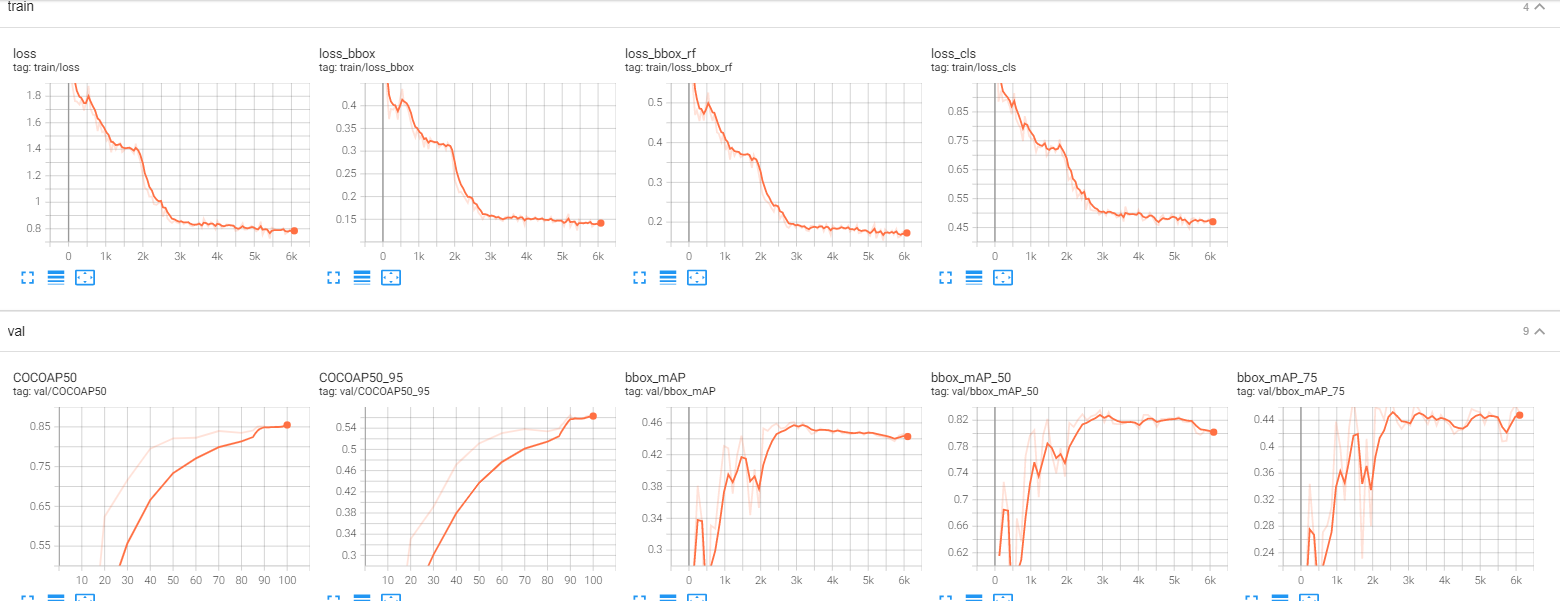

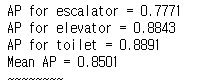

91 epoch 에서 훈련 끊겨서 resume 활용하여 이전 체크포인트에서 훈련 추가 진행 

In [13]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -o -c ./YOLOX_outputs/trial2/epoch_90_ckpt.pth --resume -e 91 -expn trial2_2 

1
2022-05-22 12:10:51 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./YOLOX_outputs/trial2/epoch_90_ckpt.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='trial2_2', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=True, start_epoch=91)
2022-05-22 12:10:51 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├────────────────

2022-05-22 12:11:21 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 10/333, mem: 9379Mb, iter_time: 1.600s, data_time: 0.007s, total_loss: 2.3, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.6, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 1:28:30
2022-05-22 12:11:31 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 20/333, mem: 9379Mb, iter_time: 1.022s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 1:12:18
2022-05-22 12:11:50 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 30/333, mem: 9379Mb, iter_time: 1.846s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.6, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 480, ETA: 1:21:53
2022-05-22 12:12:06 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 40/333, mem: 9379Mb, iter_time: 1.662s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 44

2022-05-22 12:17:44 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 290/333, mem: 9379Mb, iter_time: 1.800s, data_time: 0.006s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 1:09:39
2022-05-22 12:17:51 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 300/333, mem: 9379Mb, iter_time: 0.681s, data_time: 0.006s, total_loss: 2.9, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 1:08:15
2022-05-22 12:18:05 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 310/333, mem: 9379Mb, iter_time: 1.385s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.6, conf_loss: 0.5, cls_loss: 0.5, lr: 6.250e-05, size: 512, ETA: 1:08:05
2022-05-22 12:18:23 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 320/333, mem: 9379Mb, iter_time: 1.800s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.5, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 12:22:53 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 170/333, mem: 9379Mb, iter_time: 1.385s, data_time: 0.006s, total_loss: 2.5, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 1:03:37
2022-05-22 12:23:06 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 180/333, mem: 9379Mb, iter_time: 1.298s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 416, ETA: 1:03:21
2022-05-22 12:23:17 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 190/333, mem: 9379Mb, iter_time: 1.033s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 1:02:50
2022-05-22 12:23:25 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 200/333, mem: 9379Mb, iter_time: 0.850s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 12:27:24 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 50/333, mem: 9379Mb, iter_time: 1.130s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 0:56:22
2022-05-22 12:27:33 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 60/333, mem: 9379Mb, iter_time: 0.843s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 288, ETA: 0:55:53
2022-05-22 12:27:41 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 70/333, mem: 9379Mb, iter_time: 0.787s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:55:22
2022-05-22 12:27:55 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 80/333, mem: 9379Mb, iter_time: 1.425s, data_time: 0.006s, total_loss: 2.5, iou_loss: 1.2, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 57

2022-05-22 12:32:26 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 330/333, mem: 9379Mb, iter_time: 1.002s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 0:47:56
2022-05-22 12:32:29 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
100%|##########| 22/22 [00:16<00:00,  1.35it/s]
2022-05-22 12:32:48 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8951
AP for elevator = 0.8740
AP for toilet = 0.9681
Mean AP = 0.9124
~~~~~~~~
Results:
0.895
0.874
0.968
0.912
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your

2022-05-22 12:36:41 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 210/333, mem: 9379Mb, iter_time: 1.581s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 544, ETA: 0:42:36
2022-05-22 12:36:57 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 220/333, mem: 9379Mb, iter_time: 1.675s, data_time: 0.006s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.6, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 544, ETA: 0:42:32
2022-05-22 12:37:11 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 230/333, mem: 9379Mb, iter_time: 1.374s, data_time: 0.007s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.2, cls_loss: 0.4, lr: 6.250e-05, size: 480, ETA: 0:42:23
2022-05-22 12:37:23 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 240/333, mem: 9379Mb, iter_time: 1.208s, data_time: 0.006s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 12:41:06 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 90/333, mem: 9379Mb, iter_time: 0.757s, data_time: 0.006s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:37:57
2022-05-22 12:41:15 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 100/333, mem: 9379Mb, iter_time: 0.856s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:37:41
2022-05-22 12:41:25 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 110/333, mem: 9379Mb, iter_time: 1.021s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.7, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:37:26
2022-05-22 12:41:41 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 120/333, mem: 9379Mb, iter_time: 1.610s, data_time: 0.006s, total_loss: 1.5, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size:

Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.6530018594200073
map_50: 0.9134388764129748
--------------------------------------------------------------
2022-05-22 12:46:17 | INFO     | yolox.core.trainer:342 - 
Average forward time: 85.27 ms, Average NMS time: 0.99 ms, Average inference time: 86.26 ms

2022-05-22 12:46:17 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 12:46:22 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 12:46:23 | INFO     | yolox.core.trainer:203 - ---> start train epoch96
2022-05-22 12:46:23 | INFO     | yolox.core.trainer:206 - --->No mosaic aug now!
2022-05-22 12:46:23 | INFO     | yolox.core.trainer:208 - --->Add additional L1 loss now!
2022-05-22 12:46:35 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 10/333,

2022-05-22 12:51:01 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 250/333, mem: 9379Mb, iter_time: 0.994s, data_time: 0.007s, total_loss: 2.2, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 0:27:54
2022-05-22 12:51:15 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 260/333, mem: 9379Mb, iter_time: 1.347s, data_time: 0.007s, total_loss: 3.2, iou_loss: 1.4, l1_loss: 0.7, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 0:27:44
2022-05-22 12:51:28 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 270/333, mem: 9379Mb, iter_time: 1.324s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:27:33
2022-05-22 12:51:35 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 280/333, mem: 9379Mb, iter_time: 0.767s, data_time: 0.007s, total_loss: 1.6, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 12:54:57 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 130/333, mem: 9379Mb, iter_time: 1.514s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:23:20
2022-05-22 12:55:14 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 140/333, mem: 9379Mb, iter_time: 1.688s, data_time: 0.007s, total_loss: 1.5, iou_loss: 0.7, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:23:11
2022-05-22 12:55:23 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 150/333, mem: 9379Mb, iter_time: 0.922s, data_time: 0.007s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:22:58
2022-05-22 12:55:33 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 160/333, mem: 9379Mb, iter_time: 1.018s, data_time: 0.006s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 12:59:32 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 10/333, mem: 9379Mb, iter_time: 1.346s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:19:13
2022-05-22 12:59:46 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 20/333, mem: 9379Mb, iter_time: 1.412s, data_time: 0.007s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:19:02
2022-05-22 13:00:02 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 30/333, mem: 9379Mb, iter_time: 1.649s, data_time: 0.006s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:18:53
2022-05-22 13:00:15 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 40/333, mem: 9379Mb, iter_time: 1.319s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 32

2022-05-22 13:05:00 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 290/333, mem: 9379Mb, iter_time: 1.592s, data_time: 0.006s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:13:47
2022-05-22 13:05:08 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 300/333, mem: 9379Mb, iter_time: 0.822s, data_time: 0.007s, total_loss: 1.5, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 256, ETA: 0:13:34
2022-05-22 13:05:14 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 310/333, mem: 9379Mb, iter_time: 0.583s, data_time: 0.007s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:13:21
2022-05-22 13:05:23 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 320/333, mem: 9379Mb, iter_time: 0.927s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 13:09:12 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 170/333, mem: 9379Mb, iter_time: 1.173s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:09:35
2022-05-22 13:09:20 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 180/333, mem: 9379Mb, iter_time: 0.853s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:09:23
2022-05-22 13:09:28 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 190/333, mem: 9379Mb, iter_time: 0.784s, data_time: 0.006s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.5, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 0:09:10
2022-05-22 13:09:39 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 200/333, mem: 9379Mb, iter_time: 1.125s, data_time: 0.006s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 13:13:47 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 50/333, mem: 9379Mb, iter_time: 0.853s, data_time: 0.007s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:05:28
2022-05-22 13:13:56 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 60/333, mem: 9379Mb, iter_time: 0.883s, data_time: 0.006s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:05:16
2022-05-22 13:14:05 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 70/333, mem: 9379Mb, iter_time: 0.897s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:05:05
2022-05-22 13:14:17 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 80/333, mem: 9379Mb, iter_time: 1.212s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 13:19:02 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 330/333, mem: 9379Mb, iter_time: 0.847s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:00:03
2022-05-22 13:19:05 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
100%|##########| 22/22 [00:16<00:00,  1.36it/s]
2022-05-22 13:19:24 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8969
AP for elevator = 0.8658
AP for toilet = 0.9679
Mean AP = 0.9102
~~~~~~~~
Results:
0.897
0.866
0.968
0.910
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for you

In [14]:
!python3 tools/eval.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -c ./YOLOX_outputs/trial2_2/best_ckpt.pth --conf 0.001

2022-05-22 13:35:47 | INFO     | __main__:139 - Args: Namespace(batch_size=8, ckpt='./YOLOX_outputs/trial2_2/best_ckpt.pth', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=True, fuse=False, legacy=False, machine_rank=0, name=None, nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2022-05-22 13:35:48 | INFO     | __main__:149 - Model Summary: Params: 54.15M, Gflops: 155.32
2022-05-22 13:35:48 | INFO     | __main__:150 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): BaseConv(
          (con

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-22 13:35:55 | INFO     | __main__:165 - loading checkpoint from ./YOLOX_outputs/trial2_2/best_ckpt.pth
2022-05-22 13:35:57 | INFO     | __main__:169 - loaded checkpoint done.
100%|##########| 22/22 [00:21<00:00,  1.01it/s]
2022-05-22 13:36:19 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8956
AP for elevator = 0.8767
AP for toilet = 0.9638
Mean AP =

In [10]:
!python3 tools/eval.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -c ./YOLOX_outputs/yolox_voc_s/epoch_100_ckpt.pth --conf 0.001

2022-05-30 21:44:13 | INFO     | __main__:139 - Args: Namespace(batch_size=8, ckpt='./YOLOX_outputs/yolox_voc_s/epoch_100_ckpt.pth', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=True, fuse=False, legacy=False, machine_rank=0, name=None, nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2022-05-30 21:44:14 | INFO     | __main__:149 - Model Summary: Params: 54.15M, Gflops: 155.32
2022-05-30 21:44:14 | INFO     | __main__:150 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): BaseConv(
      

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-30 21:44:19 | INFO     | __main__:165 - loading checkpoint from ./YOLOX_outputs/yolox_voc_s/epoch_100_ckpt.pth
2022-05-30 21:44:21 | INFO     | __main__:169 - loaded checkpoint done.
100%|##########| 22/22 [00:24<00:00,  1.10s/it]
2022-05-30 21:44:45 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
('escalator', 'elevator', 'toilet')
AP for escalator = 0.8144
('escalator',

# YOLOX-m 

In [1]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_m.py -d 1 -b 8 --fp16 -o -c ./yolox_m.pth  -expn yolox_m_work_dir

1
2022-05-28 17:22:24 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./yolox_m.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_m.py', experiment_name='yolom_work_dir', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-05-28 17:22:24 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├───────────────────┼──────────────

2022-05-28 17:22:54 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 10/333, mem: 9597Mb, iter_time: 1.133s, data_time: 0.006s, total_loss: 11.9, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 6.2, cls_loss: 2.4, lr: 1.127e-06, size: 416, ETA: 20:57:00
2022-05-28 17:23:07 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 20/333, mem: 9597Mb, iter_time: 1.283s, data_time: 0.010s, total_loss: 11.3, iou_loss: 3.5, l1_loss: 0.0, conf_loss: 5.6, cls_loss: 2.2, lr: 4.509e-06, size: 480, ETA: 22:20:25
2022-05-28 17:23:25 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 30/333, mem: 9597Mb, iter_time: 1.874s, data_time: 0.008s, total_loss: 11.3, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 5.8, cls_loss: 2.2, lr: 1.015e-05, size: 544, ETA: 1 day, 2:26:21
2022-05-28 17:23:37 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 40/333, mem: 9597Mb, iter_time: 1.157s, data_time: 0.007s, total_loss: 10.5, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 5.2, cls_loss: 2.1, lr: 1.804e-05,

2022-05-28 17:27:11 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 290/333, mem: 9597Mb, iter_time: 0.772s, data_time: 0.008s, total_loss: 5.5, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.8, lr: 9.480e-04, size: 416, ETA: 17:01:44
2022-05-28 17:27:23 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 300/333, mem: 9597Mb, iter_time: 1.211s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 1.015e-03, size: 576, ETA: 17:12:07
2022-05-28 17:27:28 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 310/333, mem: 9597Mb, iter_time: 0.502s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.8, lr: 1.083e-03, size: 288, ETA: 16:56:34
2022-05-28 17:27:40 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 320/333, mem: 9597Mb, iter_time: 1.242s, data_time: 0.009s, total_loss: 7.0, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.8, lr: 1.154e-03, size:

2022-05-28 17:31:22 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 230/333, mem: 9597Mb, iter_time: 0.817s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.250e-03, size: 320, ETA: 16:53:30
2022-05-28 17:31:28 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 240/333, mem: 9597Mb, iter_time: 0.589s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.250e-03, size: 384, ETA: 16:46:59
2022-05-28 17:31:36 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 250/333, mem: 9597Mb, iter_time: 0.817s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.250e-03, size: 544, ETA: 16:44:59
2022-05-28 17:31:47 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 260/333, mem: 9597Mb, iter_time: 1.091s, data_time: 0.008s, total_loss: 6.4, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.8, lr: 1.250e-03, size:

2022-05-28 17:35:21 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 170/333, mem: 9597Mb, iter_time: 0.826s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.250e-03, size: 448, ETA: 16:30:37
2022-05-28 17:35:27 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 180/333, mem: 9597Mb, iter_time: 0.634s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 1.250e-03, size: 288, ETA: 16:26:58
2022-05-28 17:35:34 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 190/333, mem: 9597Mb, iter_time: 0.661s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 1.250e-03, size: 416, ETA: 16:23:45
2022-05-28 17:35:42 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 200/333, mem: 9597Mb, iter_time: 0.866s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 1.250e-03, size:

2022-05-28 17:38:57 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 110/333, mem: 9597Mb, iter_time: 0.963s, data_time: 0.008s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.250e-03, size: 480, ETA: 15:55:10
2022-05-28 17:39:09 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 120/333, mem: 9597Mb, iter_time: 1.189s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.6, lr: 1.250e-03, size: 576, ETA: 15:58:05
2022-05-28 17:39:15 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 130/333, mem: 9597Mb, iter_time: 0.572s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.250e-03, size: 288, ETA: 15:54:59
2022-05-28 17:39:25 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 140/333, mem: 9597Mb, iter_time: 1.069s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.249e-03, size:

2022-05-28 17:42:24 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 50/333, mem: 9597Mb, iter_time: 0.546s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.249e-03, size: 320, ETA: 15:25:00
2022-05-28 17:42:29 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 60/333, mem: 9597Mb, iter_time: 0.533s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.249e-03, size: 256, ETA: 15:22:22
2022-05-28 17:42:34 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 70/333, mem: 9597Mb, iter_time: 0.492s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.249e-03, size: 384, ETA: 15:19:28
2022-05-28 17:42:41 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 80/333, mem: 9597Mb, iter_time: 0.701s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.249e-03, size: 448

2022-05-28 17:46:18 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 330/333, mem: 9597Mb, iter_time: 1.075s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.249e-03, size: 448, ETA: 15:18:04
2022-05-28 17:46:20 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 17:46:22 | INFO     | yolox.core.trainer:203 - ---> start train epoch6
2022-05-28 17:46:30 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 10/333, mem: 9597Mb, iter_time: 0.821s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.249e-03, size: 448, ETA: 15:17:40
2022-05-28 17:46:36 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 20/333, mem: 9597Mb, iter_time: 0.635s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 1.249e-03, size: 256, ETA: 15:16:09
2022-05-28 17:46:41 | INFO     | yolox.core.traine

2022-05-28 17:49:48 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 270/333, mem: 9597Mb, iter_time: 0.803s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.248e-03, size: 480, ETA: 15:01:23
2022-05-28 17:49:57 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 280/333, mem: 9597Mb, iter_time: 0.930s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.248e-03, size: 480, ETA: 15:01:45
2022-05-28 17:50:06 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 290/333, mem: 9597Mb, iter_time: 0.884s, data_time: 0.010s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 1.248e-03, size: 448, ETA: 15:01:52
2022-05-28 17:50:14 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 300/333, mem: 9597Mb, iter_time: 0.800s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 1.248e-03, size:

2022-05-28 17:53:32 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 210/333, mem: 9597Mb, iter_time: 0.570s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.247e-03, size: 288, ETA: 14:54:56
2022-05-28 17:53:41 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 220/333, mem: 9597Mb, iter_time: 0.883s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.247e-03, size: 512, ETA: 14:55:02
2022-05-28 17:53:52 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 230/333, mem: 9597Mb, iter_time: 1.106s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.247e-03, size: 544, ETA: 14:56:12
2022-05-28 17:53:59 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 240/333, mem: 9597Mb, iter_time: 0.723s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.247e-03, size:

2022-05-28 17:57:13 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 150/333, mem: 9597Mb, iter_time: 0.657s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 1.246e-03, size: 512, ETA: 14:47:35
2022-05-28 17:57:23 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 160/333, mem: 9597Mb, iter_time: 0.978s, data_time: 0.009s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.246e-03, size: 512, ETA: 14:48:05
2022-05-28 17:57:33 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 170/333, mem: 9597Mb, iter_time: 1.001s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.246e-03, size: 544, ETA: 14:48:40
2022-05-28 17:57:45 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 180/333, mem: 9597Mb, iter_time: 1.146s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.246e-03, size:

2022-05-28 18:01:04 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 90/333, mem: 9597Mb, iter_time: 0.972s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.245e-03, size: 384, ETA: 14:44:57
2022-05-28 18:01:12 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 100/333, mem: 9597Mb, iter_time: 0.709s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.245e-03, size: 416, ETA: 14:44:20
2022-05-28 18:01:19 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 110/333, mem: 9597Mb, iter_time: 0.730s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.245e-03, size: 384, ETA: 14:43:48
2022-05-28 18:01:28 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 120/333, mem: 9597Mb, iter_time: 0.886s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.245e-03, size: 

2022-05-28 18:04:41 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 30/333, mem: 9597Mb, iter_time: 0.959s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 1.244e-03, size: 544, ETA: 14:36:51
2022-05-28 18:04:47 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 40/333, mem: 9597Mb, iter_time: 0.647s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.244e-03, size: 256, ETA: 14:36:05
2022-05-28 18:04:57 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 50/333, mem: 9597Mb, iter_time: 0.925s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.244e-03, size: 544, ETA: 14:36:18
2022-05-28 18:05:05 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 60/333, mem: 9597Mb, iter_time: 0.894s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.244e-03, size:

2022-05-28 18:08:29 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 310/333, mem: 9597Mb, iter_time: 1.190s, data_time: 0.008s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.243e-03, size: 576, ETA: 14:31:54
2022-05-28 18:08:36 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 320/333, mem: 9597Mb, iter_time: 0.667s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 1.243e-03, size: 256, ETA: 14:31:15
2022-05-28 18:08:44 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 330/333, mem: 9597Mb, iter_time: 0.781s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.243e-03, size: 480, ETA: 14:30:59
2022-05-28 18:08:47 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
100%|##########| 22/22 [00:14<00:00,  1.53it/s]
2022-05-28 18:09:02 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate 

2022-05-28 18:11:35 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 200/333, mem: 9597Mb, iter_time: 0.980s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.242e-03, size: 512, ETA: 14:23:07
2022-05-28 18:11:46 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 210/333, mem: 9597Mb, iter_time: 1.144s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.242e-03, size: 544, ETA: 14:23:56
2022-05-28 18:11:58 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 220/333, mem: 9597Mb, iter_time: 1.211s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.242e-03, size: 576, ETA: 14:24:57
2022-05-28 18:12:10 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 230/333, mem: 9597Mb, iter_time: 1.209s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.242e-03, s

2022-05-28 18:15:16 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 140/333, mem: 9597Mb, iter_time: 0.632s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.241e-03, size: 448, ETA: 14:18:14
2022-05-28 18:15:24 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 150/333, mem: 9597Mb, iter_time: 0.748s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.241e-03, size: 320, ETA: 14:17:54
2022-05-28 18:15:30 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 160/333, mem: 9597Mb, iter_time: 0.585s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.241e-03, size: 384, ETA: 14:17:08
2022-05-28 18:15:37 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 170/333, mem: 9597Mb, iter_time: 0.715s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.240e-03, s

2022-05-28 18:19:15 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 80/333, mem: 9597Mb, iter_time: 1.175s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.239e-03, size: 576, ETA: 14:18:03
2022-05-28 18:19:24 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 90/333, mem: 9597Mb, iter_time: 0.809s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.239e-03, size: 320, ETA: 14:17:53
2022-05-28 18:19:31 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 100/333, mem: 9597Mb, iter_time: 0.782s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.239e-03, size: 480, ETA: 14:17:38
2022-05-28 18:19:39 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 110/333, mem: 9597Mb, iter_time: 0.776s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.239e-03, siz

2022-05-28 18:22:19 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 20/333, mem: 9597Mb, iter_time: 1.097s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.237e-03, size: 544, ETA: 14:04:01
2022-05-28 18:22:30 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 30/333, mem: 9597Mb, iter_time: 1.137s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.237e-03, size: 544, ETA: 14:04:39
2022-05-28 18:22:39 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 40/333, mem: 9597Mb, iter_time: 0.863s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.237e-03, size: 448, ETA: 14:04:38
2022-05-28 18:22:44 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 50/333, mem: 9597Mb, iter_time: 0.578s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.237e-03, size:

2022-05-28 18:26:22 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 300/333, mem: 9597Mb, iter_time: 0.839s, data_time: 0.011s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.236e-03, size: 448, ETA: 14:03:35
2022-05-28 18:26:33 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 310/333, mem: 9597Mb, iter_time: 1.168s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 1.236e-03, size: 576, ETA: 14:04:14
2022-05-28 18:26:43 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 320/333, mem: 9597Mb, iter_time: 0.963s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.236e-03, size: 480, ETA: 14:04:25
2022-05-28 18:26:48 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 330/333, mem: 9597Mb, iter_time: 0.486s, data_time: 0.008s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.235e-03, s

2022-05-28 18:30:07 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 240/333, mem: 9597Mb, iter_time: 0.625s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 1.234e-03, size: 480, ETA: 14:00:06
2022-05-28 18:30:16 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 250/333, mem: 9597Mb, iter_time: 0.882s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.234e-03, size: 384, ETA: 14:00:06
2022-05-28 18:30:23 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 260/333, mem: 9597Mb, iter_time: 0.665s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.234e-03, size: 384, ETA: 13:59:39
2022-05-28 18:30:30 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 270/333, mem: 9597Mb, iter_time: 0.731s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.234e-03, s

2022-05-28 18:33:25 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 180/333, mem: 9597Mb, iter_time: 0.644s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.232e-03, size: 352, ETA: 13:51:12
2022-05-28 18:33:33 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 190/333, mem: 9597Mb, iter_time: 0.804s, data_time: 0.011s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.232e-03, size: 480, ETA: 13:51:03
2022-05-28 18:33:42 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 200/333, mem: 9597Mb, iter_time: 0.881s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.232e-03, size: 448, ETA: 13:51:03
2022-05-28 18:33:50 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 210/333, mem: 9597Mb, iter_time: 0.799s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 1.232e-03, s

2022-05-28 18:37:08 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 120/333, mem: 9597Mb, iter_time: 0.765s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.230e-03, size: 416, ETA: 13:47:25
2022-05-28 18:37:13 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 130/333, mem: 9597Mb, iter_time: 0.499s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.230e-03, size: 256, ETA: 13:46:42
2022-05-28 18:37:22 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 140/333, mem: 9597Mb, iter_time: 0.872s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.230e-03, size: 512, ETA: 13:46:41
2022-05-28 18:37:31 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 150/333, mem: 9597Mb, iter_time: 0.981s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.229e-03, s

2022-05-28 18:40:40 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 60/333, mem: 9597Mb, iter_time: 0.645s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.227e-03, size: 256, ETA: 13:41:45
2022-05-28 18:40:44 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 70/333, mem: 9597Mb, iter_time: 0.444s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.227e-03, size: 288, ETA: 13:40:58
2022-05-28 18:40:50 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 80/333, mem: 9597Mb, iter_time: 0.570s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.227e-03, size: 576, ETA: 13:40:24
2022-05-28 18:41:02 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 90/333, mem: 9597Mb, iter_time: 1.170s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.227e-03, size:

2022-05-28 18:43:45 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 18:43:46 | INFO     | yolox.core.trainer:203 - ---> start train epoch19
2022-05-28 18:43:57 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 10/333, mem: 9597Mb, iter_time: 1.121s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.225e-03, size: 512, ETA: 13:32:20
2022-05-28 18:44:05 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 20/333, mem: 9597Mb, iter_time: 0.793s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.225e-03, size: 288, ETA: 13:32:11
2022-05-28 18:44:11 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 30/333, mem: 9597Mb, iter_time: 0.549s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.225e-03, size: 352, ETA: 13:31:37
2022-05-28 18:44:16 | INFO     | yolox.core.tra

2022-05-28 18:47:26 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 280/333, mem: 9597Mb, iter_time: 0.669s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.223e-03, size: 288, ETA: 13:27:22
2022-05-28 18:47:31 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 290/333, mem: 9597Mb, iter_time: 0.520s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.223e-03, size: 320, ETA: 13:26:47
2022-05-28 18:47:37 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 300/333, mem: 9597Mb, iter_time: 0.530s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.8, lr: 1.222e-03, size: 288, ETA: 13:26:13
2022-05-28 18:47:42 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 310/333, mem: 9597Mb, iter_time: 0.572s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.222e-03, s

2022-05-28 18:51:00 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 220/333, mem: 9597Mb, iter_time: 0.657s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.220e-03, size: 320, ETA: 13:22:38
2022-05-28 18:51:06 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 230/333, mem: 9597Mb, iter_time: 0.597s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.220e-03, size: 352, ETA: 13:22:11
2022-05-28 18:51:12 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 240/333, mem: 9597Mb, iter_time: 0.621s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.220e-03, size: 352, ETA: 13:21:47
2022-05-28 18:51:22 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 250/333, mem: 9597Mb, iter_time: 0.987s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.220e-03, s

2022-05-28 18:53:54 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 110/333, mem: 9597Mb, iter_time: 0.542s, data_time: 0.009s, total_loss: 3.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.218e-03, size: 288, ETA: 13:16:36
2022-05-28 18:54:00 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 120/333, mem: 9597Mb, iter_time: 0.526s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.218e-03, size: 288, ETA: 13:16:04
2022-05-28 18:54:08 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 130/333, mem: 9597Mb, iter_time: 0.833s, data_time: 0.008s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.218e-03, size: 448, ETA: 13:15:59
2022-05-28 18:54:13 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 140/333, mem: 9597Mb, iter_time: 0.501s, data_time: 0.007s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.218e-03, s

2022-05-28 18:57:44 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 50/333, mem: 9597Mb, iter_time: 0.937s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.215e-03, size: 480, ETA: 13:14:24
2022-05-28 18:57:53 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 60/333, mem: 9597Mb, iter_time: 0.900s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.215e-03, size: 448, ETA: 13:14:24
2022-05-28 18:58:01 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 70/333, mem: 9597Mb, iter_time: 0.781s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.215e-03, size: 384, ETA: 13:14:15
2022-05-28 18:58:07 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 80/333, mem: 9597Mb, iter_time: 0.633s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.215e-03, size:

2022-05-28 19:01:06 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 330/333, mem: 9597Mb, iter_time: 1.122s, data_time: 0.010s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 1.212e-03, size: 512, ETA: 13:07:42
2022-05-28 19:01:09 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 19:01:11 | INFO     | yolox.core.trainer:203 - ---> start train epoch23
2022-05-28 19:01:22 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 10/333, mem: 9597Mb, iter_time: 1.115s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.212e-03, size: 576, ETA: 13:08:02
2022-05-28 19:01:34 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 20/333, mem: 9597Mb, iter_time: 1.204s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.212e-03, size: 576, ETA: 13:08:27
2022-05-28 19:01:42 | INFO     | yolox.core.tr

2022-05-28 19:05:00 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 270/333, mem: 9597Mb, iter_time: 0.847s, data_time: 0.010s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.209e-03, size: 448, ETA: 13:05:57
2022-05-28 19:05:06 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 280/333, mem: 9597Mb, iter_time: 0.597s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.209e-03, size: 256, ETA: 13:05:33
2022-05-28 19:05:12 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 290/333, mem: 9597Mb, iter_time: 0.573s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.209e-03, size: 384, ETA: 13:05:08
2022-05-28 19:05:18 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 300/333, mem: 9597Mb, iter_time: 0.665s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.209e-03, s

2022-05-28 19:08:46 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 210/333, mem: 9597Mb, iter_time: 1.201s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.206e-03, size: 576, ETA: 13:03:05
2022-05-28 19:08:54 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 220/333, mem: 9597Mb, iter_time: 0.811s, data_time: 0.008s, total_loss: 4.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 1.206e-03, size: 416, ETA: 13:02:58
2022-05-28 19:09:06 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 230/333, mem: 9597Mb, iter_time: 1.185s, data_time: 0.010s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.206e-03, size: 576, ETA: 13:03:18
2022-05-28 19:09:12 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 240/333, mem: 9597Mb, iter_time: 0.616s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.206e-03, s

2022-05-28 19:12:19 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 150/333, mem: 9597Mb, iter_time: 0.601s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.203e-03, size: 320, ETA: 12:58:42
2022-05-28 19:12:25 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 160/333, mem: 9597Mb, iter_time: 0.527s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.203e-03, size: 256, ETA: 12:58:14
2022-05-28 19:12:30 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 170/333, mem: 9597Mb, iter_time: 0.582s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.203e-03, size: 544, ETA: 12:57:51
2022-05-28 19:12:41 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 180/333, mem: 9597Mb, iter_time: 1.100s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.203e-03, s

2022-05-28 19:16:03 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 90/333, mem: 9597Mb, iter_time: 0.644s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.200e-03, size: 256, ETA: 12:55:29
2022-05-28 19:16:08 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 100/333, mem: 9597Mb, iter_time: 0.564s, data_time: 0.010s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.200e-03, size: 384, ETA: 12:55:05
2022-05-28 19:16:18 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 110/333, mem: 9597Mb, iter_time: 0.940s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.200e-03, size: 576, ETA: 12:55:06
2022-05-28 19:16:29 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 120/333, mem: 9597Mb, iter_time: 1.098s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.199e-03, si

2022-05-28 19:19:33 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 30/333, mem: 9597Mb, iter_time: 0.513s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.196e-03, size: 288, ETA: 12:50:48
2022-05-28 19:19:38 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 40/333, mem: 9597Mb, iter_time: 0.501s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.196e-03, size: 288, ETA: 12:50:20
2022-05-28 19:19:42 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 50/333, mem: 9597Mb, iter_time: 0.460s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.196e-03, size: 256, ETA: 12:49:50
2022-05-28 19:19:51 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 60/333, mem: 9597Mb, iter_time: 0.876s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.196e-03, size:

2022-05-28 19:23:09 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 310/333, mem: 9597Mb, iter_time: 0.813s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.193e-03, size: 416, ETA: 12:46:18
2022-05-28 19:23:20 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 320/333, mem: 9597Mb, iter_time: 1.060s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.193e-03, size: 544, ETA: 12:46:27
2022-05-28 19:23:30 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 330/333, mem: 9597Mb, iter_time: 1.014s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 1.192e-03, size: 512, ETA: 12:46:33
2022-05-28 19:23:33 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 19:23:34 | INFO     | yolox.core.trainer:203 - ---> start train epoch28
2022-05-28 19:23:39 | INFO     | yolox.core.

2022-05-28 19:26:27 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 250/333, mem: 9597Mb, iter_time: 0.549s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.189e-03, size: 352, ETA: 12:40:27
2022-05-28 19:26:33 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 260/333, mem: 9597Mb, iter_time: 0.599s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 1.189e-03, size: 256, ETA: 12:40:07
2022-05-28 19:26:38 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 270/333, mem: 9597Mb, iter_time: 0.454s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.189e-03, size: 352, ETA: 12:39:38
2022-05-28 19:26:44 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 280/333, mem: 9597Mb, iter_time: 0.599s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.7, lr: 1.189e-03, s

2022-05-28 19:30:05 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 190/333, mem: 9597Mb, iter_time: 0.855s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.185e-03, size: 512, ETA: 12:36:44
2022-05-28 19:30:16 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 200/333, mem: 9597Mb, iter_time: 1.072s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.185e-03, size: 576, ETA: 12:36:53
2022-05-28 19:30:24 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 210/333, mem: 9597Mb, iter_time: 0.898s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.185e-03, size: 256, ETA: 12:36:51
2022-05-28 19:30:30 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 220/333, mem: 9597Mb, iter_time: 0.571s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.185e-03, s

2022-05-28 19:33:39 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 130/333, mem: 9597Mb, iter_time: 1.044s, data_time: 0.009s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.182e-03, size: 544, ETA: 12:32:42
2022-05-28 19:33:46 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 140/333, mem: 9597Mb, iter_time: 0.724s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.181e-03, size: 320, ETA: 12:32:30
2022-05-28 19:33:55 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 150/333, mem: 9597Mb, iter_time: 0.848s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.181e-03, size: 512, ETA: 12:32:25
2022-05-28 19:34:01 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 160/333, mem: 9597Mb, iter_time: 0.607s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.181e-03, s

2022-05-28 19:36:33 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 20/333, mem: 9597Mb, iter_time: 0.499s, data_time: 0.007s, total_loss: 3.9, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.178e-03, size: 288, ETA: 12:27:58
2022-05-28 19:36:42 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 30/333, mem: 9597Mb, iter_time: 0.833s, data_time: 0.007s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.178e-03, size: 448, ETA: 12:27:53
2022-05-28 19:36:49 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 40/333, mem: 9597Mb, iter_time: 0.766s, data_time: 0.007s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.178e-03, size: 416, ETA: 12:27:43
2022-05-28 19:36:54 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 50/333, mem: 9597Mb, iter_time: 0.442s, data_time: 0.008s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.178e-03, size:

2022-05-28 19:40:07 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 300/333, mem: 9597Mb, iter_time: 0.441s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.174e-03, size: 256, ETA: 12:23:30
2022-05-28 19:40:15 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 310/333, mem: 9597Mb, iter_time: 0.767s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.174e-03, size: 416, ETA: 12:23:21
2022-05-28 19:40:23 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 320/333, mem: 9597Mb, iter_time: 0.832s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.174e-03, size: 448, ETA: 12:23:15
2022-05-28 19:40:35 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 330/333, mem: 9597Mb, iter_time: 1.213s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 1.174e-03, s

2022-05-28 19:44:04 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 240/333, mem: 9597Mb, iter_time: 0.684s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.170e-03, size: 448, ETA: 12:21:37
2022-05-28 19:44:12 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 250/333, mem: 9597Mb, iter_time: 0.717s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.170e-03, size: 256, ETA: 12:21:25
2022-05-28 19:44:16 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 260/333, mem: 9597Mb, iter_time: 0.445s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.170e-03, size: 256, ETA: 12:20:59
2022-05-28 19:44:20 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 270/333, mem: 9597Mb, iter_time: 0.449s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.170e-03, s

2022-05-28 19:48:11 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 180/333, mem: 9597Mb, iter_time: 0.869s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.166e-03, size: 448, ETA: 12:20:27
2022-05-28 19:48:20 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 190/333, mem: 9597Mb, iter_time: 0.887s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.166e-03, size: 480, ETA: 12:20:24
2022-05-28 19:48:29 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 200/333, mem: 9597Mb, iter_time: 0.880s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.166e-03, size: 448, ETA: 12:20:20
2022-05-28 19:48:39 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 210/333, mem: 9597Mb, iter_time: 1.036s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.165e-03, s

2022-05-28 19:51:56 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 120/333, mem: 9597Mb, iter_time: 1.191s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.162e-03, size: 576, ETA: 12:17:19
2022-05-28 19:52:05 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 130/333, mem: 9597Mb, iter_time: 0.867s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.161e-03, size: 448, ETA: 12:17:15
2022-05-28 19:52:10 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 140/333, mem: 9597Mb, iter_time: 0.575s, data_time: 0.010s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.161e-03, size: 320, ETA: 12:16:56
2022-05-28 19:52:17 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 150/333, mem: 9597Mb, iter_time: 0.661s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.161e-03, s

2022-05-28 19:55:39 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 60/333, mem: 9597Mb, iter_time: 1.017s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.157e-03, size: 544, ETA: 12:14:02
2022-05-28 19:55:50 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 70/333, mem: 9597Mb, iter_time: 1.107s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.157e-03, size: 512, ETA: 12:14:09
2022-05-28 19:55:59 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 80/333, mem: 9597Mb, iter_time: 0.879s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.157e-03, size: 256, ETA: 12:14:05
2022-05-28 19:56:03 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 90/333, mem: 9597Mb, iter_time: 0.460s, data_time: 0.008s, total_loss: 3.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.157e-03, size:

2022-05-28 19:59:22 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 19:59:23 | INFO     | yolox.core.trainer:203 - ---> start train epoch36
2022-05-28 19:59:31 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 10/333, mem: 9597Mb, iter_time: 0.737s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.153e-03, size: 320, ETA: 12:10:37
2022-05-28 19:59:36 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 20/333, mem: 9597Mb, iter_time: 0.548s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.152e-03, size: 320, ETA: 12:10:17
2022-05-28 19:59:41 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 30/333, mem: 9597Mb, iter_time: 0.493s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.152e-03, size: 256, ETA: 12:09:55
2022-05-28 19:59:46 | INFO     | yolox.core.tra

2022-05-28 20:02:45 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 280/333, mem: 9597Mb, iter_time: 0.560s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.148e-03, size: 288, ETA: 12:05:25
2022-05-28 20:02:50 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 290/333, mem: 9597Mb, iter_time: 0.526s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.148e-03, size: 320, ETA: 12:05:05
2022-05-28 20:02:56 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 300/333, mem: 9597Mb, iter_time: 0.583s, data_time: 0.011s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.148e-03, size: 352, ETA: 12:04:47
2022-05-28 20:03:03 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 310/333, mem: 9597Mb, iter_time: 0.641s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.147e-03, s

2022-05-28 20:06:27 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 220/333, mem: 9597Mb, iter_time: 0.670s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.143e-03, size: 384, ETA: 12:02:03
2022-05-28 20:06:34 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 230/333, mem: 9597Mb, iter_time: 0.627s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.143e-03, size: 352, ETA: 12:01:48
2022-05-28 20:06:39 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 240/333, mem: 9597Mb, iter_time: 0.529s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.143e-03, size: 288, ETA: 12:01:28
2022-05-28 20:06:46 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 250/333, mem: 9597Mb, iter_time: 0.710s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.143e-03, s

2022-05-28 20:09:55 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 160/333, mem: 9597Mb, iter_time: 1.134s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.7, lr: 1.139e-03, size: 288, ETA: 11:57:39
2022-05-28 20:10:01 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 170/333, mem: 9597Mb, iter_time: 0.506s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.138e-03, size: 320, ETA: 11:57:19
2022-05-28 20:10:06 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 180/333, mem: 9597Mb, iter_time: 0.548s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.138e-03, size: 320, ETA: 11:57:00
2022-05-28 20:10:12 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 190/333, mem: 9597Mb, iter_time: 0.578s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.138e-03, s

2022-05-28 20:13:17 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 100/333, mem: 9597Mb, iter_time: 0.856s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.134e-03, size: 256, ETA: 11:52:51
2022-05-28 20:13:25 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 110/333, mem: 9597Mb, iter_time: 0.743s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.133e-03, size: 576, ETA: 11:52:41
2022-05-28 20:13:35 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 120/333, mem: 9597Mb, iter_time: 0.996s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.133e-03, size: 352, ETA: 11:52:42
2022-05-28 20:13:42 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 130/333, mem: 9597Mb, iter_time: 0.677s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.133e-03, s

2022-05-28 20:17:16 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 40/333, mem: 9597Mb, iter_time: 0.793s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.129e-03, size: 352, ETA: 11:50:39
2022-05-28 20:17:26 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 50/333, mem: 9597Mb, iter_time: 0.989s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.128e-03, size: 544, ETA: 11:50:39
2022-05-28 20:17:35 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 60/333, mem: 9597Mb, iter_time: 0.879s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.7, lr: 1.128e-03, size: 416, ETA: 11:50:35
2022-05-28 20:17:41 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 70/333, mem: 9597Mb, iter_time: 0.616s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.128e-03, size:

2022-05-28 20:20:51 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 320/333, mem: 9597Mb, iter_time: 0.809s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.123e-03, size: 448, ETA: 11:46:23
2022-05-28 20:21:02 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 330/333, mem: 9597Mb, iter_time: 1.112s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.123e-03, size: 576, ETA: 11:46:28
2022-05-28 20:21:06 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
100%|##########| 22/22 [00:10<00:00,  2.01it/s]
2022-05-28 20:21:18 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8862
AP for elevator = 0.9334
AP for toilet = 0.9962
Mean AP = 0.9386
~~~~~~~~
Results:
0.886
0.933

2022-05-28 20:24:01 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 210/333, mem: 9597Mb, iter_time: 0.935s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.119e-03, size: 480, ETA: 11:43:12
2022-05-28 20:24:13 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 220/333, mem: 9597Mb, iter_time: 1.213s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.119e-03, size: 576, ETA: 11:43:20
2022-05-28 20:24:21 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 230/333, mem: 9597Mb, iter_time: 0.765s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.119e-03, size: 416, ETA: 11:43:11
2022-05-28 20:24:33 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 240/333, mem: 9597Mb, iter_time: 1.207s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.119e-03, s

2022-05-28 20:27:58 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 150/333, mem: 9597Mb, iter_time: 0.618s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.114e-03, size: 352, ETA: 11:40:46
2022-05-28 20:28:04 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 160/333, mem: 9597Mb, iter_time: 0.619s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.114e-03, size: 352, ETA: 11:40:32
2022-05-28 20:28:12 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 170/333, mem: 9597Mb, iter_time: 0.798s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.114e-03, size: 576, ETA: 11:40:24
2022-05-28 20:28:24 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 180/333, mem: 9597Mb, iter_time: 1.144s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.113e-03, s

2022-05-28 20:31:36 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 90/333, mem: 9597Mb, iter_time: 0.546s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.109e-03, size: 288, ETA: 11:37:05
2022-05-28 20:31:41 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 100/333, mem: 9597Mb, iter_time: 0.574s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.108e-03, size: 352, ETA: 11:36:49
2022-05-28 20:31:51 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 110/333, mem: 9597Mb, iter_time: 0.928s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.108e-03, size: 544, ETA: 11:36:46
2022-05-28 20:31:58 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 120/333, mem: 9597Mb, iter_time: 0.757s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.108e-03, si

2022-05-28 20:34:58 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 30/333, mem: 9597Mb, iter_time: 0.489s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.103e-03, size: 256, ETA: 11:32:28
2022-05-28 20:35:09 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 40/333, mem: 9597Mb, iter_time: 1.086s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.103e-03, size: 544, ETA: 11:32:31
2022-05-28 20:35:21 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 50/333, mem: 9597Mb, iter_time: 1.199s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.103e-03, size: 576, ETA: 11:32:38
2022-05-28 20:35:33 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 60/333, mem: 9597Mb, iter_time: 1.204s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.103e-03, size:

2022-05-28 20:38:32 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 310/333, mem: 9597Mb, iter_time: 0.921s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.098e-03, size: 480, ETA: 11:28:15
2022-05-28 20:38:40 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 320/333, mem: 9597Mb, iter_time: 0.784s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.097e-03, size: 416, ETA: 11:28:07
2022-05-28 20:38:46 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 330/333, mem: 9597Mb, iter_time: 0.568s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.097e-03, size: 320, ETA: 11:27:51
2022-05-28 20:38:48 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 20:38:49 | INFO     | yolox.core.trainer:203 - ---> start train epoch45
2022-05-28 20:38:55 | INFO     | yolox.core.

2022-05-28 20:41:47 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 250/333, mem: 9597Mb, iter_time: 0.463s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.092e-03, size: 320, ETA: 11:23:18
2022-05-28 20:41:53 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 260/333, mem: 9597Mb, iter_time: 0.593s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.092e-03, size: 416, ETA: 11:23:03
2022-05-28 20:42:01 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 270/333, mem: 9597Mb, iter_time: 0.759s, data_time: 0.007s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.091e-03, size: 416, ETA: 11:22:54
2022-05-28 20:42:09 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 280/333, mem: 9597Mb, iter_time: 0.851s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.091e-03, s

2022-05-28 20:45:19 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 190/333, mem: 9597Mb, iter_time: 0.584s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.086e-03, size: 384, ETA: 11:19:21
2022-05-28 20:45:27 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 200/333, mem: 9597Mb, iter_time: 0.802s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.086e-03, size: 480, ETA: 11:19:13
2022-05-28 20:45:36 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 210/333, mem: 9597Mb, iter_time: 0.880s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.086e-03, size: 448, ETA: 11:19:08
2022-05-28 20:45:42 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 220/333, mem: 9597Mb, iter_time: 0.632s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.086e-03, s

2022-05-28 20:48:38 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 130/333, mem: 9597Mb, iter_time: 0.912s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.080e-03, size: 480, ETA: 11:14:43
2022-05-28 20:48:48 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 140/333, mem: 9597Mb, iter_time: 0.934s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.080e-03, size: 480, ETA: 11:14:39
2022-05-28 20:48:55 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 150/333, mem: 9597Mb, iter_time: 0.717s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.080e-03, size: 384, ETA: 11:14:29
2022-05-28 20:49:00 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 160/333, mem: 9597Mb, iter_time: 0.536s, data_time: 0.010s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.080e-03, s

2022-05-28 20:51:59 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 70/333, mem: 9597Mb, iter_time: 0.916s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.075e-03, size: 416, ETA: 11:10:11
2022-05-28 20:52:06 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 80/333, mem: 9597Mb, iter_time: 0.732s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.074e-03, size: 256, ETA: 11:10:02
2022-05-28 20:52:11 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 90/333, mem: 9597Mb, iter_time: 0.432s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.074e-03, size: 256, ETA: 11:09:42
2022-05-28 20:52:15 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 100/333, mem: 9597Mb, iter_time: 0.492s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 1.074e-03, size

2022-05-28 20:55:27 | INFO     | yolox.core.trainer:203 - ---> start train epoch49
2022-05-28 20:55:35 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 10/333, mem: 9597Mb, iter_time: 0.788s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.069e-03, size: 576, ETA: 11:06:31
2022-05-28 20:55:45 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 20/333, mem: 9597Mb, iter_time: 1.051s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.068e-03, size: 448, ETA: 11:06:32
2022-05-28 20:55:52 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 30/333, mem: 9597Mb, iter_time: 0.692s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.068e-03, size: 288, ETA: 11:06:20
2022-05-28 20:55:59 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 40/333, mem: 9597Mb, iter_time: 0.709s, data_time: 0.008s, total_loss: 3.

2022-05-28 20:58:55 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 290/333, mem: 9597Mb, iter_time: 0.749s, data_time: 0.012s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.062e-03, size: 288, ETA: 11:01:44
2022-05-28 20:59:02 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 300/333, mem: 9597Mb, iter_time: 0.701s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.062e-03, size: 480, ETA: 11:01:34
2022-05-28 20:59:12 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 310/333, mem: 9597Mb, iter_time: 1.042s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.062e-03, size: 576, ETA: 11:01:34
2022-05-28 20:59:23 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 320/333, mem: 9597Mb, iter_time: 1.055s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.062e-03, s

2022-05-28 21:02:46 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 230/333, mem: 9597Mb, iter_time: 0.515s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.056e-03, size: 288, ETA: 10:58:52
2022-05-28 21:02:56 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 240/333, mem: 9597Mb, iter_time: 0.995s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.056e-03, size: 576, ETA: 10:58:50
2022-05-28 21:03:03 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 250/333, mem: 9597Mb, iter_time: 0.737s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.056e-03, size: 288, ETA: 10:58:41
2022-05-28 21:03:11 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 260/333, mem: 9597Mb, iter_time: 0.728s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.056e-03, s

2022-05-28 21:05:52 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 120/333, mem: 9597Mb, iter_time: 0.667s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.051e-03, size: 384, ETA: 10:55:37
2022-05-28 21:06:01 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 130/333, mem: 9597Mb, iter_time: 0.983s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.051e-03, size: 512, ETA: 10:55:35
2022-05-28 21:06:07 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 140/333, mem: 9597Mb, iter_time: 0.548s, data_time: 0.007s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.051e-03, size: 320, ETA: 10:55:20
2022-05-28 21:06:17 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 150/333, mem: 9597Mb, iter_time: 0.984s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.051e-03, s

2022-05-28 21:09:30 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 60/333, mem: 9597Mb, iter_time: 0.587s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.045e-03, size: 288, ETA: 10:52:07
2022-05-28 21:09:35 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 70/333, mem: 9597Mb, iter_time: 0.488s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.045e-03, size: 256, ETA: 10:51:50
2022-05-28 21:09:42 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 80/333, mem: 9597Mb, iter_time: 0.677s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.045e-03, size: 576, ETA: 10:51:39
2022-05-28 21:09:52 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 90/333, mem: 9597Mb, iter_time: 0.980s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.044e-03, size:

2022-05-28 21:13:06 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 21:13:07 | INFO     | yolox.core.trainer:203 - ---> start train epoch53
2022-05-28 21:13:14 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 10/333, mem: 9597Mb, iter_time: 0.698s, data_time: 0.009s, total_loss: 3.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.039e-03, size: 320, ETA: 10:48:20
2022-05-28 21:13:19 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 20/333, mem: 9597Mb, iter_time: 0.543s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.038e-03, size: 320, ETA: 10:48:05
2022-05-28 21:13:27 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 30/333, mem: 9597Mb, iter_time: 0.776s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 1.038e-03, size: 480, ETA: 10:47:57
2022-05-28 21:13:35 | INFO     | yolox.core.tra

2022-05-28 21:16:54 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 280/333, mem: 9597Mb, iter_time: 0.791s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.032e-03, size: 512, ETA: 10:45:05
2022-05-28 21:17:01 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 290/333, mem: 9597Mb, iter_time: 0.745s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.032e-03, size: 320, ETA: 10:44:55
2022-05-28 21:17:06 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 300/333, mem: 9597Mb, iter_time: 0.484s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.032e-03, size: 256, ETA: 10:44:39
2022-05-28 21:17:13 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 310/333, mem: 9597Mb, iter_time: 0.736s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.032e-03, s

2022-05-28 21:23:52 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 150/333, mem: 9597Mb, iter_time: 0.781s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.019e-03, size: 448, ETA: 10:37:41
2022-05-28 21:24:00 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 160/333, mem: 9597Mb, iter_time: 0.786s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.019e-03, size: 352, ETA: 10:37:33
2022-05-28 21:24:06 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 170/333, mem: 9597Mb, iter_time: 0.627s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.019e-03, size: 384, ETA: 10:37:21
2022-05-28 21:24:13 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 180/333, mem: 9597Mb, iter_time: 0.683s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.019e-03, s

2022-05-28 21:27:27 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 90/333, mem: 9597Mb, iter_time: 0.983s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.013e-03, size: 544, ETA: 10:34:00
2022-05-28 21:27:37 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 100/333, mem: 9597Mb, iter_time: 1.032s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.013e-03, size: 480, ETA: 10:33:59
2022-05-28 21:27:45 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 110/333, mem: 9597Mb, iter_time: 0.803s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.012e-03, size: 384, ETA: 10:33:51
2022-05-28 21:27:51 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 120/333, mem: 9597Mb, iter_time: 0.606s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.012e-03, si

2022-05-28 21:30:57 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 30/333, mem: 9597Mb, iter_time: 0.722s, data_time: 0.010s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.006e-03, size: 352, ETA: 10:30:06
2022-05-28 21:31:04 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 40/333, mem: 9597Mb, iter_time: 0.762s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.006e-03, size: 416, ETA: 10:29:57
2022-05-28 21:31:11 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 50/333, mem: 9597Mb, iter_time: 0.692s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.006e-03, size: 384, ETA: 10:29:47
2022-05-28 21:31:20 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 60/333, mem: 9597Mb, iter_time: 0.882s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.005e-03, size:

2022-05-28 21:34:23 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 310/333, mem: 9597Mb, iter_time: 0.523s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.992e-04, size: 288, ETA: 10:25:48
2022-05-28 21:34:29 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 320/333, mem: 9597Mb, iter_time: 0.539s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 9.990e-04, size: 320, ETA: 10:25:34
2022-05-28 21:34:36 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 330/333, mem: 9597Mb, iter_time: 0.768s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.987e-04, size: 448, ETA: 10:25:26
2022-05-28 21:34:39 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 21:34:40 | INFO     | yolox.core.trainer:203 - ---> start train epoch58
2022-05-28 21:34:45 | INFO     | yolox.core.

2022-05-28 21:37:55 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 250/333, mem: 9597Mb, iter_time: 0.953s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 9.924e-04, size: 352, ETA: 10:22:02
2022-05-28 21:38:02 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 260/333, mem: 9597Mb, iter_time: 0.640s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 9.922e-04, size: 448, ETA: 10:21:51
2022-05-28 21:38:10 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 270/333, mem: 9597Mb, iter_time: 0.864s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 9.919e-04, size: 576, ETA: 10:21:45
2022-05-28 21:38:22 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 280/333, mem: 9597Mb, iter_time: 1.138s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.917e-04, s

2022-05-28 21:41:19 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 190/333, mem: 9597Mb, iter_time: 0.653s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.855e-04, size: 512, ETA: 10:17:56
2022-05-28 21:41:27 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 200/333, mem: 9597Mb, iter_time: 0.836s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.853e-04, size: 352, ETA: 10:17:50
2022-05-28 21:41:35 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 210/333, mem: 9597Mb, iter_time: 0.744s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.850e-04, size: 480, ETA: 10:17:41
2022-05-28 21:41:43 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 220/333, mem: 9597Mb, iter_time: 0.805s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.848e-04, s

2022-05-28 21:45:00 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 130/333, mem: 9597Mb, iter_time: 1.203s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.786e-04, size: 576, ETA: 10:14:31
2022-05-28 21:45:08 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 140/333, mem: 9597Mb, iter_time: 0.794s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.783e-04, size: 352, ETA: 10:14:24
2022-05-28 21:45:14 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 150/333, mem: 9597Mb, iter_time: 0.617s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.781e-04, size: 352, ETA: 10:14:12
2022-05-28 21:45:21 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 160/333, mem: 9597Mb, iter_time: 0.722s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.778e-04, s

2022-05-28 21:48:06 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 20/333, mem: 9597Mb, iter_time: 1.137s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.729e-04, size: 544, ETA: 10:11:25
2022-05-28 21:48:11 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 30/333, mem: 9597Mb, iter_time: 0.437s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.726e-04, size: 256, ETA: 10:11:09
2022-05-28 21:48:15 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 40/333, mem: 9597Mb, iter_time: 0.437s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.723e-04, size: 256, ETA: 10:10:53
2022-05-28 21:48:25 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 50/333, mem: 9597Mb, iter_time: 0.934s, data_time: 0.008s, total_loss: 4.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 9.721e-04, size:

2022-05-28 21:51:53 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 300/333, mem: 9597Mb, iter_time: 1.206s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.656e-04, size: 576, ETA: 10:07:59
2022-05-28 21:52:03 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 310/333, mem: 9597Mb, iter_time: 0.982s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.654e-04, size: 512, ETA: 10:07:55
2022-05-28 21:52:08 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 320/333, mem: 9597Mb, iter_time: 0.506s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.651e-04, size: 288, ETA: 10:07:41
2022-05-28 21:52:13 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 330/333, mem: 9597Mb, iter_time: 0.503s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.648e-04, s

2022-05-28 21:55:22 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 240/333, mem: 9597Mb, iter_time: 0.662s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.585e-04, size: 480, ETA: 10:04:07
2022-05-28 21:55:30 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 250/333, mem: 9597Mb, iter_time: 0.801s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 9.582e-04, size: 288, ETA: 10:03:59
2022-05-28 21:55:36 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 260/333, mem: 9597Mb, iter_time: 0.551s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.580e-04, size: 384, ETA: 10:03:46
2022-05-28 21:55:43 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 270/333, mem: 9597Mb, iter_time: 0.718s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.577e-04, s

2022-05-28 21:58:37 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 180/333, mem: 9597Mb, iter_time: 0.676s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.513e-04, size: 288, ETA: 9:59:46
2022-05-28 21:58:42 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 190/333, mem: 9597Mb, iter_time: 0.468s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.510e-04, size: 256, ETA: 9:59:31
2022-05-28 21:58:50 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 200/333, mem: 9597Mb, iter_time: 0.765s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.508e-04, size: 512, ETA: 9:59:22
2022-05-28 21:59:01 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 210/333, mem: 9597Mb, iter_time: 1.101s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.505e-04, size

2022-05-28 22:02:12 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 120/333, mem: 9597Mb, iter_time: 0.955s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.441e-04, size: 480, ETA: 9:56:08
2022-05-28 22:02:24 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 130/333, mem: 9597Mb, iter_time: 1.173s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.438e-04, size: 576, ETA: 9:56:08
2022-05-28 22:02:35 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 140/333, mem: 9597Mb, iter_time: 1.141s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.435e-04, size: 544, ETA: 9:56:08
2022-05-28 22:02:42 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 150/333, mem: 9597Mb, iter_time: 0.714s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.433e-04, size

2022-05-28 22:05:58 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 60/333, mem: 9597Mb, iter_time: 0.730s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.368e-04, size: 512, ETA: 9:52:55
2022-05-28 22:06:08 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 70/333, mem: 9597Mb, iter_time: 1.015s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.365e-04, size: 544, ETA: 9:52:52
2022-05-28 22:06:19 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 80/333, mem: 9597Mb, iter_time: 1.033s, data_time: 0.010s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.362e-04, size: 352, ETA: 9:52:49
2022-05-28 22:06:26 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 90/333, mem: 9597Mb, iter_time: 0.738s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.360e-04, size: 57

2022-05-28 22:09:40 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 22:09:41 | INFO     | yolox.core.trainer:203 - ---> start train epoch66
2022-05-28 22:09:49 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 10/333, mem: 9597Mb, iter_time: 0.770s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.291e-04, size: 352, ETA: 9:49:26
2022-05-28 22:09:56 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 20/333, mem: 9597Mb, iter_time: 0.693s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.289e-04, size: 416, ETA: 9:49:16
2022-05-28 22:10:03 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 30/333, mem: 9597Mb, iter_time: 0.721s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.286e-04, size: 384, ETA: 9:49:07
2022-05-28 22:10:10 | INFO     | yolox.core.traine

2022-05-28 22:13:04 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 280/333, mem: 9597Mb, iter_time: 0.533s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.218e-04, size: 288, ETA: 9:45:18
2022-05-28 22:13:13 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 290/333, mem: 9597Mb, iter_time: 0.853s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.215e-04, size: 576, ETA: 9:45:11
2022-05-28 22:13:21 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 300/333, mem: 9597Mb, iter_time: 0.822s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.213e-04, size: 256, ETA: 9:45:04
2022-05-28 22:13:28 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 310/333, mem: 9597Mb, iter_time: 0.686s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.210e-04, size

2022-05-28 22:16:23 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 220/333, mem: 9597Mb, iter_time: 0.489s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.144e-04, size: 288, ETA: 9:41:09
2022-05-28 22:16:30 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 230/333, mem: 9597Mb, iter_time: 0.714s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.141e-04, size: 416, ETA: 9:41:00
2022-05-28 22:16:37 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 240/333, mem: 9597Mb, iter_time: 0.683s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 9.138e-04, size: 384, ETA: 9:40:50
2022-05-28 22:16:46 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 250/333, mem: 9597Mb, iter_time: 0.882s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 9.135e-04, size

2022-05-28 22:20:06 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 160/333, mem: 9597Mb, iter_time: 0.586s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 9.068e-04, size: 480, ETA: 9:37:48
2022-05-28 22:20:15 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 170/333, mem: 9597Mb, iter_time: 0.912s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.066e-04, size: 416, ETA: 9:37:42
2022-05-28 22:20:22 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 180/333, mem: 9597Mb, iter_time: 0.732s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 9.063e-04, size: 256, ETA: 9:37:33
2022-05-28 22:20:27 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 190/333, mem: 9597Mb, iter_time: 0.447s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.060e-04, size

2022-05-28 22:23:47 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 100/333, mem: 9597Mb, iter_time: 0.612s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.993e-04, size: 352, ETA: 9:34:23
2022-05-28 22:23:54 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 110/333, mem: 9597Mb, iter_time: 0.696s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.990e-04, size: 448, ETA: 9:34:13
2022-05-28 22:24:02 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 120/333, mem: 9597Mb, iter_time: 0.872s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.987e-04, size: 480, ETA: 9:34:07
2022-05-28 22:24:12 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 130/333, mem: 9597Mb, iter_time: 0.950s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 8.985e-04, size

2022-05-28 22:27:15 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 40/333, mem: 9597Mb, iter_time: 0.577s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 8.917e-04, size: 288, ETA: 9:30:35
2022-05-28 22:27:25 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 50/333, mem: 9597Mb, iter_time: 0.991s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.914e-04, size: 576, ETA: 9:30:31
2022-05-28 22:27:32 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 60/333, mem: 9597Mb, iter_time: 0.665s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.911e-04, size: 256, ETA: 9:30:21
2022-05-28 22:27:38 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 70/333, mem: 9597Mb, iter_time: 0.559s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.908e-04, size: 32

2022-05-28 22:31:03 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 320/333, mem: 9597Mb, iter_time: 0.561s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.838e-04, size: 256, ETA: 9:27:08
2022-05-28 22:31:08 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 330/333, mem: 9597Mb, iter_time: 0.564s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 8.836e-04, size: 352, ETA: 9:26:56
2022-05-28 22:31:10 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
100%|##########| 22/22 [00:10<00:00,  2.06it/s]
2022-05-28 22:31:22 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8936
AP for elevator = 0.9400
AP for toilet = 0.9886
Mean AP = 0.9407
~~~~~~~~
Results:
0.894
0.940
0

2022-05-28 22:34:01 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 210/333, mem: 9597Mb, iter_time: 1.132s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.775e-04, size: 544, ETA: 9:23:50
2022-05-28 22:34:06 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 220/333, mem: 9597Mb, iter_time: 0.499s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.773e-04, size: 288, ETA: 9:23:37
2022-05-28 22:34:12 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 230/333, mem: 9597Mb, iter_time: 0.547s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 8.770e-04, size: 320, ETA: 9:23:25
2022-05-28 22:34:20 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 240/333, mem: 9597Mb, iter_time: 0.821s, data_time: 0.007s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 8.767e-04, size

2022-05-28 22:37:27 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 150/333, mem: 9597Mb, iter_time: 0.635s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.698e-04, size: 320, ETA: 9:19:57
2022-05-28 22:37:33 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 160/333, mem: 9597Mb, iter_time: 0.683s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.695e-04, size: 512, ETA: 9:19:47
2022-05-28 22:37:44 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 170/333, mem: 9597Mb, iter_time: 1.078s, data_time: 0.012s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 8.692e-04, size: 576, ETA: 9:19:45
2022-05-28 22:37:56 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 180/333, mem: 9597Mb, iter_time: 1.203s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 8.690e-04, size

2022-05-28 22:41:06 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 90/333, mem: 9597Mb, iter_time: 0.724s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.620e-04, size: 256, ETA: 9:16:30
2022-05-28 22:41:15 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 100/333, mem: 9597Mb, iter_time: 0.895s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 8.618e-04, size: 576, ETA: 9:16:24
2022-05-28 22:41:24 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 110/333, mem: 9597Mb, iter_time: 0.879s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.615e-04, size: 384, ETA: 9:16:18
2022-05-28 22:41:33 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 120/333, mem: 9597Mb, iter_time: 0.857s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.612e-04, size:

2022-05-28 22:44:49 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 30/333, mem: 9597Mb, iter_time: 0.900s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.542e-04, size: 480, ETA: 9:13:07
2022-05-28 22:45:01 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 40/333, mem: 9597Mb, iter_time: 1.199s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 8.539e-04, size: 576, ETA: 9:13:07
2022-05-28 22:45:07 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 50/333, mem: 9597Mb, iter_time: 0.575s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 8.536e-04, size: 288, ETA: 9:12:55
2022-05-28 22:45:15 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 60/333, mem: 9597Mb, iter_time: 0.795s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.534e-04, size: 44

2022-05-28 22:48:36 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 310/333, mem: 9597Mb, iter_time: 0.677s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.462e-04, size: 384, ETA: 9:09:40
2022-05-28 22:48:42 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 320/333, mem: 9597Mb, iter_time: 0.514s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.459e-04, size: 288, ETA: 9:09:28
2022-05-28 22:48:48 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 330/333, mem: 9597Mb, iter_time: 0.650s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.456e-04, size: 384, ETA: 9:09:18
2022-05-28 22:48:51 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 22:48:52 | INFO     | yolox.core.trainer:203 - ---> start train epoch75
2022-05-28 22:49:02 | INFO     | yolox.core.tra

2022-05-28 22:51:58 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 250/333, mem: 9597Mb, iter_time: 0.500s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 8.383e-04, size: 416, ETA: 9:05:42
2022-05-28 22:52:06 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 260/333, mem: 9597Mb, iter_time: 0.779s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 8.380e-04, size: 448, ETA: 9:05:34
2022-05-28 22:52:14 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 270/333, mem: 9597Mb, iter_time: 0.788s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.377e-04, size: 352, ETA: 9:05:26
2022-05-28 22:52:20 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 280/333, mem: 9597Mb, iter_time: 0.633s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 8.374e-04, size

2022-05-28 22:55:38 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 190/333, mem: 9597Mb, iter_time: 0.715s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 8.303e-04, size: 512, ETA: 9:02:14
2022-05-28 22:55:47 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 200/333, mem: 9597Mb, iter_time: 0.870s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 8.301e-04, size: 416, ETA: 9:02:08
2022-05-28 22:55:56 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 210/333, mem: 9597Mb, iter_time: 0.956s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.298e-04, size: 544, ETA: 9:02:03
2022-05-28 22:56:06 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 220/333, mem: 9597Mb, iter_time: 0.951s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.295e-04, size

2022-05-28 22:59:40 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 130/333, mem: 9597Mb, iter_time: 0.722s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.224e-04, size: 352, ETA: 8:59:23
2022-05-28 22:59:45 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 140/333, mem: 9597Mb, iter_time: 0.471s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.221e-04, size: 256, ETA: 8:59:10
2022-05-28 22:59:53 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 150/333, mem: 9597Mb, iter_time: 0.832s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 8.218e-04, size: 480, ETA: 8:59:03
2022-05-28 23:00:02 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 160/333, mem: 9597Mb, iter_time: 0.848s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 8.215e-04, size

2022-05-28 23:03:05 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 70/333, mem: 9597Mb, iter_time: 1.129s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 8.144e-04, size: 480, ETA: 8:55:30
2022-05-28 23:03:14 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 80/333, mem: 9597Mb, iter_time: 0.905s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 8.141e-04, size: 384, ETA: 8:55:24
2022-05-28 23:03:20 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 90/333, mem: 9597Mb, iter_time: 0.647s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.138e-04, size: 256, ETA: 8:55:14
2022-05-28 23:03:25 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 100/333, mem: 9597Mb, iter_time: 0.491s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.135e-04, size: 5

2022-05-28 23:06:40 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 10/333, mem: 9597Mb, iter_time: 0.470s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.064e-04, size: 256, ETA: 8:51:54
2022-05-28 23:06:45 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 20/333, mem: 9597Mb, iter_time: 0.463s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 8.061e-04, size: 288, ETA: 8:51:42
2022-05-28 23:06:50 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 30/333, mem: 9597Mb, iter_time: 0.501s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.058e-04, size: 288, ETA: 8:51:29
2022-05-28 23:06:57 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 40/333, mem: 9597Mb, iter_time: 0.755s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.055e-04, size: 54

2022-05-28 23:10:19 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 290/333, mem: 9597Mb, iter_time: 1.051s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.981e-04, size: 448, ETA: 8:48:12
2022-05-28 23:10:27 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 300/333, mem: 9597Mb, iter_time: 0.767s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.978e-04, size: 384, ETA: 8:48:04
2022-05-28 23:10:35 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 310/333, mem: 9597Mb, iter_time: 0.857s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.975e-04, size: 544, ETA: 8:47:57
2022-05-28 23:10:45 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 320/333, mem: 9597Mb, iter_time: 1.010s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 7.972e-04, size

2022-05-28 23:14:07 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 230/333, mem: 9597Mb, iter_time: 0.545s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 7.900e-04, size: 320, ETA: 8:44:56
2022-05-28 23:14:13 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 240/333, mem: 9597Mb, iter_time: 0.632s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.897e-04, size: 384, ETA: 8:44:45
2022-05-28 23:14:19 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 250/333, mem: 9597Mb, iter_time: 0.629s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.894e-04, size: 352, ETA: 8:44:35
2022-05-28 23:14:27 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 260/333, mem: 9597Mb, iter_time: 0.763s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.891e-04, size

2022-05-28 23:17:29 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 120/333, mem: 9597Mb, iter_time: 1.207s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.834e-04, size: 576, ETA: 8:42:15
2022-05-28 23:17:34 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 130/333, mem: 9597Mb, iter_time: 0.502s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 7.831e-04, size: 288, ETA: 8:42:03
2022-05-28 23:17:39 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 140/333, mem: 9597Mb, iter_time: 0.499s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.6, lr: 7.828e-04, size: 288, ETA: 8:41:51
2022-05-28 23:17:46 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 150/333, mem: 9597Mb, iter_time: 0.766s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.825e-04, size

2022-05-28 23:20:48 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 60/333, mem: 9597Mb, iter_time: 0.954s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 7.753e-04, size: 288, ETA: 8:38:16
2022-05-28 23:20:55 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 70/333, mem: 9597Mb, iter_time: 0.693s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.750e-04, size: 544, ETA: 8:38:07
2022-05-28 23:21:05 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 80/333, mem: 9597Mb, iter_time: 1.018s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 7.747e-04, size: 384, ETA: 8:38:02
2022-05-28 23:21:12 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 90/333, mem: 9597Mb, iter_time: 0.665s, data_time: 0.008s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 7.744e-04, size: 38

2022-05-28 23:24:17 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 23:24:18 | INFO     | yolox.core.trainer:203 - ---> start train epoch83
2022-05-28 23:24:26 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 10/333, mem: 9597Mb, iter_time: 0.794s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.668e-04, size: 384, ETA: 8:34:26
2022-05-28 23:24:33 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 20/333, mem: 9597Mb, iter_time: 0.659s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.665e-04, size: 384, ETA: 8:34:16
2022-05-28 23:24:38 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 30/333, mem: 9597Mb, iter_time: 0.527s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.662e-04, size: 256, ETA: 8:34:05
2022-05-28 23:24:45 | INFO     | yolox.core.traine

2022-05-28 23:27:43 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 280/333, mem: 9597Mb, iter_time: 0.903s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 7.587e-04, size: 448, ETA: 8:30:31
2022-05-28 23:27:52 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 290/333, mem: 9597Mb, iter_time: 0.917s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 7.584e-04, size: 512, ETA: 8:30:25
2022-05-28 23:27:59 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 300/333, mem: 9597Mb, iter_time: 0.721s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 7.581e-04, size: 320, ETA: 8:30:17
2022-05-28 23:28:07 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 310/333, mem: 9597Mb, iter_time: 0.775s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.578e-04, size

2022-05-28 23:31:08 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 220/333, mem: 9597Mb, iter_time: 0.910s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 7.505e-04, size: 480, ETA: 8:26:42
2022-05-28 23:31:18 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 230/333, mem: 9597Mb, iter_time: 0.932s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.502e-04, size: 480, ETA: 8:26:37
2022-05-28 23:31:27 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 240/333, mem: 9597Mb, iter_time: 0.974s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.499e-04, size: 512, ETA: 8:26:31
2022-05-28 23:31:33 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 250/333, mem: 9597Mb, iter_time: 0.590s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.496e-04, size

2022-05-28 23:34:35 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 160/333, mem: 9597Mb, iter_time: 0.905s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.423e-04, size: 416, ETA: 8:22:56
2022-05-28 23:34:43 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 170/333, mem: 9597Mb, iter_time: 0.775s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 7.420e-04, size: 448, ETA: 8:22:48
2022-05-28 23:34:52 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 180/333, mem: 9597Mb, iter_time: 0.904s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.417e-04, size: 576, ETA: 8:22:42
2022-05-28 23:35:04 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 190/333, mem: 9597Mb, iter_time: 1.175s, data_time: 0.011s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.414e-04, size

2022-05-28 23:38:15 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 100/333, mem: 9597Mb, iter_time: 0.913s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.341e-04, size: 352, ETA: 8:19:27
2022-05-28 23:38:20 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 110/333, mem: 9597Mb, iter_time: 0.533s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.338e-04, size: 256, ETA: 8:19:16
2022-05-28 23:38:27 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 120/333, mem: 9597Mb, iter_time: 0.687s, data_time: 0.010s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.335e-04, size: 480, ETA: 8:19:07
2022-05-28 23:38:34 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 130/333, mem: 9597Mb, iter_time: 0.688s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.332e-04, size

2022-05-28 23:41:46 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 40/333, mem: 9597Mb, iter_time: 0.772s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 7.258e-04, size: 448, ETA: 8:15:47
2022-05-28 23:41:57 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 50/333, mem: 9597Mb, iter_time: 1.128s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.255e-04, size: 576, ETA: 8:15:44
2022-05-28 23:42:04 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 60/333, mem: 9597Mb, iter_time: 0.680s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.252e-04, size: 320, ETA: 8:15:35
2022-05-28 23:42:09 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 70/333, mem: 9597Mb, iter_time: 0.546s, data_time: 0.008s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 7.249e-04, size: 32

2022-05-28 23:45:19 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 320/333, mem: 9597Mb, iter_time: 0.539s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 7.174e-04, size: 320, ETA: 8:11:58
2022-05-28 23:45:27 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 330/333, mem: 9597Mb, iter_time: 0.854s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 7.171e-04, size: 480, ETA: 8:11:51
2022-05-28 23:45:30 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-28 23:45:31 | INFO     | yolox.core.trainer:203 - ---> start train epoch88
2022-05-28 23:45:39 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 10/333, mem: 9597Mb, iter_time: 0.830s, data_time: 0.011s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 7.167e-04, size: 544, ETA: 8:11:42
2022-05-28 23:45:51 | INFO     | yolox.core.trai

2022-05-28 23:49:06 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 260/333, mem: 9597Mb, iter_time: 0.899s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 7.091e-04, size: 256, ETA: 8:08:39
2022-05-28 23:49:11 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 270/333, mem: 9597Mb, iter_time: 0.464s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.088e-04, size: 384, ETA: 8:08:28
2022-05-28 23:49:17 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 280/333, mem: 9597Mb, iter_time: 0.667s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.085e-04, size: 352, ETA: 8:08:18
2022-05-28 23:49:24 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 290/333, mem: 9597Mb, iter_time: 0.632s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 7.082e-04, size

2022-05-28 23:52:53 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 200/333, mem: 9597Mb, iter_time: 0.474s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.008e-04, size: 256, ETA: 8:05:20
2022-05-28 23:53:00 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 210/333, mem: 9597Mb, iter_time: 0.660s, data_time: 0.010s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.005e-04, size: 480, ETA: 8:05:10
2022-05-28 23:53:10 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 220/333, mem: 9597Mb, iter_time: 1.044s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.002e-04, size: 576, ETA: 8:05:06
2022-05-28 23:53:20 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 230/333, mem: 9597Mb, iter_time: 0.968s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.999e-04, size

2022-05-28 23:56:51 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 140/333, mem: 9597Mb, iter_time: 0.763s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.925e-04, size: 384, ETA: 8:02:13
2022-05-28 23:57:02 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 150/333, mem: 9597Mb, iter_time: 1.021s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.922e-04, size: 544, ETA: 8:02:08
2022-05-28 23:57:09 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 160/333, mem: 9597Mb, iter_time: 0.774s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.919e-04, size: 352, ETA: 8:02:00
2022-05-28 23:57:17 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 170/333, mem: 9597Mb, iter_time: 0.762s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.916e-04, size

2022-05-29 00:00:16 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 30/333, mem: 9597Mb, iter_time: 0.934s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 6.857e-04, size: 480, ETA: 7:59:34
2022-05-29 00:00:21 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 40/333, mem: 9597Mb, iter_time: 0.548s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 6.854e-04, size: 320, ETA: 7:59:24
2022-05-29 00:00:31 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 50/333, mem: 9597Mb, iter_time: 0.981s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.851e-04, size: 512, ETA: 7:59:18
2022-05-29 00:00:37 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 60/333, mem: 9597Mb, iter_time: 0.615s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.848e-04, size: 35

2022-05-29 00:03:39 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 310/333, mem: 9597Mb, iter_time: 0.444s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.772e-04, size: 256, ETA: 7:55:34
2022-05-29 00:03:45 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 320/333, mem: 9597Mb, iter_time: 0.621s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.769e-04, size: 352, ETA: 7:55:24
2022-05-29 00:03:53 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 330/333, mem: 9597Mb, iter_time: 0.766s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.766e-04, size: 416, ETA: 7:55:16
2022-05-29 00:03:54 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-29 00:03:56 | INFO     | yolox.core.trainer:203 - ---> start train epoch92
2022-05-29 00:04:01 | INFO     | yolox.core.tra

2022-05-29 00:07:13 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 250/333, mem: 9597Mb, iter_time: 0.764s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.689e-04, size: 416, ETA: 7:51:57
2022-05-29 00:07:20 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 260/333, mem: 9597Mb, iter_time: 0.689s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.686e-04, size: 288, ETA: 7:51:48
2022-05-29 00:07:26 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 270/333, mem: 9597Mb, iter_time: 0.542s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.683e-04, size: 352, ETA: 7:51:38
2022-05-29 00:07:33 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 280/333, mem: 9597Mb, iter_time: 0.685s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.680e-04, size

2022-05-29 00:10:35 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 190/333, mem: 9597Mb, iter_time: 0.570s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.606e-04, size: 256, ETA: 7:48:06
2022-05-29 00:10:42 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 200/333, mem: 9597Mb, iter_time: 0.736s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.603e-04, size: 480, ETA: 7:47:58
2022-05-29 00:10:52 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 210/333, mem: 9597Mb, iter_time: 0.964s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.600e-04, size: 512, ETA: 7:47:52
2022-05-29 00:11:01 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 220/333, mem: 9597Mb, iter_time: 0.972s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.597e-04, size

2022-05-29 00:14:21 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 130/333, mem: 9597Mb, iter_time: 1.133s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.523e-04, size: 544, ETA: 7:44:44
2022-05-29 00:14:29 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 140/333, mem: 9597Mb, iter_time: 0.800s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.520e-04, size: 416, ETA: 7:44:36
2022-05-29 00:14:37 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 150/333, mem: 9597Mb, iter_time: 0.819s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.517e-04, size: 448, ETA: 7:44:29
2022-05-29 00:14:43 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 160/333, mem: 9597Mb, iter_time: 0.577s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.514e-04, size

2022-05-29 00:17:40 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 70/333, mem: 9597Mb, iter_time: 1.017s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.440e-04, size: 288, ETA: 7:40:51
2022-05-29 00:17:45 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 80/333, mem: 9597Mb, iter_time: 0.510s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.437e-04, size: 320, ETA: 7:40:40
2022-05-29 00:17:51 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 90/333, mem: 9597Mb, iter_time: 0.570s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.434e-04, size: 384, ETA: 7:40:29
2022-05-29 00:17:57 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 100/333, mem: 9597Mb, iter_time: 0.622s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.431e-04, size: 2

2022-05-29 00:21:10 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 10/333, mem: 9597Mb, iter_time: 0.717s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.357e-04, size: 384, ETA: 7:37:10
2022-05-29 00:21:18 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 20/333, mem: 9597Mb, iter_time: 0.804s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.354e-04, size: 480, ETA: 7:37:03
2022-05-29 00:21:27 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 30/333, mem: 9597Mb, iter_time: 0.883s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.351e-04, size: 448, ETA: 7:36:56
2022-05-29 00:21:36 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 40/333, mem: 9597Mb, iter_time: 0.826s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.348e-04, size: 44

2022-05-29 00:24:47 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 290/333, mem: 9597Mb, iter_time: 0.817s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.272e-04, size: 544, ETA: 7:33:27
2022-05-29 00:24:57 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 300/333, mem: 9597Mb, iter_time: 0.959s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.269e-04, size: 416, ETA: 7:33:21
2022-05-29 00:25:03 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 310/333, mem: 9597Mb, iter_time: 0.662s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.265e-04, size: 288, ETA: 7:33:12
2022-05-29 00:25:08 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 320/333, mem: 9597Mb, iter_time: 0.473s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.262e-04, size

2022-05-29 00:28:25 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 230/333, mem: 9597Mb, iter_time: 0.471s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.189e-04, size: 256, ETA: 7:29:55
2022-05-29 00:28:30 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 240/333, mem: 9597Mb, iter_time: 0.526s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.186e-04, size: 320, ETA: 7:29:44
2022-05-29 00:28:38 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 250/333, mem: 9597Mb, iter_time: 0.770s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.183e-04, size: 448, ETA: 7:29:36
2022-05-29 00:28:46 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 260/333, mem: 9597Mb, iter_time: 0.831s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.179e-04, size

2022-05-29 00:31:51 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 170/333, mem: 9597Mb, iter_time: 0.454s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.106e-04, size: 352, ETA: 7:26:11
2022-05-29 00:31:57 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 180/333, mem: 9597Mb, iter_time: 0.633s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.103e-04, size: 448, ETA: 7:26:01
2022-05-29 00:32:05 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 190/333, mem: 9597Mb, iter_time: 0.794s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.100e-04, size: 256, ETA: 7:25:53
2022-05-29 00:32:09 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 200/333, mem: 9597Mb, iter_time: 0.438s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.097e-04, size

2022-05-29 00:35:26 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 110/333, mem: 9597Mb, iter_time: 0.868s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.023e-04, size: 480, ETA: 7:22:36
2022-05-29 00:35:34 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 120/333, mem: 9597Mb, iter_time: 0.831s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.020e-04, size: 384, ETA: 7:22:29
2022-05-29 00:35:41 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 130/333, mem: 9597Mb, iter_time: 0.660s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 6.017e-04, size: 384, ETA: 7:22:20
2022-05-29 00:35:48 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 140/333, mem: 9597Mb, iter_time: 0.645s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.014e-04, size

2022-05-29 00:38:55 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 50/333, mem: 9597Mb, iter_time: 0.991s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 5.940e-04, size: 480, ETA: 7:18:55
2022-05-29 00:39:01 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 60/333, mem: 9597Mb, iter_time: 0.642s, data_time: 0.011s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.937e-04, size: 256, ETA: 7:18:46
2022-05-29 00:39:07 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 70/333, mem: 9597Mb, iter_time: 0.562s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.934e-04, size: 352, ETA: 7:18:36
2022-05-29 00:39:12 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 80/333, mem: 9597Mb, iter_time: 0.530s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.931e-04, size

2022-05-29 00:42:33 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 330/333, mem: 9597Mb, iter_time: 0.583s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.855e-04, size: 320, ETA: 7:15:14
2022-05-29 00:42:35 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
100%|##########| 22/22 [00:10<00:00,  2.03it/s]
2022-05-29 00:42:47 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8937
AP for elevator = 0.9465
AP for toilet = 0.9927
Mean AP = 0.9443
~~~~~~~~
Results:
0.894
0.947
0.993
0.944
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` f

2022-05-29 00:49:32 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 150/333, mem: 9597Mb, iter_time: 0.931s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.709e-04, size: 256, ETA: 7:09:13
2022-05-29 00:49:38 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 160/333, mem: 9597Mb, iter_time: 0.599s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.706e-04, size: 512, ETA: 7:09:04
2022-05-29 00:49:47 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 170/333, mem: 9597Mb, iter_time: 0.887s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.703e-04, size: 384, ETA: 7:08:57
2022-05-29 00:49:55 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 180/333, mem: 9597Mb, iter_time: 0.749s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 5.700e-04, 

2022-05-29 00:53:15 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 90/333, mem: 9597Mb, iter_time: 0.858s, data_time: 0.010s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 5.627e-04, size: 512, ETA: 7:05:46
2022-05-29 00:53:26 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 100/333, mem: 9597Mb, iter_time: 1.076s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.624e-04, size: 544, ETA: 7:05:41
2022-05-29 00:53:36 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 110/333, mem: 9597Mb, iter_time: 1.041s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.621e-04, size: 512, ETA: 7:05:35
2022-05-29 00:53:45 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 120/333, mem: 9597Mb, iter_time: 0.849s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.618e-04, s

2022-05-29 00:57:04 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 30/333, mem: 9597Mb, iter_time: 0.572s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 5.545e-04, size: 320, ETA: 7:02:23
2022-05-29 00:57:10 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 40/333, mem: 9597Mb, iter_time: 0.655s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.542e-04, size: 384, ETA: 7:02:14
2022-05-29 00:57:22 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 50/333, mem: 9597Mb, iter_time: 1.154s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.539e-04, size: 576, ETA: 7:02:10
2022-05-29 00:57:34 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 60/333, mem: 9597Mb, iter_time: 1.203s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 5.536e-04, size

2022-05-29 01:00:49 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 310/333, mem: 9597Mb, iter_time: 0.789s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 5.461e-04, size: 416, ETA: 6:58:49
2022-05-29 01:00:56 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 320/333, mem: 9597Mb, iter_time: 0.637s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.458e-04, size: 352, ETA: 6:58:39
2022-05-29 01:01:05 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 330/333, mem: 9597Mb, iter_time: 0.960s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.455e-04, size: 512, ETA: 6:58:33
2022-05-29 01:01:07 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-29 01:01:08 | INFO     | yolox.core.trainer:203 - ---> start train epoch105
2022-05-29 01:01:13 | INFO     | yolox.core

2022-05-29 01:04:37 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 250/333, mem: 9597Mb, iter_time: 0.985s, data_time: 0.009s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 5.379e-04, size: 512, ETA: 6:55:25
2022-05-29 01:04:46 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 260/333, mem: 9597Mb, iter_time: 0.909s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.376e-04, size: 352, ETA: 6:55:19
2022-05-29 01:04:53 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 270/333, mem: 9597Mb, iter_time: 0.648s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.373e-04, size: 416, ETA: 6:55:10
2022-05-29 01:05:01 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 280/333, mem: 9597Mb, iter_time: 0.778s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.370e-04, 

2022-05-29 01:08:07 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 190/333, mem: 9597Mb, iter_time: 0.581s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.298e-04, size: 352, ETA: 6:51:45
2022-05-29 01:08:13 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 200/333, mem: 9597Mb, iter_time: 0.638s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.295e-04, size: 384, ETA: 6:51:36
2022-05-29 01:08:23 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 210/333, mem: 9597Mb, iter_time: 0.930s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.292e-04, size: 576, ETA: 6:51:30
2022-05-29 01:08:32 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 220/333, mem: 9597Mb, iter_time: 0.886s, data_time: 0.010s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 5.289e-04, 

2022-05-29 01:11:52 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 130/333, mem: 9597Mb, iter_time: 1.148s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.217e-04, size: 544, ETA: 6:48:19
2022-05-29 01:11:58 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 140/333, mem: 9597Mb, iter_time: 0.577s, data_time: 0.008s, total_loss: 3.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.214e-04, size: 256, ETA: 6:48:09
2022-05-29 01:12:04 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 150/333, mem: 9597Mb, iter_time: 0.530s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 5.211e-04, size: 320, ETA: 6:47:59
2022-05-29 01:12:12 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 160/333, mem: 9597Mb, iter_time: 0.852s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 5.208e-04, 

2022-05-29 01:15:32 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 70/333, mem: 9597Mb, iter_time: 1.142s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.136e-04, size: 320, ETA: 6:44:48
2022-05-29 01:15:38 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 80/333, mem: 9597Mb, iter_time: 0.545s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 5.133e-04, size: 320, ETA: 6:44:38
2022-05-29 01:15:44 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 90/333, mem: 9597Mb, iter_time: 0.603s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.130e-04, size: 544, ETA: 6:44:28
2022-05-29 01:15:55 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 100/333, mem: 9597Mb, iter_time: 1.118s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.127e-04, siz

2022-05-29 01:19:01 | INFO     | yolox.core.trainer:203 - ---> start train epoch109
2022-05-29 01:19:09 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 10/333, mem: 9597Mb, iter_time: 0.809s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.055e-04, size: 320, ETA: 6:41:14
2022-05-29 01:19:14 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 20/333, mem: 9597Mb, iter_time: 0.531s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.053e-04, size: 288, ETA: 6:41:04
2022-05-29 01:19:22 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 30/333, mem: 9597Mb, iter_time: 0.786s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.050e-04, size: 576, ETA: 6:40:56
2022-05-29 01:19:32 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 40/333, mem: 9597Mb, iter_time: 0.992s, data_time: 0.008s, total_loss: 

2022-05-29 01:23:10 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 290/333, mem: 9597Mb, iter_time: 1.086s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.973e-04, size: 512, ETA: 6:37:51
2022-05-29 01:23:18 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 300/333, mem: 9597Mb, iter_time: 0.806s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.970e-04, size: 320, ETA: 6:37:43
2022-05-29 01:23:25 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 310/333, mem: 9597Mb, iter_time: 0.721s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.967e-04, size: 512, ETA: 6:37:35
2022-05-29 01:23:33 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 320/333, mem: 9597Mb, iter_time: 0.857s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 4.964e-04, 

2022-05-29 01:26:30 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 230/333, mem: 9597Mb, iter_time: 0.443s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.893e-04, size: 256, ETA: 6:34:03
2022-05-29 01:26:35 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 240/333, mem: 9597Mb, iter_time: 0.483s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.890e-04, size: 288, ETA: 6:33:53
2022-05-29 01:26:41 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 250/333, mem: 9597Mb, iter_time: 0.585s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 4.887e-04, size: 352, ETA: 6:33:43
2022-05-29 01:26:50 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 260/333, mem: 9597Mb, iter_time: 0.977s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.885e-04, 

2022-05-29 01:30:08 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 120/333, mem: 9597Mb, iter_time: 0.766s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.828e-04, size: 416, ETA: 6:31:30
2022-05-29 01:30:13 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 130/333, mem: 9597Mb, iter_time: 0.439s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.825e-04, size: 256, ETA: 6:31:19
2022-05-29 01:30:24 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 140/333, mem: 9597Mb, iter_time: 1.142s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 4.822e-04, size: 544, ETA: 6:31:14
2022-05-29 01:30:28 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 150/333, mem: 9597Mb, iter_time: 0.442s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.819e-04, 

2022-05-29 01:33:29 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 60/333, mem: 9597Mb, iter_time: 0.716s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.749e-04, size: 256, ETA: 6:27:42
2022-05-29 01:33:35 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 70/333, mem: 9597Mb, iter_time: 0.606s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.746e-04, size: 512, ETA: 6:27:33
2022-05-29 01:33:43 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 80/333, mem: 9597Mb, iter_time: 0.846s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.743e-04, size: 288, ETA: 6:27:26
2022-05-29 01:33:48 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 90/333, mem: 9597Mb, iter_time: 0.480s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.740e-04, size

2022-05-29 01:36:49 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-29 01:36:51 | INFO     | yolox.core.trainer:203 - ---> start train epoch113
2022-05-29 01:36:57 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 10/333, mem: 9597Mb, iter_time: 0.672s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.667e-04, size: 320, ETA: 6:23:48
2022-05-29 01:37:04 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 20/333, mem: 9597Mb, iter_time: 0.632s, data_time: 0.010s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.4, lr: 4.664e-04, size: 352, ETA: 6:23:39
2022-05-29 01:37:10 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 30/333, mem: 9597Mb, iter_time: 0.619s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.661e-04, size: 352, ETA: 6:23:29
2022-05-29 01:37:17 | INFO     | yolox.core.tr

2022-05-29 01:40:25 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 280/333, mem: 9597Mb, iter_time: 0.704s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.589e-04, size: 320, ETA: 6:20:12
2022-05-29 01:40:33 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 290/333, mem: 9597Mb, iter_time: 0.807s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.586e-04, size: 512, ETA: 6:20:04
2022-05-29 01:40:40 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 300/333, mem: 9597Mb, iter_time: 0.696s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.584e-04, size: 288, ETA: 6:19:55
2022-05-29 01:40:46 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 310/333, mem: 9597Mb, iter_time: 0.568s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.581e-04, 

2022-05-29 01:43:53 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 220/333, mem: 9597Mb, iter_time: 0.727s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.511e-04, size: 384, ETA: 6:16:31
2022-05-29 01:44:02 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 230/333, mem: 9597Mb, iter_time: 0.841s, data_time: 0.010s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 4.508e-04, size: 448, ETA: 6:16:24
2022-05-29 01:44:11 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 240/333, mem: 9597Mb, iter_time: 0.924s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.505e-04, size: 480, ETA: 6:16:17
2022-05-29 01:44:16 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 250/333, mem: 9597Mb, iter_time: 0.546s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 4.503e-04, 

2022-05-29 01:47:47 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 160/333, mem: 9597Mb, iter_time: 1.130s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.433e-04, size: 448, ETA: 6:13:10
2022-05-29 01:47:55 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 170/333, mem: 9597Mb, iter_time: 0.783s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.431e-04, size: 352, ETA: 6:13:02
2022-05-29 01:48:01 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 180/333, mem: 9597Mb, iter_time: 0.621s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.428e-04, size: 384, ETA: 6:12:53
2022-05-29 01:48:08 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 190/333, mem: 9597Mb, iter_time: 0.684s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.425e-04, 

2022-05-29 01:51:19 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 100/333, mem: 9597Mb, iter_time: 0.741s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.356e-04, size: 512, ETA: 6:09:32
2022-05-29 01:51:27 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 110/333, mem: 9597Mb, iter_time: 0.767s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 4.353e-04, size: 320, ETA: 6:09:24
2022-05-29 01:51:35 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 120/333, mem: 9597Mb, iter_time: 0.841s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.350e-04, size: 544, ETA: 6:09:17
2022-05-29 01:51:47 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 130/333, mem: 9597Mb, iter_time: 1.155s, data_time: 0.010s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 4.348e-04, 

2022-05-29 01:54:56 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 40/333, mem: 9597Mb, iter_time: 0.746s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.279e-04, size: 416, ETA: 6:05:59
2022-05-29 01:55:07 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 50/333, mem: 9597Mb, iter_time: 1.087s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.276e-04, size: 544, ETA: 6:05:53
2022-05-29 01:55:14 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 60/333, mem: 9597Mb, iter_time: 0.628s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.273e-04, size: 288, ETA: 6:05:44
2022-05-29 01:55:21 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 70/333, mem: 9597Mb, iter_time: 0.715s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.271e-04, size

2022-05-29 01:58:30 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 320/333, mem: 9597Mb, iter_time: 0.602s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.201e-04, size: 352, ETA: 6:02:14
2022-05-29 01:58:35 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 330/333, mem: 9597Mb, iter_time: 0.527s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.198e-04, size: 288, ETA: 6:02:04
2022-05-29 01:58:36 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-29 01:58:38 | INFO     | yolox.core.trainer:203 - ---> start train epoch118
2022-05-29 01:58:42 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 10/333, mem: 9597Mb, iter_time: 0.451s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 4.194e-04, size: 320, ETA: 6:01:51
2022-05-29 01:58:48 | INFO     | yolox.core.

2022-05-29 02:02:21 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 260/333, mem: 9597Mb, iter_time: 0.766s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.125e-04, size: 416, ETA: 5:58:50
2022-05-29 02:02:29 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 270/333, mem: 9597Mb, iter_time: 0.776s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.122e-04, size: 448, ETA: 5:58:42
2022-05-29 02:02:37 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 280/333, mem: 9597Mb, iter_time: 0.865s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.119e-04, size: 576, ETA: 5:58:34
2022-05-29 02:02:49 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 290/333, mem: 9597Mb, iter_time: 1.183s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.116e-04, 

2022-05-29 02:05:58 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 200/333, mem: 9597Mb, iter_time: 0.855s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 4.049e-04, size: 544, ETA: 5:55:16
2022-05-29 02:06:08 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 210/333, mem: 9597Mb, iter_time: 0.987s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 4.046e-04, size: 416, ETA: 5:55:09
2022-05-29 02:06:16 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 220/333, mem: 9597Mb, iter_time: 0.765s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 4.044e-04, size: 416, ETA: 5:55:01
2022-05-29 02:06:24 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 230/333, mem: 9597Mb, iter_time: 0.831s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.041e-04, 

2022-05-29 02:09:46 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 140/333, mem: 9597Mb, iter_time: 0.979s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 3.974e-04, size: 544, ETA: 5:51:49
2022-05-29 02:09:54 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 150/333, mem: 9597Mb, iter_time: 0.724s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 3.971e-04, size: 320, ETA: 5:51:41
2022-05-29 02:10:02 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 160/333, mem: 9597Mb, iter_time: 0.849s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.4, lr: 3.969e-04, size: 512, ETA: 5:51:33
2022-05-29 02:10:08 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 170/333, mem: 9597Mb, iter_time: 0.598s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 3.966e-04, 

2022-05-29 02:13:01 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 30/333, mem: 9597Mb, iter_time: 1.235s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 3.913e-04, size: 576, ETA: 5:48:56
2022-05-29 02:13:11 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 40/333, mem: 9597Mb, iter_time: 0.988s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 3.910e-04, size: 512, ETA: 5:48:49
2022-05-29 02:13:15 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 50/333, mem: 9597Mb, iter_time: 0.445s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.908e-04, size: 256, ETA: 5:48:39
2022-05-29 02:13:25 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 60/333, mem: 9597Mb, iter_time: 0.930s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.905e-04, size

2022-05-29 02:16:35 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 310/333, mem: 9597Mb, iter_time: 0.764s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.837e-04, size: 416, ETA: 5:45:11
2022-05-29 02:16:45 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 320/333, mem: 9597Mb, iter_time: 0.939s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 3.834e-04, size: 480, ETA: 5:45:04
2022-05-29 02:16:53 | INFO     | yolox.core.trainer:261 - epoch: 121/200, iter: 330/333, mem: 9597Mb, iter_time: 0.831s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 3.832e-04, size: 448, ETA: 5:44:57
2022-05-29 02:16:55 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-29 02:16:56 | INFO     | yolox.core.trainer:203 - ---> start train epoch122
2022-05-29 02:17:02 | INFO     | yolox.core

2022-05-29 02:20:25 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 250/333, mem: 9597Mb, iter_time: 0.938s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.764e-04, size: 576, ETA: 5:41:45
2022-05-29 02:20:37 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 260/333, mem: 9597Mb, iter_time: 1.178s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.761e-04, size: 544, ETA: 5:41:40
2022-05-29 02:20:47 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 270/333, mem: 9597Mb, iter_time: 1.073s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.758e-04, size: 480, ETA: 5:41:34
2022-05-29 02:20:56 | INFO     | yolox.core.trainer:261 - epoch: 122/200, iter: 280/333, mem: 9597Mb, iter_time: 0.854s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.755e-04, 

2022-05-29 02:23:51 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 190/333, mem: 9597Mb, iter_time: 0.725s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 3.690e-04, size: 416, ETA: 5:38:04
2022-05-29 02:23:59 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 200/333, mem: 9597Mb, iter_time: 0.863s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.688e-04, size: 480, ETA: 5:37:56
2022-05-29 02:24:06 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 210/333, mem: 9597Mb, iter_time: 0.678s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.685e-04, size: 288, ETA: 5:37:48
2022-05-29 02:24:12 | INFO     | yolox.core.trainer:261 - epoch: 123/200, iter: 220/333, mem: 9597Mb, iter_time: 0.527s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.683e-04, 

2022-05-29 02:27:32 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 130/333, mem: 9597Mb, iter_time: 1.168s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.618e-04, size: 576, ETA: 5:34:32
2022-05-29 02:27:44 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 140/333, mem: 9597Mb, iter_time: 1.145s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.615e-04, size: 544, ETA: 5:34:27
2022-05-29 02:27:50 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 150/333, mem: 9597Mb, iter_time: 0.566s, data_time: 0.009s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 3.613e-04, size: 288, ETA: 5:34:18
2022-05-29 02:27:55 | INFO     | yolox.core.trainer:261 - epoch: 124/200, iter: 160/333, mem: 9597Mb, iter_time: 0.542s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.610e-04, 

2022-05-29 02:31:10 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 70/333, mem: 9597Mb, iter_time: 0.857s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.546e-04, size: 512, ETA: 5:30:58
2022-05-29 02:31:19 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 80/333, mem: 9597Mb, iter_time: 0.941s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.544e-04, size: 416, ETA: 5:30:51
2022-05-29 02:31:26 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 90/333, mem: 9597Mb, iter_time: 0.698s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.541e-04, size: 256, ETA: 5:30:43
2022-05-29 02:31:32 | INFO     | yolox.core.trainer:261 - epoch: 125/200, iter: 100/333, mem: 9597Mb, iter_time: 0.535s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.538e-04, siz

2022-05-29 02:34:41 | INFO     | yolox.core.trainer:203 - ---> start train epoch126
2022-05-29 02:34:50 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 10/333, mem: 9597Mb, iter_time: 0.900s, data_time: 0.009s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 3.475e-04, size: 544, ETA: 5:27:26
2022-05-29 02:35:00 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 20/333, mem: 9597Mb, iter_time: 1.051s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.472e-04, size: 480, ETA: 5:27:19
2022-05-29 02:35:11 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 30/333, mem: 9597Mb, iter_time: 1.031s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.470e-04, size: 544, ETA: 5:27:13
2022-05-29 02:35:18 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 40/333, mem: 9597Mb, iter_time: 0.787s, data_time: 0.008s, total_loss: 

2022-05-29 02:38:35 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 290/333, mem: 9597Mb, iter_time: 0.464s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.402e-04, size: 256, ETA: 5:23:48
2022-05-29 02:38:41 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 300/333, mem: 9597Mb, iter_time: 0.600s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 3.400e-04, size: 416, ETA: 5:23:39
2022-05-29 02:38:48 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 310/333, mem: 9597Mb, iter_time: 0.693s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 3.397e-04, size: 352, ETA: 5:23:31
2022-05-29 02:38:53 | INFO     | yolox.core.trainer:261 - epoch: 126/200, iter: 320/333, mem: 9597Mb, iter_time: 0.557s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.395e-04, 

2022-05-29 02:41:56 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 230/333, mem: 9597Mb, iter_time: 1.154s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 3.332e-04, size: 576, ETA: 5:20:05
2022-05-29 02:42:04 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 240/333, mem: 9597Mb, iter_time: 0.733s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 3.330e-04, size: 352, ETA: 5:19:56
2022-05-29 02:42:14 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 250/333, mem: 9597Mb, iter_time: 1.090s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 3.327e-04, size: 576, ETA: 5:19:50
2022-05-29 02:42:27 | INFO     | yolox.core.trainer:261 - epoch: 127/200, iter: 260/333, mem: 9597Mb, iter_time: 1.205s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.325e-04, 

2022-05-29 02:45:38 | INFO     | yolox.core.trainer:261 - epoch: 128/200, iter: 170/333, mem: 9597Mb, iter_time: 1.127s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.263e-04, size: 256, ETA: 5:16:33
2022-05-29 02:45:42 | INFO     | yolox.core.trainer:261 - epoch: 128/200, iter: 180/333, mem: 9597Mb, iter_time: 0.469s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.260e-04, size: 416, ETA: 5:16:23
2022-05-29 02:45:50 | INFO     | yolox.core.trainer:261 - epoch: 128/200, iter: 190/333, mem: 9597Mb, iter_time: 0.753s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.258e-04, size: 384, ETA: 5:16:15
2022-05-29 02:45:57 | INFO     | yolox.core.trainer:261 - epoch: 128/200, iter: 200/333, mem: 9597Mb, iter_time: 0.716s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 3.255e-04, 

2022-05-29 02:49:21 | INFO     | yolox.core.trainer:261 - epoch: 129/200, iter: 110/333, mem: 9597Mb, iter_time: 0.976s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 3.194e-04, size: 576, ETA: 5:13:02
2022-05-29 02:49:33 | INFO     | yolox.core.trainer:261 - epoch: 129/200, iter: 120/333, mem: 9597Mb, iter_time: 1.207s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.192e-04, size: 576, ETA: 5:12:56
2022-05-29 02:49:43 | INFO     | yolox.core.trainer:261 - epoch: 129/200, iter: 130/333, mem: 9597Mb, iter_time: 0.974s, data_time: 0.011s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 3.189e-04, size: 320, ETA: 5:12:50
2022-05-29 02:49:50 | INFO     | yolox.core.trainer:261 - epoch: 129/200, iter: 140/333, mem: 9597Mb, iter_time: 0.697s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.187e-04, 

2022-05-29 02:52:51 | INFO     | yolox.core.trainer:261 - epoch: 130/200, iter: 50/333, mem: 9597Mb, iter_time: 0.650s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 3.126e-04, size: 384, ETA: 5:09:24
2022-05-29 02:53:02 | INFO     | yolox.core.trainer:261 - epoch: 130/200, iter: 60/333, mem: 9597Mb, iter_time: 1.065s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.124e-04, size: 576, ETA: 5:09:17
2022-05-29 02:53:09 | INFO     | yolox.core.trainer:261 - epoch: 130/200, iter: 70/333, mem: 9597Mb, iter_time: 0.750s, data_time: 0.010s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 3.121e-04, size: 320, ETA: 5:09:09
2022-05-29 02:53:15 | INFO     | yolox.core.trainer:261 - epoch: 130/200, iter: 80/333, mem: 9597Mb, iter_time: 0.596s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.119e-04, size

2022-05-29 02:56:24 | INFO     | yolox.core.trainer:261 - epoch: 130/200, iter: 330/333, mem: 9597Mb, iter_time: 0.501s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.057e-04, size: 256, ETA: 5:05:39
2022-05-29 02:56:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
100%|##########| 22/22 [00:10<00:00,  2.06it/s]
2022-05-29 02:56:37 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8958
AP for elevator = 0.9511
AP for toilet = 0.9744
Mean AP = 0.9405
~~~~~~~~
Results:
0.896
0.951
0.974
0.940
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` f

2022-05-29 02:59:44 | INFO     | yolox.core.trainer:261 - epoch: 131/200, iter: 220/333, mem: 9597Mb, iter_time: 0.829s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.002e-04, size: 448, ETA: 5:02:49
2022-05-29 02:59:53 | INFO     | yolox.core.trainer:261 - epoch: 131/200, iter: 230/333, mem: 9597Mb, iter_time: 0.928s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 3.000e-04, size: 480, ETA: 5:02:42
2022-05-29 02:59:58 | INFO     | yolox.core.trainer:261 - epoch: 131/200, iter: 240/333, mem: 9597Mb, iter_time: 0.504s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.997e-04, size: 288, ETA: 5:02:33
2022-05-29 03:00:05 | INFO     | yolox.core.trainer:261 - epoch: 131/200, iter: 250/333, mem: 9597Mb, iter_time: 0.617s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.995e-04, 

2022-05-29 03:03:22 | INFO     | yolox.core.trainer:261 - epoch: 132/200, iter: 160/333, mem: 9597Mb, iter_time: 0.994s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 2.936e-04, size: 544, ETA: 4:59:15
2022-05-29 03:03:32 | INFO     | yolox.core.trainer:261 - epoch: 132/200, iter: 170/333, mem: 9597Mb, iter_time: 0.999s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.934e-04, size: 384, ETA: 4:59:08
2022-05-29 03:03:39 | INFO     | yolox.core.trainer:261 - epoch: 132/200, iter: 180/333, mem: 9597Mb, iter_time: 0.663s, data_time: 0.009s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 2.931e-04, size: 384, ETA: 4:59:00
2022-05-29 03:03:47 | INFO     | yolox.core.trainer:261 - epoch: 132/200, iter: 190/333, mem: 9597Mb, iter_time: 0.826s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 2.929e-04, 

2022-05-29 03:06:50 | INFO     | yolox.core.trainer:261 - epoch: 133/200, iter: 100/333, mem: 9597Mb, iter_time: 0.741s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.871e-04, size: 448, ETA: 4:55:36
2022-05-29 03:06:57 | INFO     | yolox.core.trainer:261 - epoch: 133/200, iter: 110/333, mem: 9597Mb, iter_time: 0.703s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 2.868e-04, size: 352, ETA: 4:55:28
2022-05-29 03:07:03 | INFO     | yolox.core.trainer:261 - epoch: 133/200, iter: 120/333, mem: 9597Mb, iter_time: 0.588s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.866e-04, size: 288, ETA: 4:55:19
2022-05-29 03:07:10 | INFO     | yolox.core.trainer:261 - epoch: 133/200, iter: 130/333, mem: 9597Mb, iter_time: 0.787s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.864e-04, 

2022-05-29 03:10:16 | INFO     | yolox.core.trainer:261 - epoch: 134/200, iter: 40/333, mem: 9597Mb, iter_time: 0.536s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.806e-04, size: 320, ETA: 4:51:56
2022-05-29 03:10:25 | INFO     | yolox.core.trainer:261 - epoch: 134/200, iter: 50/333, mem: 9597Mb, iter_time: 0.935s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 2.804e-04, size: 512, ETA: 4:51:49
2022-05-29 03:10:34 | INFO     | yolox.core.trainer:261 - epoch: 134/200, iter: 60/333, mem: 9597Mb, iter_time: 0.841s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.3, lr: 2.801e-04, size: 448, ETA: 4:51:41
2022-05-29 03:10:40 | INFO     | yolox.core.trainer:261 - epoch: 134/200, iter: 70/333, mem: 9597Mb, iter_time: 0.679s, data_time: 0.009s, total_loss: 1.6, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 2.799e-04, size

2022-05-29 03:13:49 | INFO     | yolox.core.trainer:261 - epoch: 134/200, iter: 320/333, mem: 9597Mb, iter_time: 0.624s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 2.740e-04, size: 352, ETA: 4:48:12
2022-05-29 03:13:58 | INFO     | yolox.core.trainer:261 - epoch: 134/200, iter: 330/333, mem: 9597Mb, iter_time: 0.945s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.5, lr: 2.738e-04, size: 512, ETA: 4:48:05
2022-05-29 03:14:00 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolom_work_dir
2022-05-29 03:14:01 | INFO     | yolox.core.trainer:203 - ---> start train epoch135
2022-05-29 03:14:07 | INFO     | yolox.core.trainer:261 - epoch: 135/200, iter: 10/333, mem: 9597Mb, iter_time: 0.559s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 2.735e-04, size: 352, ETA: 4:47:54
2022-05-29 03:14:14 | INFO     | yolox.core.

2022-05-29 03:17:20 | INFO     | yolox.core.trainer:261 - epoch: 135/200, iter: 260/333, mem: 9597Mb, iter_time: 0.562s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.677e-04, size: 448, ETA: 4:44:35
2022-05-29 03:17:28 | INFO     | yolox.core.trainer:261 - epoch: 135/200, iter: 270/333, mem: 9597Mb, iter_time: 0.828s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.675e-04, size: 448, ETA: 4:44:28
2022-05-29 03:17:37 | INFO     | yolox.core.trainer:261 - epoch: 135/200, iter: 280/333, mem: 9597Mb, iter_time: 0.848s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 2.673e-04, size: 480, ETA: 4:44:20
2022-05-29 03:17:46 | INFO     | yolox.core.trainer:261 - epoch: 135/200, iter: 290/333, mem: 9597Mb, iter_time: 0.941s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 2.670e-04, 

2022-05-29 03:21:12 | INFO     | yolox.core.trainer:261 - epoch: 136/200, iter: 200/333, mem: 9597Mb, iter_time: 0.909s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 2.615e-04, size: 576, ETA: 4:41:08
2022-05-29 03:21:24 | INFO     | yolox.core.trainer:261 - epoch: 136/200, iter: 210/333, mem: 9597Mb, iter_time: 1.167s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.612e-04, size: 544, ETA: 4:41:02
2022-05-29 03:21:34 | INFO     | yolox.core.trainer:261 - epoch: 136/200, iter: 220/333, mem: 9597Mb, iter_time: 0.978s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.610e-04, size: 448, ETA: 4:40:55
2022-05-29 03:21:43 | INFO     | yolox.core.trainer:261 - epoch: 136/200, iter: 230/333, mem: 9597Mb, iter_time: 0.904s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.608e-04, 

2022-05-29 03:25:07 | INFO     | yolox.core.trainer:261 - epoch: 137/200, iter: 140/333, mem: 9597Mb, iter_time: 0.711s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.553e-04, size: 384, ETA: 4:37:42
2022-05-29 03:25:13 | INFO     | yolox.core.trainer:261 - epoch: 137/200, iter: 150/333, mem: 9597Mb, iter_time: 0.572s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 2.551e-04, size: 320, ETA: 4:37:33
2022-05-29 03:25:18 | INFO     | yolox.core.trainer:261 - epoch: 137/200, iter: 160/333, mem: 9597Mb, iter_time: 0.540s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.548e-04, size: 320, ETA: 4:37:24
2022-05-29 03:25:28 | INFO     | yolox.core.trainer:261 - epoch: 137/200, iter: 170/333, mem: 9597Mb, iter_time: 1.015s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.546e-04, 

2022-05-29 03:28:57 | INFO     | yolox.core.trainer:261 - epoch: 138/200, iter: 80/333, mem: 9597Mb, iter_time: 0.976s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 2.492e-04, size: 480, ETA: 4:34:14
2022-05-29 03:29:06 | INFO     | yolox.core.trainer:261 - epoch: 138/200, iter: 90/333, mem: 9597Mb, iter_time: 0.909s, data_time: 0.010s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.490e-04, size: 320, ETA: 4:34:06
2022-05-29 03:29:12 | INFO     | yolox.core.trainer:261 - epoch: 138/200, iter: 100/333, mem: 9597Mb, iter_time: 0.576s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 2.488e-04, size: 448, ETA: 4:33:57
2022-05-29 03:29:20 | INFO     | yolox.core.trainer:261 - epoch: 138/200, iter: 110/333, mem: 9597Mb, iter_time: 0.789s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 2.485e-04, si

2022-05-29 03:32:17 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 20/333, mem: 9597Mb, iter_time: 0.627s, data_time: 0.008s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 2.432e-04, size: 416, ETA: 4:30:31
2022-05-29 03:32:24 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 30/333, mem: 9597Mb, iter_time: 0.759s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 2.430e-04, size: 416, ETA: 4:30:23
2022-05-29 03:32:31 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 40/333, mem: 9597Mb, iter_time: 0.633s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 2.428e-04, size: 256, ETA: 4:30:15
2022-05-29 03:32:36 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 50/333, mem: 9597Mb, iter_time: 0.507s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 2.425e-04, size

2022-05-29 03:35:40 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 300/333, mem: 9597Mb, iter_time: 0.660s, data_time: 0.010s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.371e-04, size: 416, ETA: 4:26:43
2022-05-29 03:35:49 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 310/333, mem: 9597Mb, iter_time: 0.908s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.369e-04, size: 544, ETA: 4:26:36
2022-05-29 03:36:00 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 320/333, mem: 9597Mb, iter_time: 1.131s, data_time: 0.010s, total_loss: 2.0, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 2.367e-04, size: 544, ETA: 4:26:29
2022-05-29 03:36:09 | INFO     | yolox.core.trainer:261 - epoch: 139/200, iter: 330/333, mem: 9597Mb, iter_time: 0.929s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 2.365e-04, 

2022-05-29 03:39:24 | INFO     | yolox.core.trainer:261 - epoch: 140/200, iter: 240/333, mem: 9597Mb, iter_time: 0.806s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 2.313e-04, size: 384, ETA: 4:23:12
2022-05-29 03:39:31 | INFO     | yolox.core.trainer:261 - epoch: 140/200, iter: 250/333, mem: 9597Mb, iter_time: 0.735s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 2.311e-04, size: 416, ETA: 4:23:04
2022-05-29 03:39:39 | INFO     | yolox.core.trainer:261 - epoch: 140/200, iter: 260/333, mem: 9597Mb, iter_time: 0.764s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 2.308e-04, size: 416, ETA: 4:22:56
2022-05-29 03:39:49 | INFO     | yolox.core.trainer:261 - epoch: 140/200, iter: 270/333, mem: 9597Mb, iter_time: 1.017s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 2.306e-04, 

--- Logging error in Loguru Handler #2 ---
Record was: {'elapsed': datetime.timedelta(0, 37120, 533488), 'exception': (type=<class 'RuntimeError'>, value=RuntimeError('[enforce fail at inline_container.cc:274] . unexpected pos 6812288 vs 6812176',), traceback=<traceback object at 0x7fd992dcbac8>), 'extra': {}, 'file': (name='launch.py', path='/home/lobbyist1993/yolox/YOLOX/yolox/core/launch.py'), 'function': 'launch', 'level': (name='ERROR', no=40, icon='❌'), 'line': 98, 'message': "An error has been caught in function 'launch', process 'MainProcess' (21933), thread 'MainThread' (140577371031360):", 'module': 'launch', 'name': 'yolox.core.launch', 'process': (id=21933, name='MainProcess'), 'thread': (id=140577371031360, name='MainThread'), 'time': datetime(2022, 5, 29, 3, 40, 50, 876833, tzinfo=datetime.timezone(datetime.timedelta(0), 'UTC'))}
Traceback (most recent call last):
  File "/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/serialization.py", line 372, in save
    

In [13]:
!python3 tools/eval.py -f exps/example/yolox_voc/yolox_voc_m.py -d 1 -b 8 --fp16 -c ./YOLOX_outputs/yolox_m_work_dir/epoch_100_ckpt.pth --conf 0.001

2022-05-30 22:22:28 | INFO     | __main__:139 - Args: Namespace(batch_size=8, ckpt='./YOLOX_outputs/yolox_m_work_dir/epoch_100_ckpt.pth', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_m.py', experiment_name='yolox_voc_m', fp16=True, fuse=False, legacy=False, machine_rank=0, name=None, nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2022-05-30 22:22:28 | INFO     | __main__:149 - Model Summary: Params: 25.28M, Gflops: 73.51
2022-05-30 22:22:28 | INFO     | __main__:150 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): BaseConv(
  

            (conv): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            (act): SiLU(inplace=True)
          )
          (conv2): BaseConv(
            (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (reduce_conv1): BaseConv(
      (conv): Conv2d(384, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (C3_p3): CSPLayer(
      (conv1): BaseConv(
        (conv): Conv2d(384, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
 

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-30 22:22:32 | INFO     | __main__:165 - loading checkpoint from ./YOLOX_outputs/yolox_m_work_dir/epoch_100_ckpt.pth
2022-05-30 22:22:33 | INFO     | __main__:169 - loaded checkpoint done.
100%|##########| 22/22 [00:17<00:00,  1.23it/s]
2022-05-30 22:22:51 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing elevator VOC results file
Writing escalator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
('elevator', 'escalator', 'toilet')
AP for elevator = 0.8531
('elevato

# YOLOX-x

yolox-x config + checkpoint file use

In [ ]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_x.py -d 1 -b 8 --fp16 -o -c ./yolox_x.pth  -expn yolox_work_dir


1
2022-05-23 11:00:25 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./yolox_x.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_x.py', experiment_name='trial3', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-05-23 11:00:25 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├───────────────────┼──────────────────────

2022-05-23 11:01:09 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 10/333, mem: 9021Mb, iter_time: 2.576s, data_time: 0.007s, total_loss: 11.6, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 6.1, cls_loss: 2.1, lr: 1.127e-06, size: 416, ETA: 1 day, 23:38:39
2022-05-23 11:01:22 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 20/333, mem: 9021Mb, iter_time: 1.285s, data_time: 0.008s, total_loss: 12.2, iou_loss: 3.6, l1_loss: 0.0, conf_loss: 6.8, cls_loss: 1.9, lr: 4.509e-06, size: 256, ETA: 1 day, 11:42:10
2022-05-23 11:01:40 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 30/333, mem: 9021Mb, iter_time: 1.776s, data_time: 0.009s, total_loss: 9.6, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.8, lr: 1.015e-05, size: 320, ETA: 1 day, 10:44:33
2022-05-23 11:01:52 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 40/333, mem: 9021Mb, iter_time: 1.246s, data_time: 0.009s, total_loss: 10.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.6, 

2022-05-23 11:09:53 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 280/333, mem: 9459Mb, iter_time: 1.140s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 8.838e-04, size: 288, ETA: 1 day, 12:05:53
2022-05-23 11:10:02 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 290/333, mem: 9459Mb, iter_time: 0.903s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 9.480e-04, size: 256, ETA: 1 day, 11:25:18
2022-05-23 11:10:14 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 300/333, mem: 9459Mb, iter_time: 1.241s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.015e-03, size: 320, ETA: 1 day, 10:59:51
2022-05-23 11:10:23 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 310/333, mem: 9459Mb, iter_time: 0.907s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7,

2022-05-23 11:19:12 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 220/333, mem: 9459Mb, iter_time: 2.033s, data_time: 0.010s, total_loss: 6.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.250e-03, size: 576, ETA: 1 day, 12:38:46
2022-05-23 11:19:41 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 230/333, mem: 9459Mb, iter_time: 2.858s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.250e-03, size: 480, ETA: 1 day, 12:55:16
2022-05-23 11:20:04 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 240/333, mem: 9459Mb, iter_time: 2.288s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 1.250e-03, size: 480, ETA: 1 day, 13:00:13
2022-05-23 11:20:25 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 250/333, mem: 9459Mb, iter_time: 2.067s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7,

2022-05-23 11:27:47 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 160/333, mem: 9459Mb, iter_time: 1.469s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 1.250e-03, size: 352, ETA: 1 day, 11:42:46
2022-05-23 11:28:01 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 170/333, mem: 9459Mb, iter_time: 1.418s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.250e-03, size: 352, ETA: 1 day, 11:35:24
2022-05-23 11:28:22 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 180/333, mem: 9459Mb, iter_time: 2.026s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.250e-03, size: 512, ETA: 1 day, 11:36:05
2022-05-23 11:28:46 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 190/333, mem: 9459Mb, iter_time: 2.437s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6,

2022-05-23 11:35:55 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 100/333, mem: 9459Mb, iter_time: 1.235s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.250e-03, size: 320, ETA: 1 day, 10:43:26
2022-05-23 11:36:18 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 110/333, mem: 9459Mb, iter_time: 2.317s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.250e-03, size: 512, ETA: 1 day, 10:47:08
2022-05-23 11:36:47 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 120/333, mem: 9459Mb, iter_time: 2.856s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 1.250e-03, size: 544, ETA: 1 day, 10:56:01
2022-05-23 11:37:17 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 130/333, mem: 9459Mb, iter_time: 3.086s, data_time: 0.010s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6,

2022-05-23 11:44:12 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 30/333, mem: 9459Mb, iter_time: 1.177s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.6, lr: 1.249e-03, size: 480, ETA: 1 day, 10:27:47
2022-05-23 11:44:35 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 40/333, mem: 9459Mb, iter_time: 2.285s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 1.249e-03, size: 480, ETA: 1 day, 10:30:31
2022-05-23 11:44:59 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 50/333, mem: 9459Mb, iter_time: 2.406s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.249e-03, size: 544, ETA: 1 day, 10:34:08
2022-05-23 11:45:27 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 60/333, mem: 9459Mb, iter_time: 2.726s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr:

2022-05-23 11:53:40 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 300/333, mem: 9459Mb, iter_time: 1.611s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.249e-03, size: 416, ETA: 1 day, 10:54:50
2022-05-23 11:53:57 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 310/333, mem: 9459Mb, iter_time: 1.726s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.249e-03, size: 320, ETA: 1 day, 10:53:08
2022-05-23 11:54:10 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 320/333, mem: 9459Mb, iter_time: 1.235s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.249e-03, size: 320, ETA: 1 day, 10:48:14
2022-05-23 11:54:22 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 330/333, mem: 9459Mb, iter_time: 1.235s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6,

2022-05-23 12:01:52 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 240/333, mem: 9459Mb, iter_time: 2.019s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.248e-03, size: 288, ETA: 1 day, 10:23:04
2022-05-23 12:02:13 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 250/333, mem: 9459Mb, iter_time: 2.023s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 1.248e-03, size: 544, ETA: 1 day, 10:23:22
2022-05-23 12:02:32 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 260/333, mem: 9459Mb, iter_time: 1.903s, data_time: 0.008s, total_loss: 5.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.248e-03, size: 256, ETA: 1 day, 10:22:59
2022-05-23 12:02:48 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 270/333, mem: 9459Mb, iter_time: 1.594s, data_time: 0.010s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6,

2022-05-23 12:10:44 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 180/333, mem: 9459Mb, iter_time: 2.076s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.247e-03, size: 480, ETA: 1 day, 10:16:23
2022-05-23 12:10:58 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 190/333, mem: 9459Mb, iter_time: 1.444s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.247e-03, size: 320, ETA: 1 day, 10:13:45
2022-05-23 12:11:10 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 200/333, mem: 9459Mb, iter_time: 1.163s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.247e-03, size: 288, ETA: 1 day, 10:09:46
2022-05-23 12:11:37 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 210/333, mem: 9459Mb, iter_time: 2.722s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5,

2022-05-23 12:18:45 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 120/333, mem: 9459Mb, iter_time: 2.698s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.247e-03, size: 256, ETA: 1 day, 9:47:21
2022-05-23 12:18:54 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 130/333, mem: 9459Mb, iter_time: 0.952s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.246e-03, size: 352, ETA: 1 day, 9:42:56
2022-05-23 12:19:10 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 140/333, mem: 9459Mb, iter_time: 1.568s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 1.246e-03, size: 544, ETA: 1 day, 9:41:13
2022-05-23 12:19:39 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 150/333, mem: 9459Mb, iter_time: 2.907s, data_time: 0.009s, total_loss: 4.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr

2022-05-23 12:27:03 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 60/333, mem: 9459Mb, iter_time: 2.349s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.246e-03, size: 512, ETA: 1 day, 9:29:13
2022-05-23 12:27:26 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 70/333, mem: 9459Mb, iter_time: 2.265s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.246e-03, size: 448, ETA: 1 day, 9:30:22
2022-05-23 12:27:42 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 80/333, mem: 9459Mb, iter_time: 1.661s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.245e-03, size: 288, ETA: 1 day, 9:29:10
2022-05-23 12:27:55 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 90/333, mem: 9459Mb, iter_time: 1.304s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.

2022-05-23 12:35:54 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 330/333, mem: 9459Mb, iter_time: 1.702s, data_time: 0.010s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 1.244e-03, size: 544, ETA: 1 day, 9:28:04
2022-05-23 12:36:03 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 12:36:07 | INFO     | yolox.core.trainer:203 - ---> start train epoch10
2022-05-23 12:36:33 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 10/333, mem: 9459Mb, iter_time: 2.592s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.244e-03, size: 512, ETA: 1 day, 9:31:11
2022-05-23 12:36:57 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 20/333, mem: 9459Mb, iter_time: 2.452s, data_time: 0.010s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.244e-03, size: 512, ETA: 1 day, 9:32:49
2022-05-23 12:37:25 | INFO     | yolo

2022-05-23 12:44:25 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 270/333, mem: 9459Mb, iter_time: 1.365s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.243e-03, size: 352, ETA: 1 day, 9:15:49
2022-05-23 12:44:40 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 280/333, mem: 9459Mb, iter_time: 1.512s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.243e-03, size: 384, ETA: 1 day, 9:14:17
2022-05-23 12:44:56 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 290/333, mem: 9459Mb, iter_time: 1.552s, data_time: 0.010s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.243e-03, size: 384, ETA: 1 day, 9:12:53
2022-05-23 12:45:13 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 300/333, mem: 9459Mb, iter_time: 1.761s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 12:51:53 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 150/333, mem: 9459Mb, iter_time: 3.103s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.8, lr: 1.242e-03, size: 576, ETA: 1 day, 9:06:38
2022-05-23 12:52:04 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 160/333, mem: 9459Mb, iter_time: 1.147s, data_time: 0.010s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.242e-03, size: 288, ETA: 1 day, 9:04:05
2022-05-23 12:52:23 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 170/333, mem: 9459Mb, iter_time: 1.862s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.242e-03, size: 416, ETA: 1 day, 9:03:42
2022-05-23 12:52:43 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 180/333, mem: 9459Mb, iter_time: 2.006s, data_time: 0.010s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7

2022-05-23 13:00:44 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 90/333, mem: 9459Mb, iter_time: 1.600s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.241e-03, size: 512, ETA: 1 day, 9:01:02
2022-05-23 13:01:07 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 100/333, mem: 9459Mb, iter_time: 2.305s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.241e-03, size: 448, ETA: 1 day, 9:01:52
2022-05-23 13:01:29 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 110/333, mem: 9459Mb, iter_time: 2.277s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.241e-03, size: 544, ETA: 1 day, 9:02:37
2022-05-23 13:01:57 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 120/333, mem: 9459Mb, iter_time: 2.757s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6,

2022-05-23 13:09:28 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 20/333, mem: 9459Mb, iter_time: 2.348s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.239e-03, size: 480, ETA: 1 day, 8:58:29
2022-05-23 13:09:46 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 30/333, mem: 9459Mb, iter_time: 1.841s, data_time: 0.007s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.239e-03, size: 384, ETA: 1 day, 8:58:01
2022-05-23 13:10:00 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 40/333, mem: 9459Mb, iter_time: 1.364s, data_time: 0.007s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.239e-03, size: 320, ETA: 1 day, 8:56:20
2022-05-23 13:10:22 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 50/333, mem: 9459Mb, iter_time: 2.237s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr

2022-05-23 13:18:04 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 290/333, mem: 9459Mb, iter_time: 1.593s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.238e-03, size: 288, ETA: 1 day, 8:50:49
2022-05-23 13:18:23 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 300/333, mem: 9459Mb, iter_time: 1.831s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 1.238e-03, size: 480, ETA: 1 day, 8:50:20
2022-05-23 13:18:39 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 310/333, mem: 9459Mb, iter_time: 1.598s, data_time: 0.010s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.238e-03, size: 288, ETA: 1 day, 8:49:18
2022-05-23 13:18:53 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 320/333, mem: 9459Mb, iter_time: 1.387s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6

2022-05-23 13:26:36 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 230/333, mem: 9459Mb, iter_time: 1.623s, data_time: 0.008s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.236e-03, size: 384, ETA: 1 day, 8:39:31
2022-05-23 13:27:05 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 240/333, mem: 9459Mb, iter_time: 2.946s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.236e-03, size: 576, ETA: 1 day, 8:41:34
2022-05-23 13:27:19 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 250/333, mem: 9459Mb, iter_time: 1.350s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.236e-03, size: 288, ETA: 1 day, 8:40:01
2022-05-23 13:27:34 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 260/333, mem: 9459Mb, iter_time: 1.506s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5

2022-05-23 13:35:56 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 170/333, mem: 9459Mb, iter_time: 1.970s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.234e-03, size: 512, ETA: 1 day, 8:39:00
2022-05-23 13:36:18 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 180/333, mem: 9459Mb, iter_time: 2.258s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.234e-03, size: 384, ETA: 1 day, 8:39:26
2022-05-23 13:36:33 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 190/333, mem: 9459Mb, iter_time: 1.468s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.234e-03, size: 288, ETA: 1 day, 8:38:11
2022-05-23 13:36:47 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 200/333, mem: 9459Mb, iter_time: 1.400s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5

2022-05-23 13:45:29 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 110/333, mem: 9459Mb, iter_time: 2.954s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.232e-03, size: 544, ETA: 1 day, 8:40:14
2022-05-23 13:45:54 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 120/333, mem: 9459Mb, iter_time: 2.493s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.232e-03, size: 448, ETA: 1 day, 8:41:05
2022-05-23 13:46:11 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 130/333, mem: 9459Mb, iter_time: 1.649s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.232e-03, size: 320, ETA: 1 day, 8:40:14
2022-05-23 13:46:27 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 140/333, mem: 9459Mb, iter_time: 1.648s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5

2022-05-23 13:53:36 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 40/333, mem: 9459Mb, iter_time: 1.382s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.230e-03, size: 320, ETA: 1 day, 8:27:55
2022-05-23 13:53:55 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 50/333, mem: 9459Mb, iter_time: 1.893s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.230e-03, size: 448, ETA: 1 day, 8:27:34
2022-05-23 13:54:12 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 60/333, mem: 9459Mb, iter_time: 1.669s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.230e-03, size: 384, ETA: 1 day, 8:26:48
2022-05-23 13:54:22 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 70/333, mem: 9459Mb, iter_time: 1.041s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.7, lr

2022-05-23 14:01:34 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 310/333, mem: 9459Mb, iter_time: 2.501s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.228e-03, size: 480, ETA: 1 day, 8:12:29
2022-05-23 14:01:46 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 320/333, mem: 9459Mb, iter_time: 1.193s, data_time: 0.010s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.228e-03, size: 256, ETA: 1 day, 8:10:54
2022-05-23 14:02:01 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 330/333, mem: 9459Mb, iter_time: 1.442s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.228e-03, size: 384, ETA: 1 day, 8:09:45
2022-05-23 14:02:06 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 14:02:10 | INFO     | yolox.core.trainer:203 - ---> start train epoch18
2022-05-23 14:02:35 | INFO     | y

2022-05-23 14:10:04 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 250/333, mem: 9459Mb, iter_time: 1.849s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.226e-03, size: 384, ETA: 1 day, 8:01:26
2022-05-23 14:10:21 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 260/333, mem: 9459Mb, iter_time: 1.712s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.226e-03, size: 544, ETA: 1 day, 8:00:48
2022-05-23 14:10:50 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 270/333, mem: 9459Mb, iter_time: 2.814s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.226e-03, size: 384, ETA: 1 day, 8:02:02
2022-05-23 14:11:05 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 280/333, mem: 9459Mb, iter_time: 1.560s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5

2022-05-23 14:19:25 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 190/333, mem: 9459Mb, iter_time: 1.345s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.223e-03, size: 288, ETA: 1 day, 7:58:55
2022-05-23 14:19:38 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 200/333, mem: 9459Mb, iter_time: 1.271s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.223e-03, size: 352, ETA: 1 day, 7:57:35
2022-05-23 14:19:55 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 210/333, mem: 9459Mb, iter_time: 1.680s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.223e-03, size: 448, ETA: 1 day, 7:56:54
2022-05-23 14:20:13 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 220/333, mem: 9459Mb, iter_time: 1.856s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 14:27:35 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 130/333, mem: 9459Mb, iter_time: 1.751s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.221e-03, size: 352, ETA: 1 day, 7:44:52
2022-05-23 14:28:02 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 140/333, mem: 9459Mb, iter_time: 2.642s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.221e-03, size: 576, ETA: 1 day, 7:45:41
2022-05-23 14:28:33 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 150/333, mem: 9459Mb, iter_time: 3.160s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.221e-03, size: 576, ETA: 1 day, 7:47:19
2022-05-23 14:28:52 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 160/333, mem: 9459Mb, iter_time: 1.826s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5

2022-05-23 14:35:59 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 10/333, mem: 9459Mb, iter_time: 2.480s, data_time: 0.007s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.219e-03, size: 512, ETA: 1 day, 7:45:45
2022-05-23 14:36:28 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 20/333, mem: 9459Mb, iter_time: 2.954s, data_time: 0.007s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.219e-03, size: 544, ETA: 1 day, 7:47:00
2022-05-23 14:36:44 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 30/333, mem: 9459Mb, iter_time: 1.576s, data_time: 0.007s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.219e-03, size: 384, ETA: 1 day, 7:46:11
2022-05-23 14:37:09 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 40/333, mem: 9459Mb, iter_time: 2.482s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr

2022-05-23 14:45:31 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 280/333, mem: 9459Mb, iter_time: 3.165s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.216e-03, size: 576, ETA: 1 day, 7:45:16
2022-05-23 14:45:45 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 290/333, mem: 9459Mb, iter_time: 1.441s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.216e-03, size: 352, ETA: 1 day, 7:44:16
2022-05-23 14:45:58 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 300/333, mem: 9459Mb, iter_time: 1.257s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.216e-03, size: 320, ETA: 1 day, 7:43:00
2022-05-23 14:46:10 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 310/333, mem: 9459Mb, iter_time: 1.160s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 14:54:18 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 220/333, mem: 9459Mb, iter_time: 2.059s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.213e-03, size: 352, ETA: 1 day, 7:36:28
2022-05-23 14:54:32 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 230/333, mem: 9459Mb, iter_time: 1.383s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.213e-03, size: 320, ETA: 1 day, 7:35:25
2022-05-23 14:54:44 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 240/333, mem: 9459Mb, iter_time: 1.156s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.213e-03, size: 256, ETA: 1 day, 7:34:04
2022-05-23 14:55:00 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 250/333, mem: 9459Mb, iter_time: 1.583s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5

2022-05-23 15:03:36 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 160/333, mem: 9459Mb, iter_time: 2.124s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.211e-03, size: 512, ETA: 1 day, 7:31:41
2022-05-23 15:03:57 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 170/333, mem: 9459Mb, iter_time: 2.118s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.210e-03, size: 416, ETA: 1 day, 7:31:37
2022-05-23 15:04:14 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 180/333, mem: 9459Mb, iter_time: 1.694s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.210e-03, size: 384, ETA: 1 day, 7:31:00
2022-05-23 15:04:34 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 190/333, mem: 9459Mb, iter_time: 2.024s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 15:13:06 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 100/333, mem: 9459Mb, iter_time: 1.115s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.207e-03, size: 256, ETA: 1 day, 7:28:10
2022-05-23 15:13:17 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 110/333, mem: 9459Mb, iter_time: 1.144s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.207e-03, size: 288, ETA: 1 day, 7:26:51
2022-05-23 15:13:36 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 120/333, mem: 9459Mb, iter_time: 1.829s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.7, lr: 1.207e-03, size: 416, ETA: 1 day, 7:26:25
2022-05-23 15:13:48 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 130/333, mem: 9459Mb, iter_time: 1.232s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 15:20:41 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 30/333, mem: 9459Mb, iter_time: 2.147s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.204e-03, size: 352, ETA: 1 day, 7:12:51
2022-05-23 15:20:58 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 40/333, mem: 9459Mb, iter_time: 1.787s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.204e-03, size: 576, ETA: 1 day, 7:12:22
2022-05-23 15:21:26 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 50/333, mem: 9459Mb, iter_time: 2.780s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.204e-03, size: 320, ETA: 1 day, 7:13:06
2022-05-23 15:21:41 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 60/333, mem: 9459Mb, iter_time: 1.476s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr

2022-05-23 15:30:06 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 300/333, mem: 9459Mb, iter_time: 3.019s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.201e-03, size: 512, ETA: 1 day, 7:09:44
2022-05-23 15:30:31 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 310/333, mem: 9459Mb, iter_time: 2.447s, data_time: 0.010s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.201e-03, size: 480, ETA: 1 day, 7:10:01
2022-05-23 15:30:54 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 320/333, mem: 9459Mb, iter_time: 2.321s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.201e-03, size: 480, ETA: 1 day, 7:10:10
2022-05-23 15:31:16 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 330/333, mem: 9459Mb, iter_time: 2.233s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 15:39:34 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 240/333, mem: 9459Mb, iter_time: 2.475s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.198e-03, size: 512, ETA: 1 day, 7:05:17
2022-05-23 15:39:57 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 250/333, mem: 9459Mb, iter_time: 2.274s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.198e-03, size: 448, ETA: 1 day, 7:05:21
2022-05-23 15:40:13 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 260/333, mem: 9459Mb, iter_time: 1.601s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.198e-03, size: 288, ETA: 1 day, 7:04:40
2022-05-23 15:40:25 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 270/333, mem: 9459Mb, iter_time: 1.159s, data_time: 0.010s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6

2022-05-23 15:48:42 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 180/333, mem: 9459Mb, iter_time: 1.105s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.194e-03, size: 256, ETA: 1 day, 6:58:14
2022-05-23 15:48:55 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 190/333, mem: 9459Mb, iter_time: 1.337s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.7, lr: 1.194e-03, size: 352, ETA: 1 day, 6:57:16
2022-05-23 15:49:05 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 200/333, mem: 9459Mb, iter_time: 1.015s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.194e-03, size: 256, ETA: 1 day, 6:55:57
2022-05-23 15:49:14 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 210/333, mem: 9459Mb, iter_time: 0.912s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6

2022-05-23 15:57:11 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 120/333, mem: 9459Mb, iter_time: 0.944s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.191e-03, size: 320, ETA: 1 day, 6:47:05
2022-05-23 15:57:24 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 130/333, mem: 9459Mb, iter_time: 1.336s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.191e-03, size: 416, ETA: 1 day, 6:46:08
2022-05-23 15:57:42 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 140/333, mem: 9459Mb, iter_time: 1.784s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.191e-03, size: 256, ETA: 1 day, 6:45:40
2022-05-23 15:57:51 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 150/333, mem: 9459Mb, iter_time: 0.942s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 16:04:41 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 60/333, mem: 9459Mb, iter_time: 1.696s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.187e-03, size: 416, ETA: 1 day, 6:30:09
2022-05-23 16:05:01 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 70/333, mem: 9459Mb, iter_time: 1.943s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.187e-03, size: 448, ETA: 1 day, 6:29:51
2022-05-23 16:05:18 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 80/333, mem: 9459Mb, iter_time: 1.699s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.187e-03, size: 288, ETA: 1 day, 6:29:18
2022-05-23 16:05:34 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 90/333, mem: 9459Mb, iter_time: 1.628s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr

2022-05-23 16:13:08 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 330/333, mem: 9459Mb, iter_time: 1.687s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.183e-03, size: 288, ETA: 1 day, 6:20:20
2022-05-23 16:13:12 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 16:13:16 | INFO     | yolox.core.trainer:203 - ---> start train epoch30
2022-05-23 16:13:36 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 10/333, mem: 9459Mb, iter_time: 1.985s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.183e-03, size: 480, ETA: 1 day, 6:19:45
2022-05-23 16:13:57 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 20/333, mem: 9459Mb, iter_time: 2.125s, data_time: 0.007s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.183e-03, size: 448, ETA: 1 day, 6:19:38
2022-05-23 16:14:11 | INFO     | yol

2022-05-23 16:22:53 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 270/333, mem: 9459Mb, iter_time: 3.013s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.180e-03, size: 544, ETA: 1 day, 6:16:59
2022-05-23 16:23:23 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 280/333, mem: 9459Mb, iter_time: 2.961s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.179e-03, size: 544, ETA: 1 day, 6:17:39
2022-05-23 16:23:48 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 290/333, mem: 9459Mb, iter_time: 2.511s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.179e-03, size: 480, ETA: 1 day, 6:17:54
2022-05-23 16:24:08 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 300/333, mem: 9459Mb, iter_time: 2.035s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5

2022-05-23 16:30:14 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 150/333, mem: 9459Mb, iter_time: 2.040s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.177e-03, size: 448, ETA: 1 day, 6:08:40
2022-05-23 16:30:35 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 160/333, mem: 9459Mb, iter_time: 2.050s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 1.176e-03, size: 448, ETA: 1 day, 6:08:28
2022-05-23 16:31:04 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 170/333, mem: 9459Mb, iter_time: 2.954s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.176e-03, size: 544, ETA: 1 day, 6:09:06
2022-05-23 16:31:28 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 180/333, mem: 9459Mb, iter_time: 2.333s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5

2022-05-23 16:39:48 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 90/333, mem: 9459Mb, iter_time: 1.880s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.172e-03, size: 416, ETA: 1 day, 6:03:57
2022-05-23 16:40:11 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 100/333, mem: 9459Mb, iter_time: 2.283s, data_time: 0.011s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.172e-03, size: 576, ETA: 1 day, 6:03:56
2022-05-23 16:40:40 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 110/333, mem: 9459Mb, iter_time: 2.912s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.172e-03, size: 480, ETA: 1 day, 6:04:30
2022-05-23 16:41:01 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 120/333, mem: 9459Mb, iter_time: 2.099s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5,

2022-05-23 16:49:16 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 20/333, mem: 9459Mb, iter_time: 2.652s, data_time: 0.007s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.168e-03, size: 576, ETA: 1 day, 6:00:29
2022-05-23 16:49:47 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 30/333, mem: 9459Mb, iter_time: 3.040s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.168e-03, size: 544, ETA: 1 day, 6:01:07
2022-05-23 16:50:06 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 40/333, mem: 9459Mb, iter_time: 1.935s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.168e-03, size: 320, ETA: 1 day, 6:00:48
2022-05-23 16:50:23 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 50/333, mem: 9459Mb, iter_time: 1.632s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr

2022-05-23 16:57:58 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 290/333, mem: 9459Mb, iter_time: 2.470s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 1.164e-03, size: 576, ETA: 1 day, 5:51:46
2022-05-23 16:58:18 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 300/333, mem: 9459Mb, iter_time: 1.958s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.164e-03, size: 288, ETA: 1 day, 5:51:28
2022-05-23 16:58:40 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 310/333, mem: 9459Mb, iter_time: 2.237s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.164e-03, size: 544, ETA: 1 day, 5:51:24
2022-05-23 16:59:07 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 320/333, mem: 9459Mb, iter_time: 2.666s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5

2022-05-23 17:06:10 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 230/333, mem: 9459Mb, iter_time: 1.604s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.160e-03, size: 384, ETA: 1 day, 5:39:38
2022-05-23 17:06:38 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 240/333, mem: 9459Mb, iter_time: 2.815s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.160e-03, size: 544, ETA: 1 day, 5:40:02
2022-05-23 17:06:52 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 250/333, mem: 9459Mb, iter_time: 1.428s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 1.160e-03, size: 320, ETA: 1 day, 5:39:18
2022-05-23 17:07:02 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 260/333, mem: 9459Mb, iter_time: 0.945s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 17:15:05 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 170/333, mem: 9459Mb, iter_time: 1.995s, data_time: 0.007s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.155e-03, size: 512, ETA: 1 day, 5:31:12
2022-05-23 17:15:30 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 180/333, mem: 9459Mb, iter_time: 2.446s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.155e-03, size: 480, ETA: 1 day, 5:31:18
2022-05-23 17:15:52 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 190/333, mem: 9459Mb, iter_time: 2.261s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.155e-03, size: 448, ETA: 1 day, 5:31:15
2022-05-23 17:16:11 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 200/333, mem: 9459Mb, iter_time: 1.815s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6

2022-05-23 17:23:44 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 110/333, mem: 9459Mb, iter_time: 1.038s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.151e-03, size: 288, ETA: 1 day, 5:21:26
2022-05-23 17:23:54 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 120/333, mem: 9459Mb, iter_time: 1.034s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.151e-03, size: 256, ETA: 1 day, 5:20:25
2022-05-23 17:24:08 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 130/333, mem: 9459Mb, iter_time: 1.394s, data_time: 0.007s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.151e-03, size: 416, ETA: 1 day, 5:19:41
2022-05-23 17:24:25 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 140/333, mem: 9459Mb, iter_time: 1.662s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 17:31:28 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 40/333, mem: 9459Mb, iter_time: 2.352s, data_time: 0.007s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.146e-03, size: 480, ETA: 1 day, 5:09:24
2022-05-23 17:31:42 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 50/333, mem: 9459Mb, iter_time: 1.393s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.146e-03, size: 288, ETA: 1 day, 5:08:41
2022-05-23 17:31:53 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 60/333, mem: 9459Mb, iter_time: 1.158s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.146e-03, size: 288, ETA: 1 day, 5:07:47
2022-05-23 17:32:19 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 70/333, mem: 9459Mb, iter_time: 2.580s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr

2022-05-23 17:39:45 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 310/333, mem: 9459Mb, iter_time: 1.962s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.142e-03, size: 416, ETA: 1 day, 4:59:05
2022-05-23 17:40:08 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 320/333, mem: 9459Mb, iter_time: 2.312s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.142e-03, size: 512, ETA: 1 day, 4:59:03
2022-05-23 17:40:20 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 330/333, mem: 9459Mb, iter_time: 1.204s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.141e-03, size: 256, ETA: 1 day, 4:58:12
2022-05-23 17:40:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 17:40:29 | INFO     | yolox.core.trainer:203 - ---> start train epoch38
2022-05-23 17:40:58 | INFO     | y

2022-05-23 17:49:24 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 250/333, mem: 9459Mb, iter_time: 2.973s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.137e-03, size: 416, ETA: 1 day, 4:53:54
2022-05-23 17:49:42 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 260/333, mem: 9459Mb, iter_time: 1.815s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.137e-03, size: 384, ETA: 1 day, 4:53:30
2022-05-23 17:49:58 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 270/333, mem: 9459Mb, iter_time: 1.569s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.137e-03, size: 384, ETA: 1 day, 4:52:55
2022-05-23 17:50:13 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 280/333, mem: 9459Mb, iter_time: 1.548s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 17:58:15 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 190/333, mem: 9459Mb, iter_time: 2.528s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.132e-03, size: 544, ETA: 1 day, 4:45:09
2022-05-23 17:58:39 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 200/333, mem: 9459Mb, iter_time: 2.477s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 1.132e-03, size: 416, ETA: 1 day, 4:45:12
2022-05-23 17:58:58 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 210/333, mem: 9459Mb, iter_time: 1.843s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.132e-03, size: 416, ETA: 1 day, 4:44:50
2022-05-23 17:59:22 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 220/333, mem: 9459Mb, iter_time: 2.380s, data_time: 0.011s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 18:06:41 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 130/333, mem: 9459Mb, iter_time: 2.199s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.127e-03, size: 480, ETA: 1 day, 4:34:46
2022-05-23 18:06:58 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 140/333, mem: 9459Mb, iter_time: 1.677s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.127e-03, size: 352, ETA: 1 day, 4:34:17
2022-05-23 18:07:23 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 150/333, mem: 9459Mb, iter_time: 2.458s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.127e-03, size: 544, ETA: 1 day, 4:34:19
2022-05-23 18:07:51 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 160/333, mem: 9459Mb, iter_time: 2.897s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4

2022-05-23 18:14:15 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 10/333, mem: 9459Mb, iter_time: 2.285s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.123e-03, size: 480, ETA: 1 day, 4:27:45
2022-05-23 18:14:33 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 20/333, mem: 9459Mb, iter_time: 1.843s, data_time: 0.007s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.123e-03, size: 416, ETA: 1 day, 4:27:22
2022-05-23 18:14:45 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 30/333, mem: 9459Mb, iter_time: 1.140s, data_time: 0.007s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.123e-03, size: 288, ETA: 1 day, 4:26:32
2022-05-23 18:15:08 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 40/333, mem: 9459Mb, iter_time: 2.281s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr

2022-05-23 18:22:13 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 280/333, mem: 9459Mb, iter_time: 1.847s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.118e-03, size: 416, ETA: 1 day, 4:16:22
2022-05-23 18:22:31 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 290/333, mem: 9459Mb, iter_time: 1.843s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.118e-03, size: 416, ETA: 1 day, 4:16:00
2022-05-23 18:23:02 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 300/333, mem: 9459Mb, iter_time: 3.098s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.117e-03, size: 576, ETA: 1 day, 4:16:26
2022-05-23 18:23:18 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 310/333, mem: 9459Mb, iter_time: 1.561s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5

2022-05-23 18:29:29 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 220/333, mem: 9459Mb, iter_time: 2.020s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 1.113e-03, size: 576, ETA: 1 day, 4:01:45
2022-05-23 18:29:58 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 230/333, mem: 9459Mb, iter_time: 2.896s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.112e-03, size: 512, ETA: 1 day, 4:02:03
2022-05-23 18:30:19 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 240/333, mem: 9459Mb, iter_time: 2.125s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.112e-03, size: 352, ETA: 1 day, 4:01:52
2022-05-23 18:30:33 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 250/333, mem: 9459Mb, iter_time: 1.416s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 18:37:50 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 160/333, mem: 9459Mb, iter_time: 1.844s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.107e-03, size: 416, ETA: 1 day, 3:51:27
2022-05-23 18:38:15 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 170/333, mem: 9459Mb, iter_time: 2.476s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.107e-03, size: 544, ETA: 1 day, 3:51:29
2022-05-23 18:38:34 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 180/333, mem: 9459Mb, iter_time: 1.901s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.107e-03, size: 320, ETA: 1 day, 3:51:09
2022-05-23 18:38:51 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 190/333, mem: 9459Mb, iter_time: 1.698s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 18:47:28 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 100/333, mem: 9459Mb, iter_time: 3.103s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.102e-03, size: 576, ETA: 1 day, 3:45:48
2022-05-23 18:47:49 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 110/333, mem: 9459Mb, iter_time: 2.114s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 1.102e-03, size: 448, ETA: 1 day, 3:45:36
2022-05-23 18:48:11 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 120/333, mem: 9459Mb, iter_time: 2.256s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.101e-03, size: 480, ETA: 1 day, 3:45:29
2022-05-23 18:48:40 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 130/333, mem: 9459Mb, iter_time: 2.832s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 18:56:38 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 30/333, mem: 9459Mb, iter_time: 2.344s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.096e-03, size: 448, ETA: 1 day, 3:39:54
2022-05-23 18:57:00 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 40/333, mem: 9459Mb, iter_time: 2.184s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.096e-03, size: 544, ETA: 1 day, 3:39:44
2022-05-23 18:57:28 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 50/333, mem: 9459Mb, iter_time: 2.731s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.096e-03, size: 448, ETA: 1 day, 3:39:54
2022-05-23 18:57:49 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 60/333, mem: 9459Mb, iter_time: 2.088s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr

2022-05-23 19:05:54 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 300/333, mem: 9459Mb, iter_time: 1.885s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.091e-03, size: 352, ETA: 1 day, 3:33:22
2022-05-23 19:06:07 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 310/333, mem: 9459Mb, iter_time: 1.359s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.091e-03, size: 288, ETA: 1 day, 3:32:44
2022-05-23 19:06:20 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 320/333, mem: 9459Mb, iter_time: 1.282s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.090e-03, size: 416, ETA: 1 day, 3:32:03
2022-05-23 19:06:38 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 330/333, mem: 9459Mb, iter_time: 1.750s, data_time: 0.010s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5

2022-05-23 19:13:31 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 240/333, mem: 9459Mb, iter_time: 1.225s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.085e-03, size: 256, ETA: 1 day, 3:20:38
2022-05-23 19:13:40 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 250/333, mem: 9459Mb, iter_time: 0.897s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.085e-03, size: 256, ETA: 1 day, 3:19:44
2022-05-23 19:13:52 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 260/333, mem: 9459Mb, iter_time: 1.159s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.085e-03, size: 352, ETA: 1 day, 3:18:59
2022-05-23 19:14:06 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 270/333, mem: 9459Mb, iter_time: 1.416s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5

2022-05-23 19:22:12 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 180/333, mem: 9459Mb, iter_time: 2.229s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.079e-03, size: 512, ETA: 1 day, 3:11:33
2022-05-23 19:22:42 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 190/333, mem: 9459Mb, iter_time: 2.962s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.079e-03, size: 576, ETA: 1 day, 3:11:48
2022-05-23 19:23:07 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 200/333, mem: 9459Mb, iter_time: 2.448s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.079e-03, size: 480, ETA: 1 day, 3:11:46
2022-05-23 19:23:36 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 210/333, mem: 9459Mb, iter_time: 2.951s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4

2022-05-23 19:31:45 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 120/333, mem: 9459Mb, iter_time: 1.303s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.074e-03, size: 416, ETA: 1 day, 3:05:14
2022-05-23 19:32:04 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 130/333, mem: 9459Mb, iter_time: 1.863s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.073e-03, size: 448, ETA: 1 day, 3:04:53
2022-05-23 19:32:23 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 140/333, mem: 9459Mb, iter_time: 1.927s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.073e-03, size: 320, ETA: 1 day, 3:04:34
2022-05-23 19:32:36 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 150/333, mem: 9459Mb, iter_time: 1.279s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4

2022-05-23 19:41:04 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 60/333, mem: 9459Mb, iter_time: 1.666s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.068e-03, size: 416, ETA: 1 day, 2:58:05
2022-05-23 19:41:19 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 70/333, mem: 9459Mb, iter_time: 1.579s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.067e-03, size: 288, ETA: 1 day, 2:57:35
2022-05-23 19:41:39 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 80/333, mem: 9459Mb, iter_time: 1.923s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 1.067e-03, size: 576, ETA: 1 day, 2:57:16
2022-05-23 19:42:05 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 90/333, mem: 9459Mb, iter_time: 2.657s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr

2022-05-23 19:50:27 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 330/333, mem: 9459Mb, iter_time: 1.847s, data_time: 0.011s, total_loss: 2.8, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.062e-03, size: 288, ETA: 1 day, 2:51:43
2022-05-23 19:50:30 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 19:50:34 | INFO     | yolox.core.trainer:203 - ---> start train epoch50
2022-05-23 19:50:46 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 10/333, mem: 9459Mb, iter_time: 1.223s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 1.061e-03, size: 320, ETA: 1 day, 2:50:49
2022-05-23 19:51:00 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 20/333, mem: 9459Mb, iter_time: 1.360s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.061e-03, size: 352, ETA: 1 day, 2:50:13
2022-05-23 19:51:17 | INFO     | yol

2022-05-23 19:58:41 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 270/333, mem: 9459Mb, iter_time: 2.158s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.055e-03, size: 416, ETA: 1 day, 2:41:10
2022-05-23 19:58:53 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 280/333, mem: 9459Mb, iter_time: 1.181s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.055e-03, size: 256, ETA: 1 day, 2:40:29
2022-05-23 19:59:06 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 290/333, mem: 9459Mb, iter_time: 1.355s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.055e-03, size: 384, ETA: 1 day, 2:39:52
2022-05-23 19:59:27 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 300/333, mem: 9459Mb, iter_time: 2.066s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4

2022-05-23 20:06:58 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 150/333, mem: 9459Mb, iter_time: 2.283s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.051e-03, size: 480, ETA: 1 day, 2:36:26
2022-05-23 20:07:29 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 160/333, mem: 9459Mb, iter_time: 3.104s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.050e-03, size: 576, ETA: 1 day, 2:36:41
2022-05-23 20:07:48 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 170/333, mem: 9459Mb, iter_time: 1.844s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.050e-03, size: 416, ETA: 1 day, 2:36:20
2022-05-23 20:08:02 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 180/333, mem: 9459Mb, iter_time: 1.416s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 20:16:06 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 90/333, mem: 9459Mb, iter_time: 1.720s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.044e-03, size: 352, ETA: 1 day, 2:28:32
2022-05-23 20:16:21 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 100/333, mem: 9459Mb, iter_time: 1.544s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.044e-03, size: 416, ETA: 1 day, 2:28:02
2022-05-23 20:16:43 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 110/333, mem: 9459Mb, iter_time: 2.162s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.044e-03, size: 544, ETA: 1 day, 2:27:50
2022-05-23 20:17:09 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 120/333, mem: 9459Mb, iter_time: 2.585s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5,

2022-05-23 20:25:35 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 20/333, mem: 9459Mb, iter_time: 1.954s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.038e-03, size: 448, ETA: 1 day, 2:22:52
2022-05-23 20:26:02 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 30/333, mem: 9459Mb, iter_time: 2.665s, data_time: 0.007s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.038e-03, size: 576, ETA: 1 day, 2:22:53
2022-05-23 20:26:33 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 40/333, mem: 9459Mb, iter_time: 3.098s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.038e-03, size: 576, ETA: 1 day, 2:23:07
2022-05-23 20:27:00 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 50/333, mem: 9459Mb, iter_time: 2.699s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr

2022-05-23 20:34:57 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 290/333, mem: 9459Mb, iter_time: 2.012s, data_time: 0.009s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 1.032e-03, size: 352, ETA: 1 day, 2:16:05
2022-05-23 20:35:09 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 300/333, mem: 9459Mb, iter_time: 1.251s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.032e-03, size: 288, ETA: 1 day, 2:15:27
2022-05-23 20:35:23 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 310/333, mem: 9459Mb, iter_time: 1.333s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.032e-03, size: 352, ETA: 1 day, 2:14:51
2022-05-23 20:35:34 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 320/333, mem: 9459Mb, iter_time: 1.113s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 20:42:51 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 230/333, mem: 9459Mb, iter_time: 0.900s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.026e-03, size: 256, ETA: 1 day, 2:04:42
2022-05-23 20:43:06 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 240/333, mem: 9459Mb, iter_time: 1.486s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 1.025e-03, size: 384, ETA: 1 day, 2:04:11
2022-05-23 20:43:18 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 250/333, mem: 9459Mb, iter_time: 1.196s, data_time: 0.010s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.025e-03, size: 288, ETA: 1 day, 2:03:32
2022-05-23 20:43:36 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 260/333, mem: 9459Mb, iter_time: 1.777s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 20:50:48 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 170/333, mem: 9459Mb, iter_time: 2.182s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 1.019e-03, size: 544, ETA: 1 day, 1:53:31
2022-05-23 20:51:16 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 180/333, mem: 9459Mb, iter_time: 2.819s, data_time: 0.010s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.019e-03, size: 512, ETA: 1 day, 1:53:36
2022-05-23 20:51:39 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 190/333, mem: 9459Mb, iter_time: 2.322s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.018e-03, size: 416, ETA: 1 day, 1:53:27
2022-05-23 20:51:57 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 200/333, mem: 9459Mb, iter_time: 1.723s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5

2022-05-23 20:59:14 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 110/333, mem: 9459Mb, iter_time: 2.161s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.012e-03, size: 544, ETA: 1 day, 1:43:43
2022-05-23 20:59:40 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 120/333, mem: 9459Mb, iter_time: 2.675s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.012e-03, size: 512, ETA: 1 day, 1:43:43
2022-05-23 21:00:00 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 130/333, mem: 9459Mb, iter_time: 2.000s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.012e-03, size: 384, ETA: 1 day, 1:43:26
2022-05-23 21:00:18 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 140/333, mem: 9459Mb, iter_time: 1.777s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5

2022-05-23 21:08:01 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 40/333, mem: 9459Mb, iter_time: 2.939s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.006e-03, size: 576, ETA: 1 day, 1:36:01
2022-05-23 21:08:14 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 50/333, mem: 9459Mb, iter_time: 1.340s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.006e-03, size: 256, ETA: 1 day, 1:35:26
2022-05-23 21:08:34 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 60/333, mem: 9459Mb, iter_time: 2.010s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.005e-03, size: 480, ETA: 1 day, 1:35:09
2022-05-23 21:09:04 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 70/333, mem: 9459Mb, iter_time: 2.936s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr

2022-05-23 21:16:17 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 310/333, mem: 9459Mb, iter_time: 2.449s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 9.992e-04, size: 480, ETA: 1 day, 1:26:21
2022-05-23 21:16:31 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 320/333, mem: 9459Mb, iter_time: 1.452s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.990e-04, size: 320, ETA: 1 day, 1:25:50
2022-05-23 21:16:57 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 330/333, mem: 9459Mb, iter_time: 2.573s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.987e-04, size: 544, ETA: 1 day, 1:25:47
2022-05-23 21:17:05 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 21:17:09 | INFO     | yolox.core.trainer:203 - ---> start train epoch58
2022-05-23 21:17:34 | INFO     | y

2022-05-23 21:23:49 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 250/333, mem: 9459Mb, iter_time: 1.707s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.924e-04, size: 576, ETA: 1 day, 1:14:25
2022-05-23 21:24:19 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 260/333, mem: 9459Mb, iter_time: 2.989s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.922e-04, size: 448, ETA: 1 day, 1:14:32
2022-05-23 21:24:38 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 270/333, mem: 9459Mb, iter_time: 1.963s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.919e-04, size: 384, ETA: 1 day, 1:14:14
2022-05-23 21:24:55 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 280/333, mem: 9459Mb, iter_time: 1.638s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 21:33:58 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 190/333, mem: 9459Mb, iter_time: 2.653s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.855e-04, size: 480, ETA: 1 day, 1:08:57
2022-05-23 21:34:16 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 200/333, mem: 9459Mb, iter_time: 1.827s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.853e-04, size: 288, ETA: 1 day, 1:08:36
2022-05-23 21:34:35 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 210/333, mem: 9459Mb, iter_time: 1.846s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 9.850e-04, size: 544, ETA: 1 day, 1:08:15
2022-05-23 21:35:05 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 220/333, mem: 9459Mb, iter_time: 2.979s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 21:43:25 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 130/333, mem: 9459Mb, iter_time: 1.735s, data_time: 0.010s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.786e-04, size: 352, ETA: 1 day, 1:01:41
2022-05-23 21:43:42 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 140/333, mem: 9459Mb, iter_time: 1.718s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.783e-04, size: 416, ETA: 1 day, 1:01:17
2022-05-23 21:44:01 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 150/333, mem: 9459Mb, iter_time: 1.846s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.781e-04, size: 416, ETA: 1 day, 1:00:56
2022-05-23 21:44:27 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 160/333, mem: 9459Mb, iter_time: 2.581s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 21:51:10 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 10/333, mem: 9459Mb, iter_time: 1.248s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.731e-04, size: 320, ETA: 1 day, 0:55:11
2022-05-23 21:51:41 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 20/333, mem: 9459Mb, iter_time: 3.104s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.729e-04, size: 576, ETA: 1 day, 0:55:20
2022-05-23 21:51:50 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 30/333, mem: 9459Mb, iter_time: 0.902s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.726e-04, size: 256, ETA: 1 day, 0:54:36
2022-05-23 21:52:20 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 40/333, mem: 9459Mb, iter_time: 2.901s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr

2022-05-23 22:00:17 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 280/333, mem: 9459Mb, iter_time: 3.105s, data_time: 0.010s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.661e-04, size: 576, ETA: 1 day, 0:47:33
2022-05-23 22:00:27 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 290/333, mem: 9459Mb, iter_time: 0.935s, data_time: 0.011s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.659e-04, size: 256, ETA: 1 day, 0:46:51
2022-05-23 22:00:51 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 300/333, mem: 9459Mb, iter_time: 2.439s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.656e-04, size: 512, ETA: 1 day, 0:46:43
2022-05-23 22:01:22 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 310/333, mem: 9459Mb, iter_time: 3.110s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 22:08:41 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 220/333, mem: 9459Mb, iter_time: 1.907s, data_time: 0.010s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.590e-04, size: 544, ETA: 1 day, 0:37:47
2022-05-23 22:09:07 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 230/333, mem: 9459Mb, iter_time: 2.622s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.587e-04, size: 416, ETA: 1 day, 0:37:43
2022-05-23 22:09:25 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 240/333, mem: 9459Mb, iter_time: 1.755s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.585e-04, size: 352, ETA: 1 day, 0:37:20
2022-05-23 22:09:41 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 250/333, mem: 9459Mb, iter_time: 1.620s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4

2022-05-23 22:19:11 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 160/333, mem: 9459Mb, iter_time: 2.950s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.518e-04, size: 544, ETA: 1 day, 0:32:41
2022-05-23 22:19:31 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 170/333, mem: 9459Mb, iter_time: 2.046s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.516e-04, size: 352, ETA: 1 day, 0:32:24
2022-05-23 22:19:51 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 180/333, mem: 9459Mb, iter_time: 1.969s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.513e-04, size: 480, ETA: 1 day, 0:32:06
2022-05-23 22:20:09 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 190/333, mem: 9459Mb, iter_time: 1.794s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4

2022-05-23 22:27:58 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 100/333, mem: 9459Mb, iter_time: 1.984s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.446e-04, size: 448, ETA: 1 day, 0:23:45
2022-05-23 22:28:22 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 110/333, mem: 9459Mb, iter_time: 2.433s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.443e-04, size: 512, ETA: 1 day, 0:23:36
2022-05-23 22:28:42 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 120/333, mem: 9459Mb, iter_time: 1.962s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.441e-04, size: 416, ETA: 1 day, 0:23:18
2022-05-23 22:29:10 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 130/333, mem: 9459Mb, iter_time: 2.848s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4

2022-05-23 22:36:24 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 30/333, mem: 9459Mb, iter_time: 2.906s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.376e-04, size: 416, ETA: 1 day, 0:15:04
2022-05-23 22:36:43 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 40/333, mem: 9459Mb, iter_time: 1.908s, data_time: 0.007s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.373e-04, size: 448, ETA: 1 day, 0:14:45
2022-05-23 22:37:02 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 50/333, mem: 9459Mb, iter_time: 1.920s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.370e-04, size: 352, ETA: 1 day, 0:14:25
2022-05-23 22:37:16 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 60/333, mem: 9459Mb, iter_time: 1.427s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr

2022-05-23 22:45:00 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 300/333, mem: 9459Mb, iter_time: 1.754s, data_time: 0.010s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.303e-04, size: 320, ETA: 1 day, 0:06:12
2022-05-23 22:45:12 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 310/333, mem: 9459Mb, iter_time: 1.263s, data_time: 0.010s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.300e-04, size: 320, ETA: 1 day, 0:05:39
2022-05-23 22:45:26 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 320/333, mem: 9459Mb, iter_time: 1.306s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.298e-04, size: 352, ETA: 1 day, 0:05:07
2022-05-23 22:45:39 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 330/333, mem: 9459Mb, iter_time: 1.381s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 22:53:27 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 240/333, mem: 9459Mb, iter_time: 2.775s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.4, lr: 9.229e-04, size: 576, ETA: 23:56:37
2022-05-23 22:53:54 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 250/333, mem: 9459Mb, iter_time: 2.692s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 9.226e-04, size: 480, ETA: 23:56:33
2022-05-23 22:54:17 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 260/333, mem: 9459Mb, iter_time: 2.283s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.224e-04, size: 480, ETA: 23:56:21
2022-05-23 22:54:34 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 270/333, mem: 9459Mb, iter_time: 1.711s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.221e-04, s

In [8]:
!python3 tools/eval.py -f exps/example/yolox_voc/yolox_voc_x.py -d 1 -b 8 --fp16 -c ./YOLOX_outputs/yolox_work_dir/epoch_100_ckpt.pth --conf 0.001

2022-05-30 21:01:37 | INFO     | __main__:139 - Args: Namespace(batch_size=8, ckpt='./YOLOX_outputs/yolox_work_dir/epoch_100_ckpt.pth', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_x.py', experiment_name='yolox_voc_x', fp16=True, fuse=False, legacy=False, machine_rank=0, name=None, nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2022-05-30 21:01:39 | INFO     | __main__:149 - Model Summary: Params: 99.00M, Gflops: 281.52
2022-05-30 21:01:39 | INFO     | __main__:150 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): BaseConv(
   

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-30 21:01:46 | INFO     | __main__:165 - loading checkpoint from ./YOLOX_outputs/yolox_work_dir/epoch_100_ckpt.pth
2022-05-30 21:01:49 | INFO     | __main__:169 - loaded checkpoint done.
100%|##########| 22/22 [00:38<00:00,  1.75s/it]
2022-05-30 21:02:28 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing elevator VOC results file
Writing escalator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
('elevator', 'escalator', 'toilet')
AP for elevator = 0.9096
('elevator'

In [3]:
!python3 tools/demo.py image -f exps/example/yolox_voc/yolox_voc_s.py -c ./YOLOX_outputs/yolox_s_work_dir/epoch_100_ckpt.pth --path OCR/ocr_final_test_output/OCR_mix2.jpg --conf 0.25 --nms 0.45 --tsize 640 --save_result -expn final_test_img --device gpu

2022-05-30 20:33:56.987 | INFO     | __main__:main:260 - Args: Namespace(camid=0, ckpt='./YOLOX_outputs/yolox_s_work_dir/epoch_100_ckpt.pth', conf=0.25, demo='image', device='gpu', exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='final_test_img', fp16=False, fuse=False, legacy=False, name=None, nms=0.45, path='OCR/ocr_final_test_output/OCR_mix2.jpg', save_result=True, trt=False, tsize=640)
2022-05-30 20:33:57.875 | INFO     | __main__:main:270 - Model Summary: Params: 54.15M, Gflops: 155.32
2022-05-30 20:34:03.474 | INFO     | __main__:main:283 - loading checkpoint
2022-05-30 20:34:05.370 | INFO     | __main__:main:287 - loaded checkpoint done.
2022-05-30 20:34:06.324 | INFO     | __main__:inference:165 - Infer time: 0.8072s
('elevator', 'escalator', 'toilet')
2022-05-30 20:34:06.355 | INFO     | __main__:image_demo:203 - Saving detection result in ./YOLOX_outputs/final_test_img/vis_res/2022_05_30_20_34_05/OCR_mix2.jpg


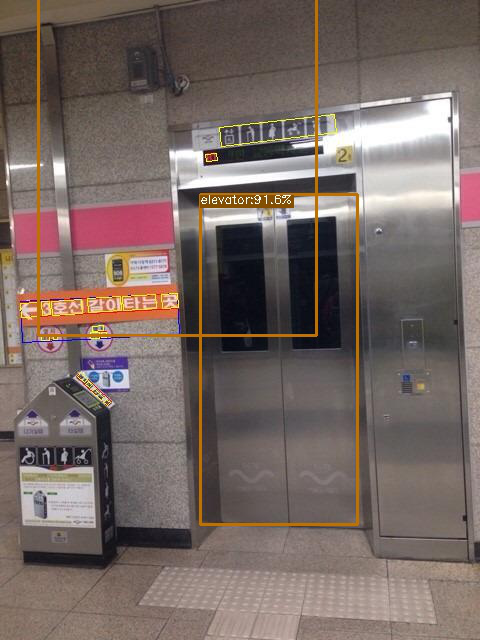

In [7]:
from PIL import Image
OUTPUT_IMAGE_PATH = "./YOLOX_outputs/final_test_img/vis_res/2022_05_30_20_34_05/OCR_mix2.jpg"
Image.open(OUTPUT_IMAGE_PATH)

In [34]:
!python3 tools/demo.py image -f exps/example/yolox_voc/yolox_voc_m.py -c ./YOLOX_outputs/yolox_m_work_dir/epoch_100_ckpt.pth --path OCR/OCR_mix7.jpg --conf 0.25 --nms 0.45 --tsize 640 --save_result -expn final_test_img --device gpu

2022-05-31 02:15:53.452 | INFO     | __main__:main:260 - Args: Namespace(camid=0, ckpt='./YOLOX_outputs/yolox_m_work_dir/epoch_100_ckpt.pth', conf=0.25, demo='image', device='gpu', exp_file='exps/example/yolox_voc/yolox_voc_m.py', experiment_name='final_test_img', fp16=False, fuse=False, legacy=False, name=None, nms=0.45, path='OCR/OCR_mix7.jpg', save_result=True, trt=False, tsize=640)
2022-05-31 02:15:53.934 | INFO     | __main__:main:270 - Model Summary: Params: 25.28M, Gflops: 73.51
2022-05-31 02:15:59.079 | INFO     | __main__:main:283 - loading checkpoint
2022-05-31 02:15:59.483 | INFO     | __main__:main:287 - loaded checkpoint done.
2022-05-31 02:15:59.705 | INFO     | __main__:inference:165 - Infer time: 0.2067s
('elevator', 'escalator', 'toilet')
2022-05-31 02:15:59.707 | INFO     | __main__:image_demo:203 - Saving detection result in ./YOLOX_outputs/final_test_img/vis_res/2022_05_31_02_15_59/OCR_mix7.jpg


In [24]:
!python3 tools/demo.py video -f exps/example/yolox_voc/yolox_voc_m.py -c ./YOLOX_outputs/yolox_m_work_dir/epoch_100_ckpt.pth --path ./toilet.mp4 --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu 

2022-05-31 01:28:26.201 | INFO     | __main__:main:260 - Args: Namespace(camid=0, ckpt='./YOLOX_outputs/yolox_m_work_dir/epoch_100_ckpt.pth', conf=0.25, demo='video', device='gpu', exp_file='exps/example/yolox_voc/yolox_voc_m.py', experiment_name='yolox_voc_m', fp16=False, fuse=False, legacy=False, name=None, nms=0.45, path='./toilet.mp4', save_result=True, trt=False, tsize=640)
2022-05-31 01:28:26.706 | INFO     | __main__:main:270 - Model Summary: Params: 25.28M, Gflops: 73.51
2022-05-31 01:28:32.648 | INFO     | __main__:main:283 - loading checkpoint
2022-05-31 01:28:33.901 | INFO     | __main__:main:287 - loaded checkpoint done.
Traceback (most recent call last):
  File "tools/demo.py", line 322, in <module>
    main(exp, args)
  File "tools/demo.py", line 314, in main
    imageflow_demo(predictor, vis_folder, current_time, args)
  File "tools/demo.py", line 224, in imageflow_demo
    logger.info()#f"video save_path is {save_path}")
TypeError: info() missing 1 required positional a

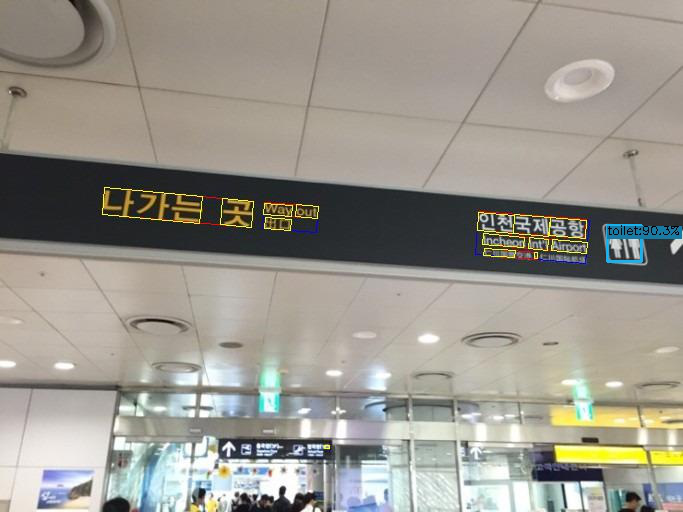

In [41]:
from PIL import Image
OUTPUT_IMAGE_PATH = "./YOLOX_outputs/final_test_img/OCR_mix3.jpg"
Image.open(OUTPUT_IMAGE_PATH)

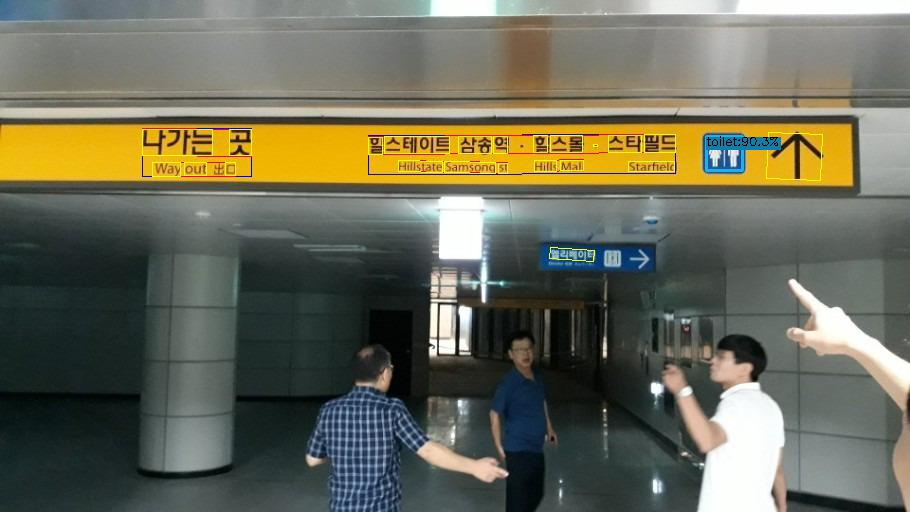

In [42]:
from PIL import Image
OUTPUT_IMAGE_PATH = "./YOLOX_outputs/final_test_img/OCR_mix4.jpg"
Image.open(OUTPUT_IMAGE_PATH)

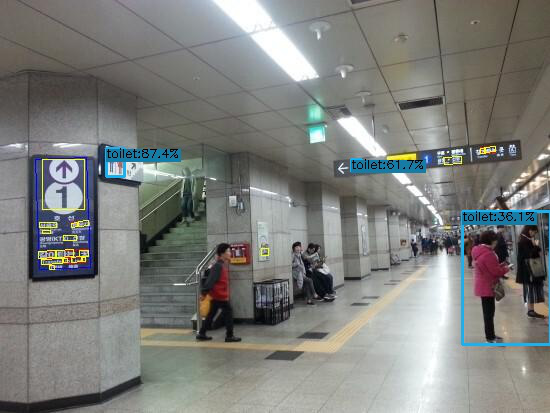

In [43]:
from PIL import Image
OUTPUT_IMAGE_PATH = "./YOLOX_outputs/final_test_img/OCR_mix5.jpg"
Image.open(OUTPUT_IMAGE_PATH)

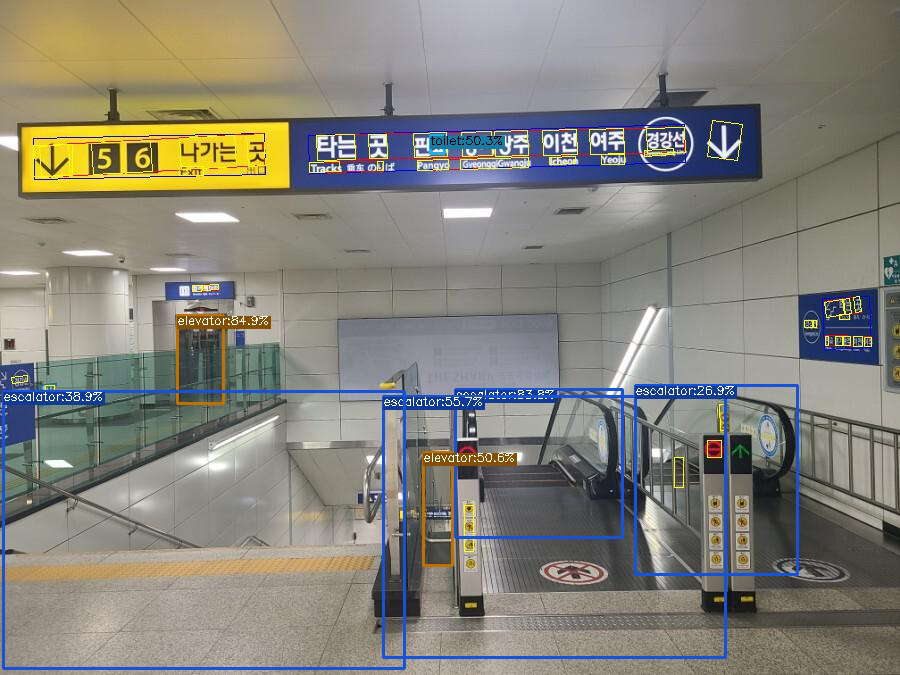

In [44]:
from PIL import Image
OUTPUT_IMAGE_PATH = "./YOLOX_outputs/final_test_img/OCR_mix6.jpg"
Image.open(OUTPUT_IMAGE_PATH)